In [34]:
# IMPORT

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import time
from contextlib import contextmanager
import gc

pd.set_option('display.max_columns', None)


# Functions

def cats_summary(data, categorical_cols, number_of_classes=10):
   
    var_count = 0  # count of categorical variables will be reported
    vars_more_classes = []  # categorical variables that have more than a number specified.
    for var in data:
        if var in categorical_cols:
            if len(list(data[var].unique())) <= number_of_classes:  # choose according to class count
                print(
                    pd.DataFrame({var: data[var].value_counts(), "Ratio": 100 * data[var].value_counts() / len(data)}),
                    end="\n\n\n")
                sns.countplot(x=var, data=data)
                plt.show()
                var_count += 1
            else:
                vars_more_classes.append(data[var].name)
    print('%d categorical variables have been described' % var_count, end="\n\n")
    print('There are', len(vars_more_classes), "variables have more than", number_of_classes, "classes", end="\n\n")
    print('Variable names have more than %d classes:' % number_of_classes, end="\n\n")
    print(vars_more_classes)
    print("10 dan fazla kategoriye sahip olanların, sahip olduğu katefori sınıfı sayısı: ",
          df[vars_more_classes].nunique(), end="\n\n")  

"""
@contextmanager
def timer(title):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(title, time.time() - t0))"""



def load_full():
    test_ident = pd.read_csv("/Volumes/Yeni_Birim/DATA_SCIENCE/Projeler/IEEE_FRAUD/Data/test_identity.csv")
    test_trans = pd.read_csv("/Volumes/Yeni_Birim/DATA_SCIENCE/Projeler/IEEE_FRAUD/Data/test_transaction.csv")
    train_ident = pd.read_csv("/Volumes/Yeni_Birim/DATA_SCIENCE/Projeler/IEEE_FRAUD/Data/train_identity.csv")
    train_trans = pd.read_csv("/Volumes/Yeni_Birim/DATA_SCIENCE/Projeler/IEEE_FRAUD/Data/train_transaction.csv")
    # transactionlari concat 
    df_trans = pd.concat([train_trans, test_trans], axis=0, ignore_index=True)  # TODO
    # identity concat 
    train_ident = train_ident.rename(columns={c: c.replace('_', '-') for c in train_ident.columns})  # TODO
    df_ident = pd.concat([test_ident, train_ident], axis=0, ignore_index=True)  # Todo
    # Total merge 
    df = pd.merge(df_ident, df_trans, on="TransactionID", how="outer")  # TODO
    del test_ident
    del test_trans
    del train_ident
    del train_trans
    del df_ident
    del df_trans
    print("Row counts {}, Feature counts {}".format(df.shape[0], df.shape[1]))  # todo 1


    return df.to_pickle("/Volumes/Yeni_Birim/DATA_SCIENCE/Projeler/IEEE_FRAUD//Data/pickle/full_data.pkl")



In [ ]:
df = pd.read_pickle("/Volumes/Yeni_Birim/DATA_SCIENCE/Projeler/IEEE_FRAUD//Data/pickle/full_data.pkl")


In [22]:
df.head()

TransactionID  id-01     id-02  id-03  id-04  id-05  id-06  id-07  id-08  \
0        3663586  -45.0  280290.0    NaN    NaN    0.0    0.0    NaN    NaN   
1        3663588    0.0    3579.0    0.0    0.0    0.0    0.0    NaN    NaN   
2        3663597   -5.0  185210.0    NaN    NaN    1.0    0.0    NaN    NaN   
3        3663601  -45.0  252944.0    0.0    0.0    0.0    0.0    NaN    NaN   
4        3663602  -95.0  328680.0    NaN    NaN    7.0  -33.0    NaN    NaN   

   id-09  id-10  id-11     id-12  id-13  id-14  id-15     id-16  id-17  id-18  \
0    NaN    NaN  100.0  NotFound   27.0    NaN    New  NotFound  225.0   15.0   
1    0.0    0.0  100.0     Found    NaN -300.0  Found     Found  166.0    NaN   
2    NaN    NaN  100.0  NotFound   52.0 -360.0    New  NotFound  225.0    NaN   
3    0.0    0.0  100.0  NotFound   27.0    NaN  Found     Found  225.0   15.0   
4    NaN    NaN  100.0  NotFound   27.0    NaN    New  NotFound  225.0   15.0   

   id-19  id-20  id-21  id-22 id-23  id-24  id-25  id-26 id-27  id-28  \
0  427.0  563.0    NaN    NaN   NaN    NaN    NaN    NaN   NaN    New   
1  542.0  368.0    NaN    NaN   NaN    NaN    NaN    NaN   NaN  Found   
2  271.0  507.0    NaN    NaN   NaN    NaN    NaN    NaN   NaN    New   
3  427.0  563.0    NaN    NaN   NaN    NaN    NaN    NaN   NaN  Found   
4  567.0  507.0    NaN    NaN   NaN    NaN    NaN    NaN   NaN    New   

      id-29          id-30                    id-31  id-32     id-33  \
0  NotFound            NaN  chrome 67.0 for android    NaN       NaN   
1     Found  Android 6.0.1  chrome 67.0 for android   24.0  1280x720   
2  NotFound            NaN       ie 11.0 for tablet    NaN       NaN   
3     Found            NaN  chrome 67.0 for android    NaN       NaN   
4  NotFound            NaN  chrome 67.0 for android    NaN       NaN   

            id-34 id-35 id-36 id-37 id-38 DeviceType  \
0             NaN     F     F     T     F     mobile   
1  match_status:2     T     F     T     T     mobile   
2             NaN     F     T     T     F    desktop   
3             NaN     F     F     T     F     mobile   
4             NaN     F     F     T     F     mobile   

                    DeviceInfo  isFraud  TransactionDT  TransactionAmt  \
0  MYA-L13 Build/HUAWEIMYA-L13      NaN       18404013           6.271   
1         LGLS676 Build/MXB48T      NaN       18404055          50.000   
2                  Trident/7.0      NaN       18404235          37.318   
3  MYA-L13 Build/HUAWEIMYA-L13      NaN       18404315           6.271   
4         SM-G9650 Build/R16NW      NaN       18404359          52.258   

  ProductCD  card1  card2  card3             card4  card5   card6  addr1  \
0         C  15885  545.0  185.0              visa  138.0   debit    NaN   
1         S   2453  399.0  150.0  american express  137.0  credit  494.0   
2         C  15885  545.0  185.0              visa  138.0   debit    NaN   
3         C  15885  545.0  185.0              visa  138.0   debit    NaN   
4         C   9633  130.0  185.0              visa  138.0   debit    NaN   

   addr2  dist1  dist2  P_emaildomain  R_emaildomain   C1    C2   C3   C4  \
0    NaN    NaN    NaN    hotmail.com    hotmail.com  1.0   1.0  0.0  1.0   
1   87.0    NaN   37.0            NaN      gmail.com  4.0   8.0  0.0  4.0   
2    NaN    NaN    NaN  anonymous.com  anonymous.com  1.0   1.0  0.0  1.0   
3    NaN    NaN    NaN    hotmail.com    hotmail.com  2.0   4.0  0.0  3.0   
4    NaN    NaN    NaN    hotmail.com    hotmail.com  8.0  21.0  0.0  4.0   

    C5   C6   C7    C8   C9   C10   C11   C12   C13  C14    D1    D2   D3  \
0  0.0  1.0  1.0   1.0  0.0   1.0   1.0   1.0   0.0  0.0   NaN   NaN  NaN   
1  0.0  0.0  0.0  25.0  0.0  30.0   5.0   0.0  57.0  4.0  34.0  34.0  1.0   
2  0.0  1.0  1.0   1.0  0.0   1.0   1.0   1.0   1.0  1.0   NaN   NaN  NaN   
3  0.0  3.0  3.0   3.0  0.0   3.0   3.0   3.0   2.0  1.0   NaN   NaN  0.0   
4  0.0  4.0  4.0   5.0  0.0   6.0  11.0  11.0  10.0  6.0   NaN   NaN  NaN   

    

In [9]:
df.isnull().values.any()

True

# EDA 
1- OVERVİEW

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1097231 entries, 0 to 1097230
Columns: 434 entries, TransactionID to V339
dtypes: float64(400), int64(3), object(31)
memory usage: 3.6+ GB


In [11]:
df.shape

(1097231, 434)

# 2- CATHEGORICAL VARIABLES ANALYSIS

In [14]:
# How many cath variables are there ? 
# How many classes of which categorical variable has
# What are the classes of the categorical variable
# Basic visualization

In [16]:
cat_cols = [col for col in df.columns if df[col].dtype == 'O']

In [25]:
len(cat_cols)

31

In [26]:
cat_cols

['id-12',
 'id-15',
 'id-16',
 'id-23',
 'id-27',
 'id-28',
 'id-29',
 'id-30',
 'id-31',
 'id-33',
 'id-34',
 'id-35',
 'id-36',
 'id-37',
 'id-38',
 'DeviceType',
 'DeviceInfo',
 'ProductCD',
 'card4',
 'card6',
 'P_emaildomain',
 'R_emaildomain',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9']

In [4]:
more_cat_cols= [col for col in df.columns if df[col].nunique()<10]

In [33]:
len(more_cat_cols)

89

In [35]:
df[more_cat_cols].value_counts() # Let's look at the frequencies of the classes

Series([], dtype: int64)

In [36]:
def cats_summary(data, categorical_cols, number_of_classes=10):
    
    var_count = 0  # count of categorical variables will be reported
    vars_more_classes = []  # categorical variables that have more than a number specified.
    for var in data:
        if var in categorical_cols:
            if len(list(data[var].unique())) <= number_of_classes:  # choose according to class count
                print(
                    pd.DataFrame({var: data[var].value_counts(), "Ratio": 100 * data[var].value_counts() / len(data)}),
                    end="\n\n\n")
                sns.countplot(x=var, data=data)
                plt.show()
                var_count += 1
            else:
                vars_more_classes.append(data[var].name)
    print('%d categorical variables have been described' % var_count, end="\n\n")
    print('There are', len(vars_more_classes), "variables have more than", number_of_classes, "classes", end="\n\n")
    print('Variable names have more than %d classes:' % number_of_classes, end="\n\n")
    print(vars_more_classes)
    print("10 dan fazla kategoriye sahip olanların, sahip olduğu katefori sınıfı sayısı: ",
          df[vars_more_classes].nunique(), end="\n\n") 


           id-12      Ratio
NotFound  243920  22.230506
Found      42220   3.847868




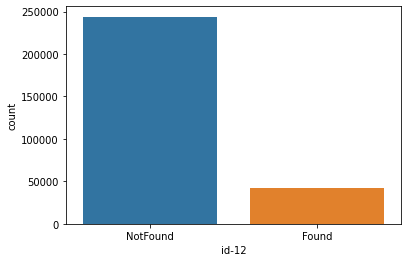

          id-15      Ratio
Found    135690  12.366585
New      119397  10.881665
Unknown   22875   2.084793




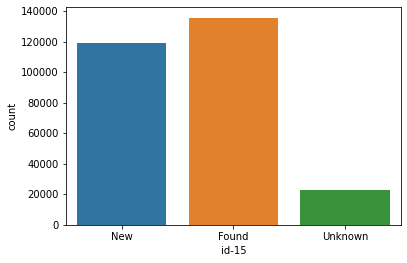

           id-16      Ratio
Found     132805  12.103650
NotFound  122282  11.144599




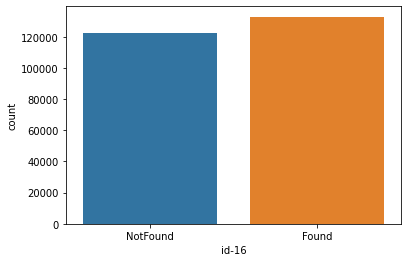

                      id-23     Ratio
IP_PROXY:TRANSPARENT   7203  0.656471
IP_PROXY:ANONYMOUS     2010  0.183188
IP_PROXY:HIDDEN        1018  0.092779




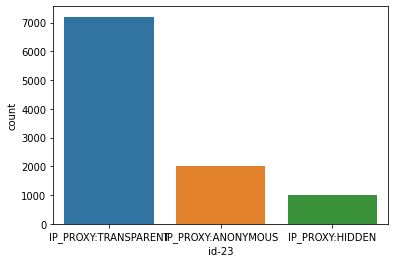

          id-27     Ratio
Found     10214  0.930889
NotFound     17  0.001549




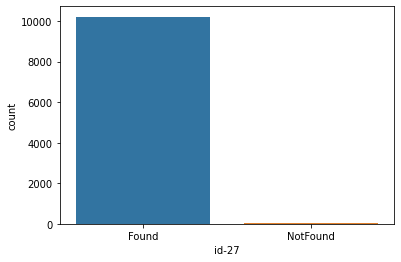

        id-28      Ratio
Found  151813  13.836011
New    125943  11.478258




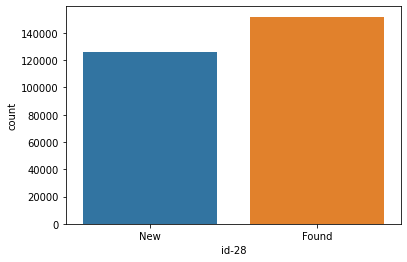

           id-29      Ratio
Found     149264  13.603699
NotFound  128492  11.710570




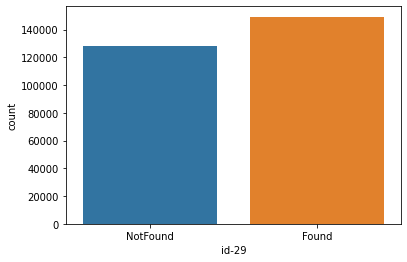

       id-32     Ratio
24.0  104040  9.482051
32.0   44077  4.017112
16.0     121  0.011028
8.0       11  0.001003
0.0        6  0.000547
48.0       2  0.000182




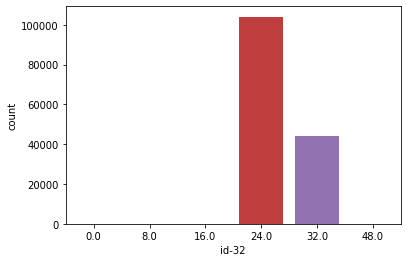

                  id-34      Ratio
match_status:2   132185  12.047144
match_status:1    17377   1.583714
match_status:0      415   0.037822
match_status:-1       3   0.000273




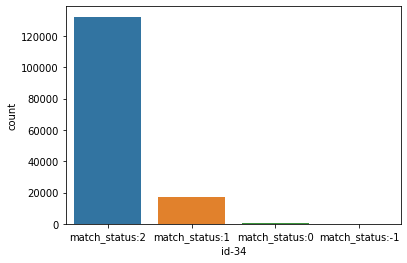

    id-35      Ratio
T  149464  13.621926
F  128498  11.711116




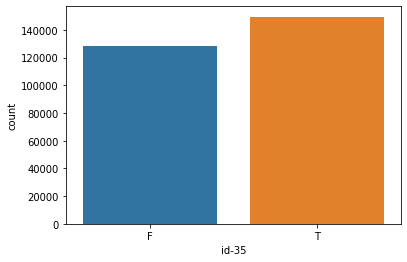

    id-36      Ratio
F  267353  24.366154
T   10609   0.966888




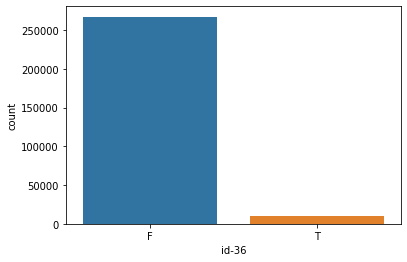

    id-37      Ratio
T  215149  19.608360
F   62813   5.724683




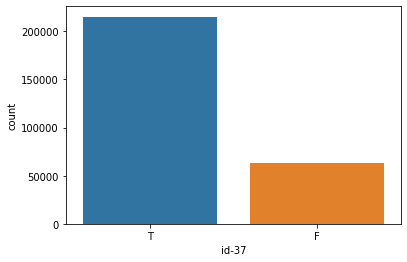

    id-38      Ratio
F  168980  15.400586
T  108982   9.932457




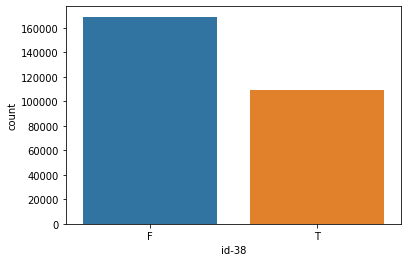

         DeviceType      Ratio
desktop      159568  14.542790
mobile       118173  10.770111




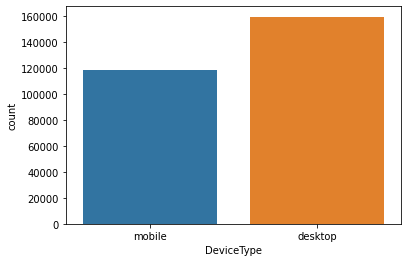

     isFraud      Ratio
0.0   569877  51.937741
1.0    20663   1.883195




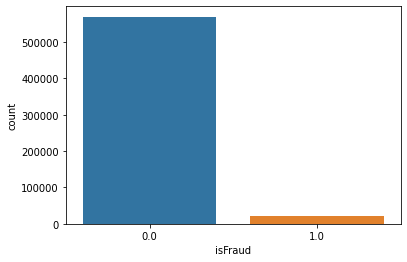

   ProductCD      Ratio
W     800657  72.970687
C     137785  12.557520
R      73346   6.684645
H      62397   5.686770
S      23046   2.100378




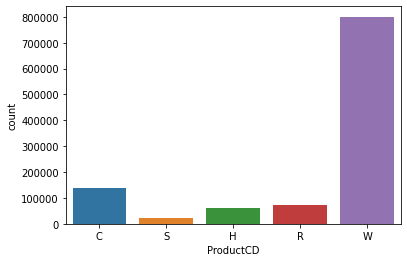

                   card4      Ratio
visa              719649  65.587739
mastercard        347386  31.660243
american express   16009   1.459036
discover            9524   0.868003




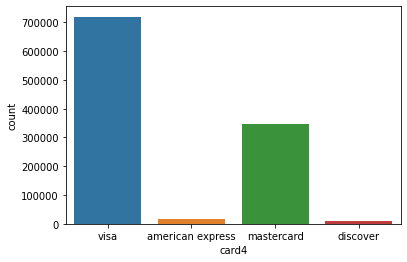

                  card6      Ratio
debit            824959  75.185535
credit           267648  24.393040
debit or credit      30   0.002734
charge card          16   0.001458




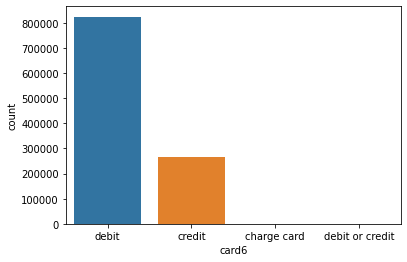

       M1      Ratio
T  649436  59.188630
F      56   0.005104




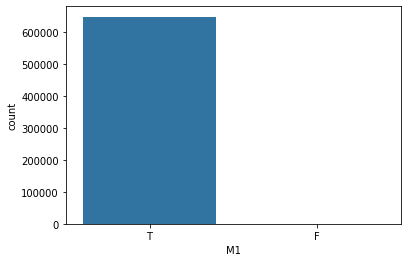

       M2      Ratio
T  588323  53.618882
F   61169   5.574852




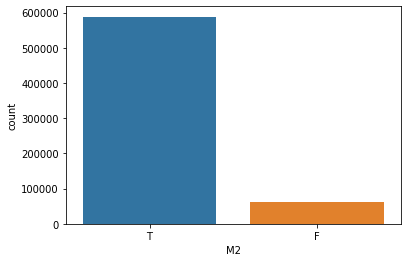

       M3      Ratio
T  518244  47.231987
F  131248  11.961747




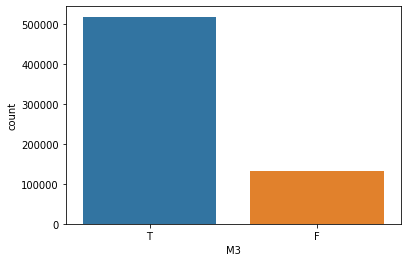

        M4      Ratio
M0  357789  32.608357
M2  122947  11.205207
M1   97306   8.868324




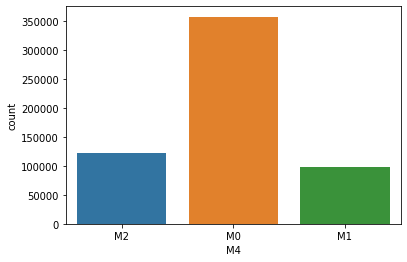

       M5      Ratio
F  240155  21.887369
T  196962  17.950823




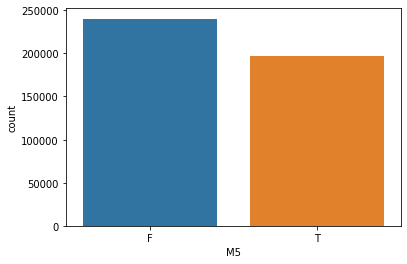

       M6      Ratio
F  419433  38.226499
T  349499  31.852819




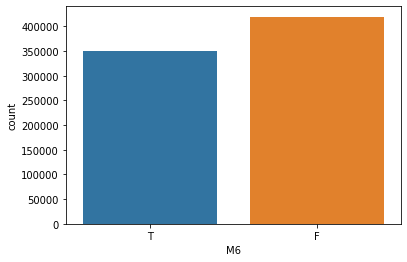

       M7      Ratio
F  444604  40.520547
T   71344   6.502186




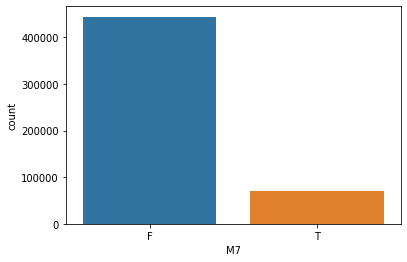

       M8      Ratio
F  323650  29.496979
T  192325  17.528214




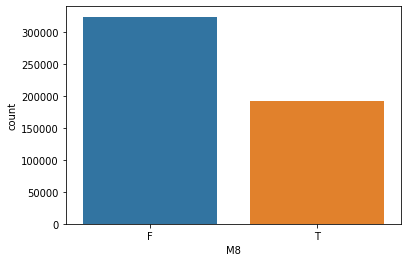

       M9      Ratio
T  441935  40.277298
F   74040   6.747895




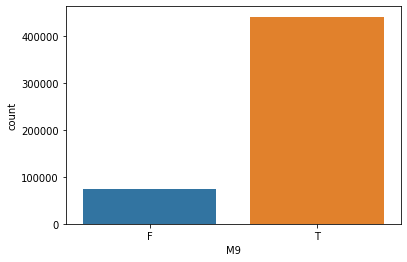

         V1     Ratio
1.0  641408  58.45697
0.0      18   0.00164




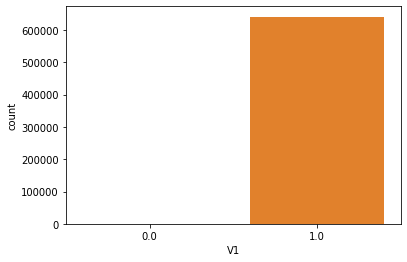

        V10      Ratio
0.0  353655  32.231590
1.0  280858  25.596980
2.0    6463   0.589028
3.0     426   0.038825
4.0      23   0.002096
5.0       1   0.000091




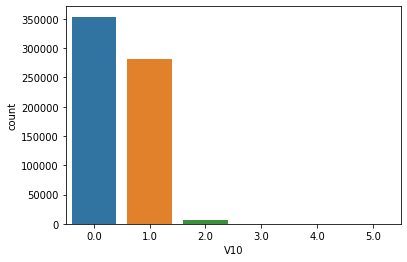

        V11      Ratio
0.0  352082  32.088229
1.0  275480  25.106837
2.0   11973   1.091201
3.0    1483   0.135158
4.0     379   0.034541
5.0      21   0.001914
6.0       6   0.000547
7.0       2   0.000182




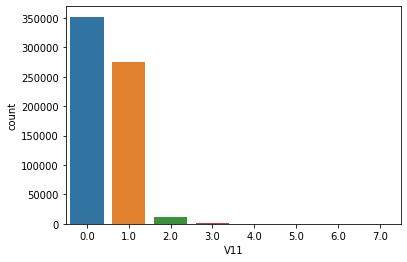

        V12      Ratio
1.0  556404  50.709832
0.0  445727  40.622895
2.0    6226   0.567428
3.0     204   0.018592
4.0       8   0.000729




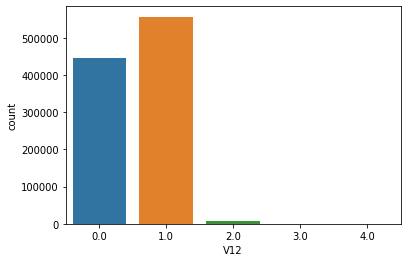

        V13      Ratio
1.0  563321  51.340237
0.0  425025  38.736146
2.0   19284   1.757515
3.0     801   0.073002
5.0      69   0.006289
4.0      62   0.005651
6.0       7   0.000638




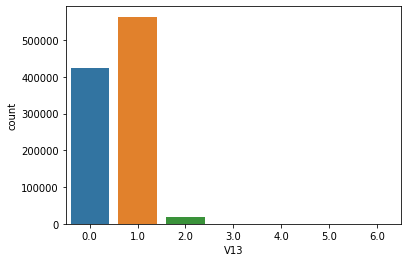

         V14      Ratio
1.0  1008236  91.889128
0.0      333   0.030349




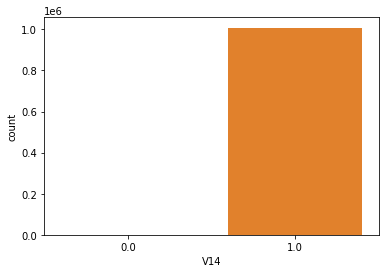

        V21      Ratio
0.0  819950  74.729022
1.0  187254  17.066051
2.0    1232   0.112283
3.0     114   0.010390
4.0      11   0.001003
5.0       8   0.000729




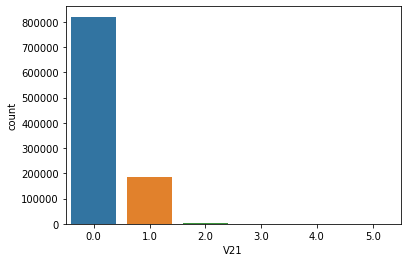

        V22      Ratio
0.0  819873  74.722005
1.0  185835  16.936725
2.0    1938   0.176626
3.0     418   0.038096
7.0     243   0.022147
4.0     220   0.020050
5.0      25   0.002278
6.0      16   0.001458
8.0       1   0.000091




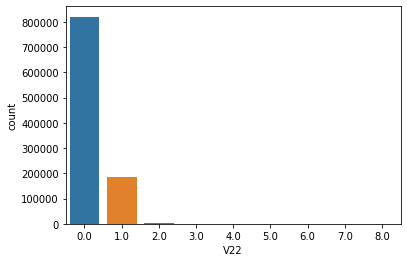

        V27      Ratio
0.0  997041  90.868833
1.0   11488   1.046999
2.0      30   0.002734
3.0       4   0.000365
4.0       3   0.000273
7.0       1   0.000091
6.0       1   0.000091
5.0       1   0.000091




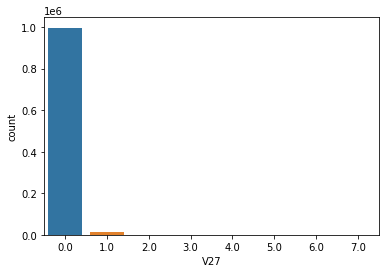

        V28      Ratio
0.0  997031  90.867921
1.0   11438   1.042442
2.0      90   0.008202
4.0       5   0.000456
3.0       2   0.000182
7.0       1   0.000091
6.0       1   0.000091
5.0       1   0.000091




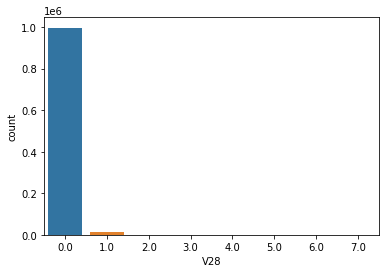

        V29      Ratio
0.0  652347  59.453934
1.0  347172  31.640739
2.0    8307   0.757088
3.0     625   0.056962
4.0     116   0.010572
5.0       2   0.000182




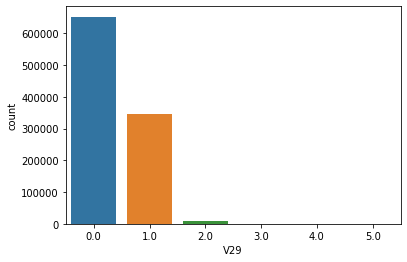

        V30      Ratio
0.0  650121  59.251060
1.0  337921  30.797617
2.0   17584   1.602580
3.0    2139   0.194945
4.0     504   0.045934
5.0     282   0.025701
6.0       9   0.000820
9.0       7   0.000638
7.0       2   0.000182




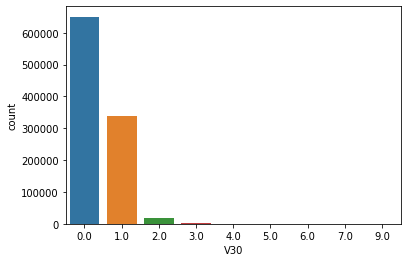

        V35      Ratio
1.0  449844  40.998113
0.0  395255  36.022952
2.0    6141   0.559682
3.0     167   0.015220
4.0       1   0.000091




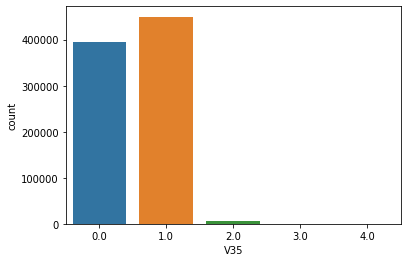

        V36      Ratio
1.0  454980  41.466200
0.0  379267  34.565830
2.0   16170   1.473710
3.0     922   0.084030
4.0      37   0.003372
5.0      28   0.002552
6.0       4   0.000365




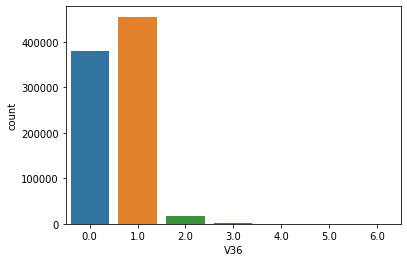

        V41      Ratio
1.0  851049  77.563339
0.0     359   0.032719




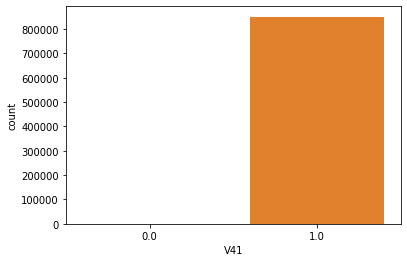

        V42      Ratio
0.0  673840  61.412775
1.0  171632  15.642285
2.0    5064   0.461525
3.0     683   0.062248
4.0     138   0.012577
5.0      32   0.002916
6.0      13   0.001185
8.0       3   0.000273
7.0       3   0.000273




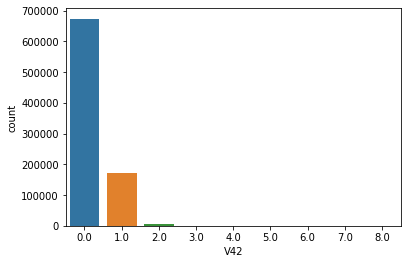

        V46      Ratio
1.0  833335  75.948911
2.0   16124   1.469517
3.0    1141   0.103989
0.0     519   0.047301
4.0     197   0.017954
5.0      44   0.004010
7.0      20   0.001823
8.0      14   0.001276
6.0      14   0.001276




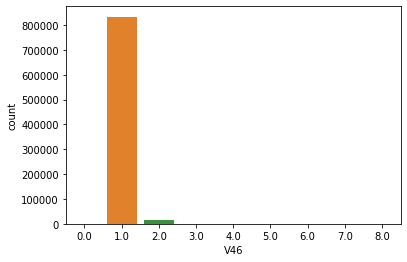

        V48      Ratio
0.0  556535  50.721771
1.0  287880  26.236955
2.0    6547   0.596684
3.0     423   0.038552
4.0      21   0.001914
5.0       2   0.000182




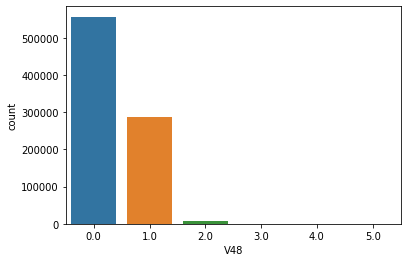

        V49      Ratio
0.0  555462  50.623980
1.0  280473  25.561892
2.0   13735   1.251787
3.0    1312   0.119574
4.0     327   0.029802
5.0      96   0.008749
7.0       2   0.000182
6.0       1   0.000091




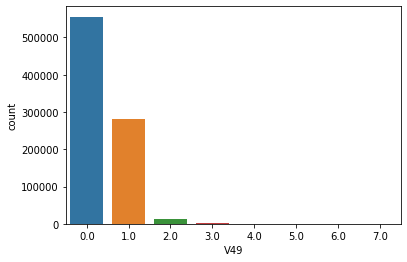

        V50      Ratio
0.0  666693  60.761408
1.0  183344  16.709699
2.0    1161   0.105812
3.0     166   0.015129
4.0      36   0.003281
5.0       6   0.000547
7.0       1   0.000091
6.0       1   0.000091




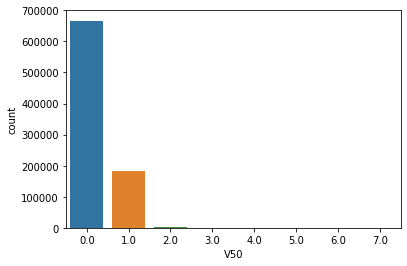

        V51      Ratio
0.0  708243  64.548213
1.0  136041  12.398574
2.0    5985   0.545464
3.0     901   0.082116
4.0     149   0.013580
5.0      41   0.003737
7.0      20   0.001823
8.0      14   0.001276
6.0      14   0.001276




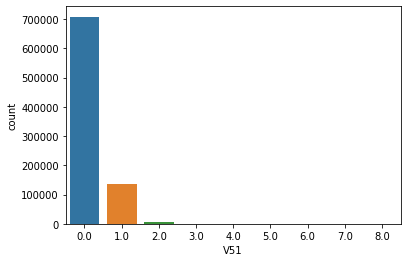

        V53      Ratio
1.0  578183  52.694738
0.0  420784  38.349627
2.0    7967   0.726101
3.0     253   0.023058
5.0      37   0.003372
4.0      12   0.001094




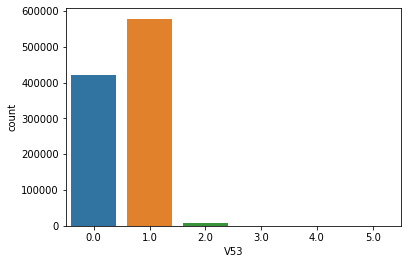

        V54      Ratio
1.0  584832  53.300718
0.0  399893  36.445653
2.0   21016   1.915367
3.0    1331   0.121305
4.0     108   0.009843
5.0      27   0.002461
7.0      18   0.001640
6.0      11   0.001003




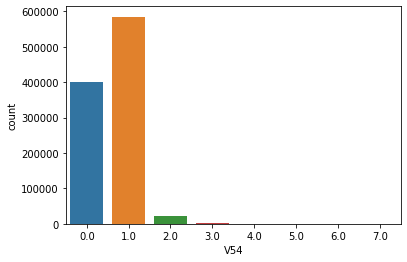

        V57      Ratio
0.0  875072  79.752759
1.0  127312  11.603026
2.0    4206   0.383329
3.0     502   0.045752
4.0     110   0.010025
5.0      31   0.002825
6.0       3   0.000273




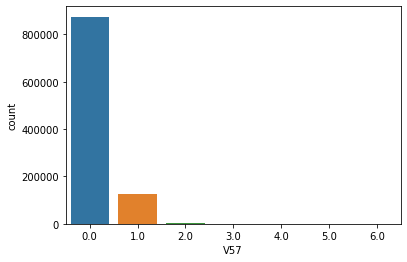

        V61      Ratio
1.0  816193  74.386615
0.0  169822  15.477324
2.0   19661   1.791874
3.0    1285   0.117113
4.0     175   0.015949
5.0      95   0.008658
6.0       5   0.000456




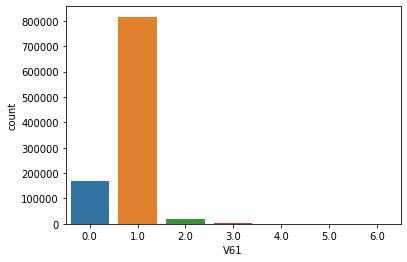

        V63      Ratio
0.0  820450  74.774592
1.0  180650  16.464172
2.0    5357   0.488229
3.0     636   0.057964
4.0      81   0.007382
5.0      42   0.003828
6.0      12   0.001094
7.0       7   0.000638
8.0       1   0.000091




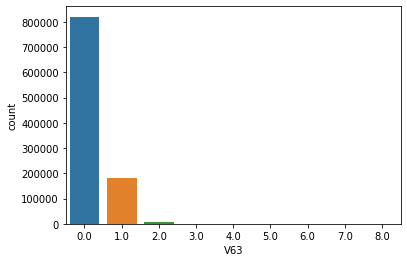

         V65      Ratio
1.0  1007017  91.778030
0.0      219   0.019959




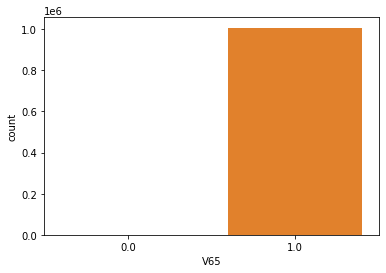

        V66      Ratio
1.0  974336  88.799533
0.0   18246   1.662913
2.0   13589   1.238481
3.0     808   0.073640
4.0     174   0.015858
5.0      36   0.003281
7.0      22   0.002005
6.0      22   0.002005
8.0       3   0.000273




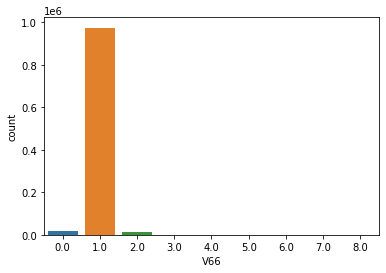

        V68      Ratio
0.0  995631  90.740327
1.0   11516   1.049551
2.0      80   0.007291
4.0       3   0.000273
3.0       3   0.000273
7.0       1   0.000091
6.0       1   0.000091
5.0       1   0.000091




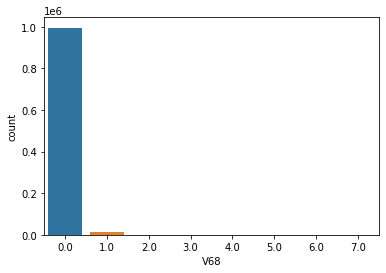

        V69      Ratio
0.0  650015  59.241399
1.0  347396  31.661154
2.0    9020   0.822069
3.0     726   0.066167
4.0      77   0.007018
5.0       2   0.000182




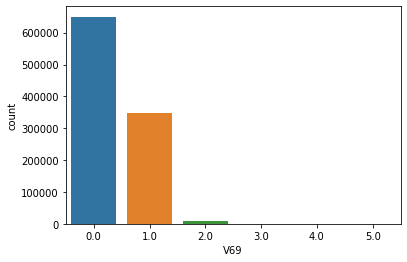

        V70      Ratio
0.0  647933  59.051649
1.0  338405  30.841728
2.0   17911   1.632382
3.0    2278   0.207614
4.0     469   0.042744
5.0     233   0.021235
6.0       4   0.000365
8.0       2   0.000182
7.0       1   0.000091




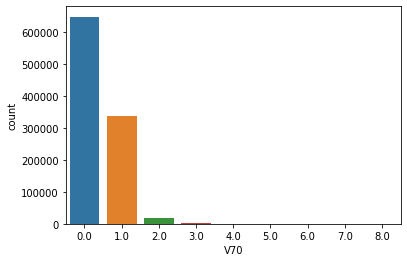

        V71      Ratio
0.0  813995  74.186293
1.0  187457  17.084552
2.0    4998   0.455510
3.0     653   0.059513
4.0     109   0.009934
5.0      19   0.001732
6.0       5   0.000456




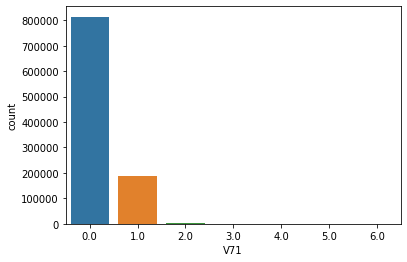

        V73      Ratio
0.0  862685  78.623827
1.0  138247  12.599626
2.0    5542   0.505090
3.0     547   0.049853
4.0     141   0.012851
5.0      34   0.003099
7.0      22   0.002005
6.0      15   0.001367
8.0       3   0.000273




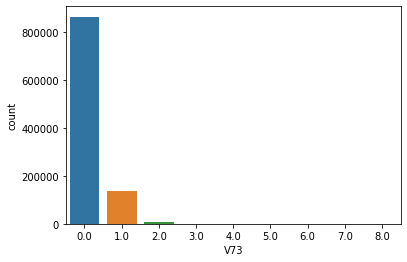

        V75      Ratio
1.0  525051  47.852367
0.0  463899  42.279064
2.0    6782   0.618101
3.0     230   0.020962
5.0      22   0.002005
4.0       2   0.000182




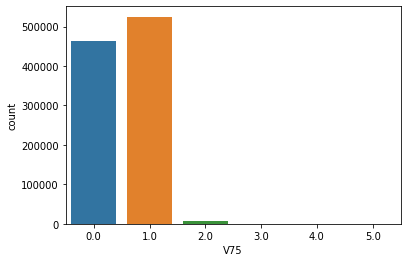

        V76      Ratio
1.0  535809  48.832835
0.0  439725  40.075882
2.0   19037   1.735004
3.0    1258   0.114652
4.0      88   0.008020
5.0      47   0.004284
7.0      16   0.001458
6.0       6   0.000547




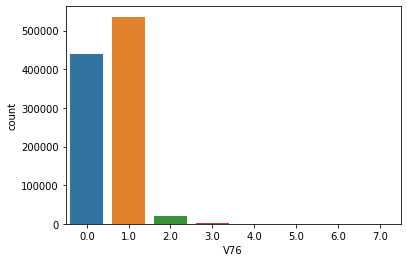

        V79      Ratio
0.0  862188  78.578531
1.0  127039  11.578145
2.0    5199   0.473829
3.0    1097   0.099979
4.0     186   0.016952
7.0     173   0.015767
5.0      88   0.008020
6.0      16   0.001458




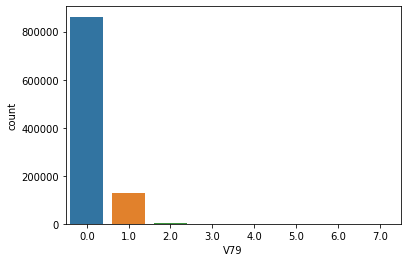

        V82      Ratio
1.0  810402  73.858832
0.0  166112  15.139200
2.0   18033   1.643501
3.0    1255   0.114379
4.0     143   0.013033
5.0      31   0.002825
6.0       8   0.000729
7.0       2   0.000182




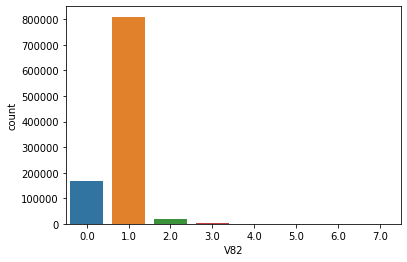

        V83      Ratio
1.0  797446  72.678041
0.0  157726  14.374913
2.0   36227   3.301675
3.0    3525   0.321263
4.0     578   0.052678
7.0     173   0.015767
5.0     173   0.015767
6.0     138   0.012577




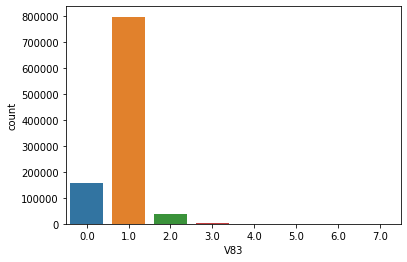

        V88      Ratio
1.0  995524  90.730575
0.0     462   0.042106




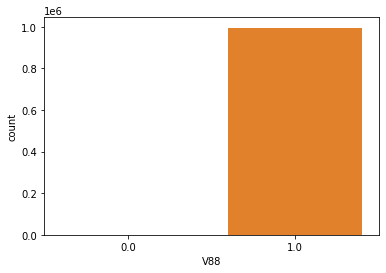

        V89      Ratio
0.0  984406  89.717297
1.0   11467   1.045085
2.0     104   0.009478
4.0       4   0.000365
3.0       2   0.000182
7.0       1   0.000091
6.0       1   0.000091
5.0       1   0.000091




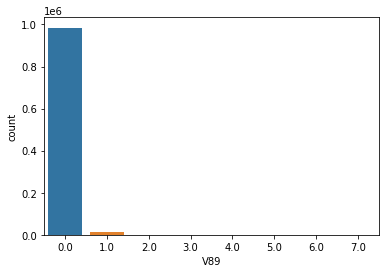

        V90      Ratio
0.0  636219  57.984053
1.0  350311  31.926823
2.0    8675   0.790627
3.0     666   0.060698
4.0     111   0.010116
5.0       4   0.000365




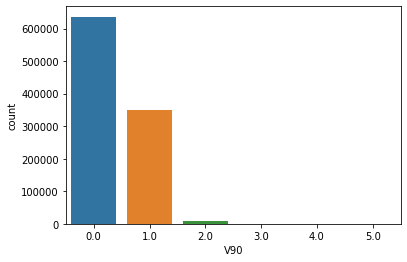

        V91      Ratio
0.0  634959  57.869218
1.0  338876  30.884654
2.0   19190   1.748948
3.0    2121   0.193305
4.0     547   0.049853
5.0     279   0.025428
6.0      11   0.001003
8.0       2   0.000182
7.0       1   0.000091




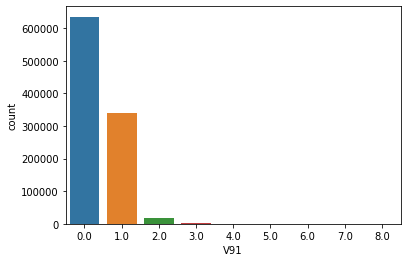

        V92      Ratio
0.0  798741  72.796066
1.0  191746  17.475445
2.0    4588   0.418143
3.0     749   0.068263
4.0      96   0.008749
5.0      51   0.004648
6.0      13   0.001185
7.0       2   0.000182




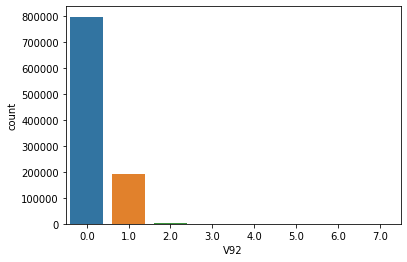

        V93      Ratio
0.0  798701  72.792420
1.0  188126  17.145524
2.0    7275   0.663033
3.0    1375   0.125315
4.0     186   0.016952
7.0     174   0.015858
5.0     130   0.011848
6.0      19   0.001732




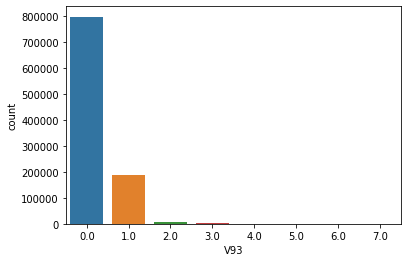

        V94      Ratio
0.0  851784  77.630326
1.0  144184  13.140715
2.0      18   0.001640




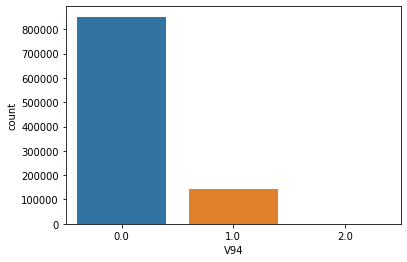

        V107      Ratio
1.0  1096669  99.948780
0.0      248   0.022602




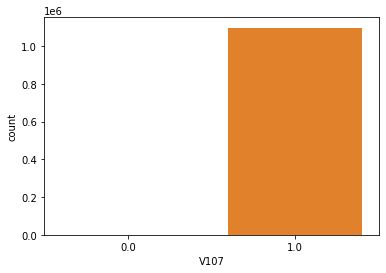

        V108      Ratio
1.0  1090712  99.405868
2.0     5559   0.506639
3.0      288   0.026248
0.0      252   0.022967
4.0       74   0.006744
5.0       18   0.001640
6.0        7   0.000638
7.0        5   0.000456
8.0        2   0.000182




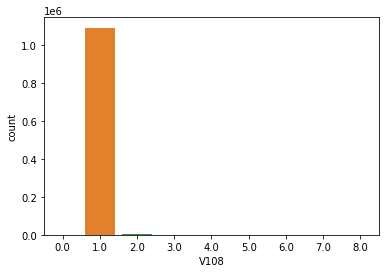

        V109      Ratio
1.0  1078363  98.280399
2.0    17825   1.624544
3.0      553   0.050400
4.0       81   0.007382
0.0       63   0.005742
5.0       18   0.001640
6.0        7   0.000638
7.0        5   0.000456
8.0        2   0.000182




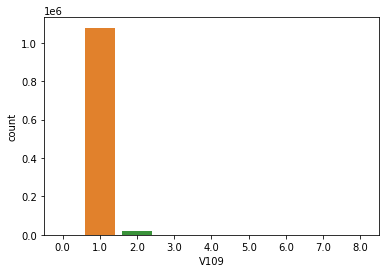

        V110      Ratio
1.0  1087162  99.082326
2.0     9130   0.832095
3.0      342   0.031169
0.0      177   0.016132
4.0       74   0.006744
5.0       18   0.001640
6.0        7   0.000638
7.0        5   0.000456
8.0        2   0.000182




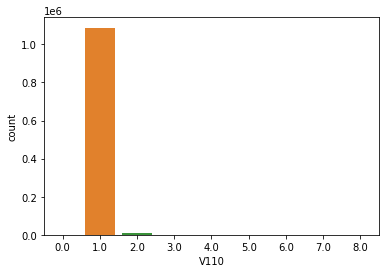

        V117      Ratio
1.0  1095706  99.861014
2.0      957   0.087220
0.0      252   0.022967
3.0        2   0.000182




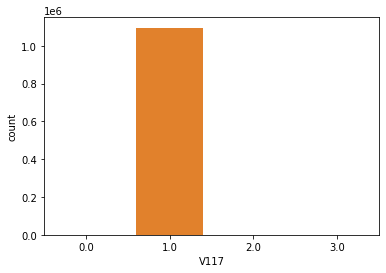

        V118      Ratio
1.0  1094762  99.774979
2.0     2087   0.190206
0.0       63   0.005742
3.0        5   0.000456




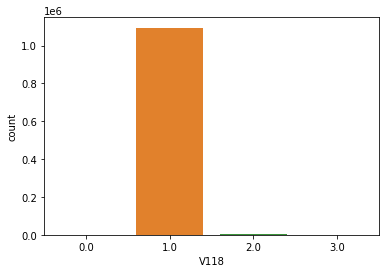

        V119      Ratio
1.0  1095401  99.833217
2.0     1337   0.121852
0.0      177   0.016132
3.0        2   0.000182




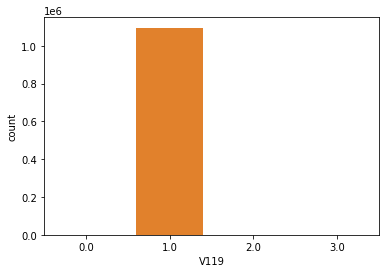

        V120      Ratio
1.0  1095014  99.797946
2.0     1626   0.148191
0.0      252   0.022967
3.0       23   0.002096
4.0        2   0.000182




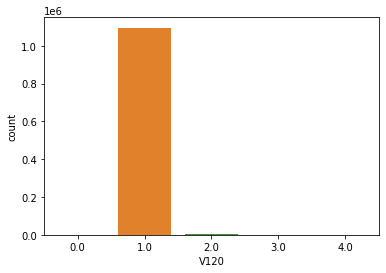

        V121      Ratio
1.0  1091100  99.441230
2.0     5659   0.515753
3.0       93   0.008476
0.0       63   0.005742
4.0        2   0.000182




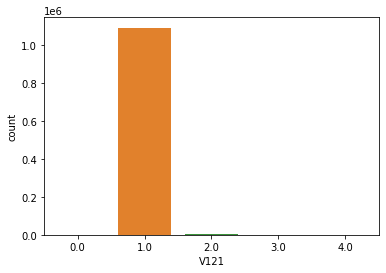

        V122      Ratio
1.0  1094060  99.711000
2.0     2631   0.239785
0.0      177   0.016132
3.0       47   0.004284
4.0        2   0.000182




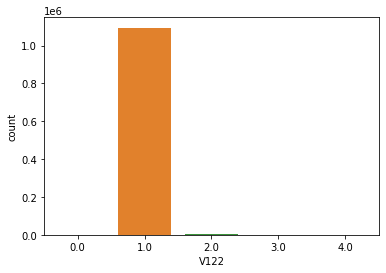

       V141      Ratio
0.0  152182  13.869641
1.0    4822   0.439470
2.0     613   0.055868
3.0     106   0.009661
5.0       3   0.000273
4.0       3   0.000273
6.0       1   0.000091




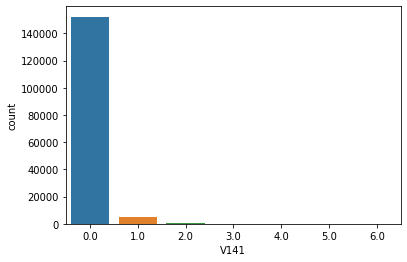

       V174      Ratio
0.0  243599  22.201250
1.0   28289   2.578217
2.0    3557   0.324180
3.0     608   0.055412
4.0     114   0.010390
6.0      12   0.001094
5.0      12   0.001094
8.0       2   0.000182
7.0       1   0.000091




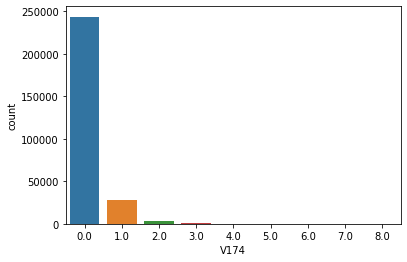

       V194      Ratio
1.0  252700  23.030702
0.0   20623   1.879550
2.0    2235   0.203695
3.0     406   0.037002
5.0     103   0.009387
4.0     103   0.009387
6.0      22   0.002005
7.0       2   0.000182




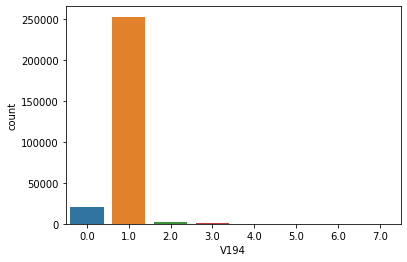

       V240      Ratio
1.0  256929  23.416127
2.0     206   0.018775
3.0       8   0.000729
6.0       6   0.000547
5.0       4   0.000365
0.0       3   0.000273
7.0       2   0.000182




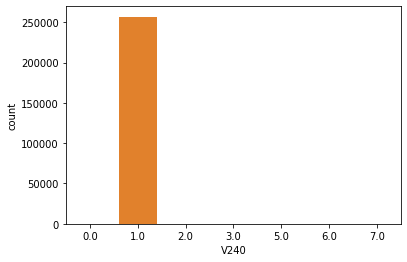

       V241      Ratio
1.0  257076  23.429524
2.0      68   0.006197
0.0       6   0.000547
3.0       5   0.000456
4.0       2   0.000182
5.0       1   0.000091




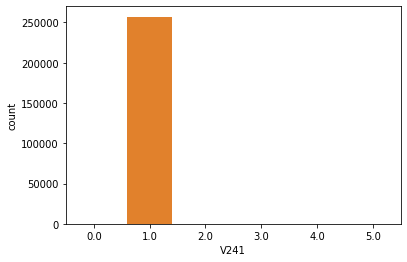

        V286      Ratio
0.0  1065796  97.135061
1.0    29180   2.659422
2.0     1895   0.172707
3.0      282   0.025701
4.0       41   0.003737
7.0        8   0.000729
6.0        7   0.000638
5.0        6   0.000547
8.0        1   0.000091




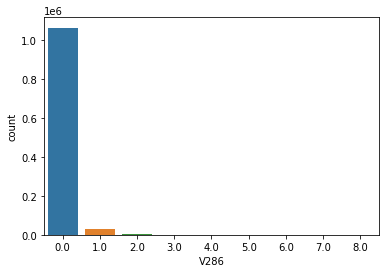

        V305      Ratio
1.0  1097211  99.998177
2.0        5   0.000456




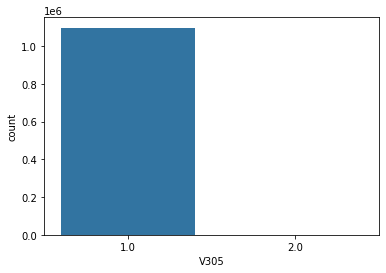

89 categorical variables have been described

There are 0 variables have more than 10 classes

Variable names have more than 10 classes:

[]
10 dan fazla kategoriye sahip olanların, sahip olduğu katefori sınıfı sayısı:  Series([], dtype: float64)



In [37]:
cats_summary(df, more_cat_cols)

In [38]:
df.tail()

TransactionID  id-01  id-02  id-03  id-04  id-05  id-06  id-07  \
1097226        4170231    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1097227        4170232    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1097228        4170235    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1097229        4170237    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1097230        4170238    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

         id-08  id-09  id-10  id-11 id-12  id-13  id-14 id-15 id-16  id-17  \
1097226    NaN    NaN    NaN    NaN   NaN    NaN    NaN   NaN   NaN    NaN   
1097227    NaN    NaN    NaN    NaN   NaN    NaN    NaN   NaN   NaN    NaN   
1097228    NaN    NaN    NaN    NaN   NaN    NaN    NaN   NaN   NaN    NaN   
1097229    NaN    NaN    NaN    NaN   NaN    NaN    NaN   NaN   NaN    NaN   
1097230    NaN    NaN    NaN    NaN   NaN    NaN    NaN   NaN   NaN    NaN   

         id-18  id-19  id-20  id-21  id-22 id-23  id-24  id-25  id-26 id-27  \
1097226    NaN    NaN    NaN    NaN    NaN   NaN    NaN    NaN    NaN   NaN   
1097227    NaN    NaN    NaN    NaN    NaN   NaN    NaN    NaN    NaN   NaN   
1097228    NaN    NaN    NaN    NaN    NaN   NaN    NaN    NaN    NaN   NaN   
1097229    NaN    NaN    NaN    NaN    NaN   NaN    NaN    NaN    NaN   NaN   
1097230    NaN    NaN    NaN    NaN    NaN   NaN    NaN    NaN    NaN   NaN   

        id-28 id-29 id-30 id-31  id-32 id-33 id-34 id-35 id-36 id-37 id-38  \
1097226   NaN   NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1097227   NaN   NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1097228   NaN   NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1097229   NaN   NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1097230   NaN   NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   

        DeviceType DeviceInfo  isFraud  TransactionDT  TransactionAmt  \
1097226        NaN        NaN      NaN       34214261          68.500   
1097227        NaN        NaN      NaN       34214269          67.950   
1097228        NaN        NaN      NaN       34214279          94.679   
1097229        NaN        NaN      NaN       34214326          49.000   
1097230        NaN        NaN      NaN       34214337         202.000   

        ProductCD  card1  card2  card3       card4  card5  card6  addr1  \
1097226         W   7690  122.0  150.0  mastercard  166.0  debit  315.0   
1097227         W  12544  321.0  150.0        visa  226.0  debit  337.0   
1097228         C  13832  375.0  185.0  mastercard  224.0  debit  284.0   
1097229         W  16661  490.0  150.0        visa  226.0  debit  327.0   
1097230         W  16621  516.0  150.0  mastercard  224.0  debit  177.0   

         addr2  dist1  dist2 P_emaildomain R_emaildomain   C1   C2   C3   C4  \
1097226   87.0    9.0    NaN     gmail.com           NaN  1.0  1.0  0.0  0.0   
1097227   87.0    0.0    NaN   comcast.net           NaN  2.0  2.0  0.0  0.0   
1097228   60.0    NaN    NaN     gmail.com     gmail.com  1.0  1.0  0.0  1.0   
1097229   87.0    NaN    NaN   hotmail.com           NaN  1.0  1.0  0.0  0.0   
1097230   87.0    NaN    NaN   hotmail.com           NaN  1.0  1.0  0.0  0.0   

          C5   C6   C7   C8   C9  C10  C11  C12   C13  C14     D1     D2  \
1097226  0.0  1.0  0.0  0.0  1.0  0.0  2.0  2.0   3.0  1.0   29.0   29.0   
1097227  1.0  3.0  0.0  0.0  2.0  0.0  1.0  0.0  24.0  2.0  620.0  620.0   
1097228  0.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0   1.0  1.0    0.0    NaN   
1097229  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0   1.0  1.0    0.0    NaN   
1097230  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0   1.0  1.0    0.0    NaN   

           D3    D4   D5   D6  D7  D8  D9    D10    D11  D12  D13  D14    D15  \
1097226   0.0  29.0  0.0  NaN NaN NaN NaN   29.0   29.0  NaN  NaN  NaN    0.0   
1097227  13.0   0.0  NaN  NaN NaN NaN NaN  620.0  546.0  NaN  NaN  NaN  620.0   
1097228   NaN   0.0  NaN  0.0 NaN NaN NaN    0.0    NaN  0.0  NaN  NaN    

In [40]:
df.head()

TransactionID  id-01     id-02  id-03  id-04  id-05  id-06  id-07  id-08  \
0        3663586  -45.0  280290.0    NaN    NaN    0.0    0.0    NaN    NaN   
1        3663588    0.0    3579.0    0.0    0.0    0.0    0.0    NaN    NaN   
2        3663597   -5.0  185210.0    NaN    NaN    1.0    0.0    NaN    NaN   
3        3663601  -45.0  252944.0    0.0    0.0    0.0    0.0    NaN    NaN   
4        3663602  -95.0  328680.0    NaN    NaN    7.0  -33.0    NaN    NaN   

   id-09  id-10  id-11     id-12  id-13  id-14  id-15     id-16  id-17  id-18  \
0    NaN    NaN  100.0  NotFound   27.0    NaN    New  NotFound  225.0   15.0   
1    0.0    0.0  100.0     Found    NaN -300.0  Found     Found  166.0    NaN   
2    NaN    NaN  100.0  NotFound   52.0 -360.0    New  NotFound  225.0    NaN   
3    0.0    0.0  100.0  NotFound   27.0    NaN  Found     Found  225.0   15.0   
4    NaN    NaN  100.0  NotFound   27.0    NaN    New  NotFound  225.0   15.0   

   id-19  id-20  id-21  id-22 id-23  id-24  id-25  id-26 id-27  id-28  \
0  427.0  563.0    NaN    NaN   NaN    NaN    NaN    NaN   NaN    New   
1  542.0  368.0    NaN    NaN   NaN    NaN    NaN    NaN   NaN  Found   
2  271.0  507.0    NaN    NaN   NaN    NaN    NaN    NaN   NaN    New   
3  427.0  563.0    NaN    NaN   NaN    NaN    NaN    NaN   NaN  Found   
4  567.0  507.0    NaN    NaN   NaN    NaN    NaN    NaN   NaN    New   

      id-29          id-30                    id-31  id-32     id-33  \
0  NotFound            NaN  chrome 67.0 for android    NaN       NaN   
1     Found  Android 6.0.1  chrome 67.0 for android   24.0  1280x720   
2  NotFound            NaN       ie 11.0 for tablet    NaN       NaN   
3     Found            NaN  chrome 67.0 for android    NaN       NaN   
4  NotFound            NaN  chrome 67.0 for android    NaN       NaN   

            id-34 id-35 id-36 id-37 id-38 DeviceType  \
0             NaN     F     F     T     F     mobile   
1  match_status:2     T     F     T     T     mobile   
2             NaN     F     T     T     F    desktop   
3             NaN     F     F     T     F     mobile   
4             NaN     F     F     T     F     mobile   

                    DeviceInfo  isFraud  TransactionDT  TransactionAmt  \
0  MYA-L13 Build/HUAWEIMYA-L13      NaN       18404013           6.271   
1         LGLS676 Build/MXB48T      NaN       18404055          50.000   
2                  Trident/7.0      NaN       18404235          37.318   
3  MYA-L13 Build/HUAWEIMYA-L13      NaN       18404315           6.271   
4         SM-G9650 Build/R16NW      NaN       18404359          52.258   

  ProductCD  card1  card2  card3             card4  card5   card6  addr1  \
0         C  15885  545.0  185.0              visa  138.0   debit    NaN   
1         S   2453  399.0  150.0  american express  137.0  credit  494.0   
2         C  15885  545.0  185.0              visa  138.0   debit    NaN   
3         C  15885  545.0  185.0              visa  138.0   debit    NaN   
4         C   9633  130.0  185.0              visa  138.0   debit    NaN   

   addr2  dist1  dist2  P_emaildomain  R_emaildomain   C1    C2   C3   C4  \
0    NaN    NaN    NaN    hotmail.com    hotmail.com  1.0   1.0  0.0  1.0   
1   87.0    NaN   37.0            NaN      gmail.com  4.0   8.0  0.0  4.0   
2    NaN    NaN    NaN  anonymous.com  anonymous.com  1.0   1.0  0.0  1.0   
3    NaN    NaN    NaN    hotmail.com    hotmail.com  2.0   4.0  0.0  3.0   
4    NaN    NaN    NaN    hotmail.com    hotmail.com  8.0  21.0  0.0  4.0   

    C5   C6   C7    C8   C9   C10   C11   C12   C13  C14    D1    D2   D3  \
0  0.0  1.0  1.0   1.0  0.0   1.0   1.0   1.0   0.0  0.0   NaN   NaN  NaN   
1  0.0  0.0  0.0  25.0  0.0  30.0   5.0   0.0  57.0  4.0  34.0  34.0  1.0   
2  0.0  1.0  1.0   1.0  0.0   1.0   1.0   1.0   1.0  1.0   NaN   NaN  NaN   
3  0.0  3.0  3.0   3.0  0.0   3.0   3.0   3.0   2.0  1.0   NaN   NaN  0.0   
4  0.0  4.0  4.0   5.0  0.0   6.0  11.0  11.0  10.0  6.0   NaN   NaN  NaN   

    

# 3- NUMERICAL VARIABLE ANALYSIS


In [44]:
# histogram, boxplot and density for numerical variables

In [42]:
df.describe().T 

count          mean            std        min        25%  \
TransactionID  1097231.0  3.575333e+06  354429.372959  2987000.0  3261307.5   
id-01           286140.0 -1.074342e+01      14.439337     -100.0      -10.0   
id-02           277848.0  1.835619e+05  171590.837001        1.0    65946.5   
id-03           132805.0  5.659425e-02       0.642900      -13.0        0.0   
id-04           132805.0 -7.321260e-02       0.774036      -28.0        0.0   
...                  ...           ...            ...        ...        ...   
V335            158782.0  5.876739e+01     741.652987        0.0        0.0   
V336            158782.0  3.187862e+01     657.697616        0.0        0.0   
V337            158782.0  7.639082e+01    1757.505038        0.0        0.0   
V338            158782.0  1.532870e+02    3249.956656        0.0        0.0   
V339            158782.0  1.195286e+02    3172.556309        0.0        0.0   

                     50%         75%        max  
TransactionID  3535615.0  3895931.50  4170239.0  
id-01               -5.0       -5.00        0.0  
id-02           129158.5   245795.25   999869.0  
id-03                0.0        0.00       11.0  
id-04                0.0        0.00        0.0  
...                  ...         ...        ...  
V335                 0.0        0.00    64800.0  
V336                 0.0        0.00    64800.0  
V337                 0.0        0.00   375000.0  
V338                 0.0        0.00   612500.0  
V339                 0.0        0.00   612500.0  

[403 rows x 8 columns]

In [43]:
df.corr()

TransactionID     id-01     id-02     id-03     id-04  \
TransactionID       1.000000 -0.045228  0.072968 -0.006026 -0.009325   
id-01              -0.045228  1.000000 -0.170592  0.030215  0.048045   
id-02               0.072968 -0.170592  1.000000 -0.035500 -0.014008   
id-03              -0.006026  0.030215 -0.035500  1.000000  0.382591   
id-04              -0.009325  0.048045 -0.014008  0.382591  1.000000   
...                      ...       ...       ...       ...       ...   
V335                0.015837 -0.001043 -0.054204 -0.012437  0.003345   
V336                0.012547 -0.003333 -0.029640 -0.006309  0.003624   
V337                0.018133 -0.006455 -0.008606 -0.005273  0.003478   
V338                0.015690 -0.004454 -0.025096 -0.007345  0.004791   
V339                0.015510 -0.003087 -0.016629 -0.005400  0.003584   

                  id-05     id-06     id-07     id-08     id-09     id-10  \
TransactionID -0.043570 -0.003122 -0.034191  0.054531 -0.009314  0.015386   
id-01          0.007290  0.232717  0.120899  0.030007  0.035967  0.048299   
id-02         -0.127095 -0.072098 -0.013441  0.027069 -0.032048  0.016815   
id-03          0.056689  0.057801  0.048568  0.014070  0.724803  0.144989   
id-04         -0.006234  0.081499  0.059054  0.033413  0.282292  0.392317   
...                 ...       ...       ...       ...       ...       ...   
V335          -0.001966  0.004094 -0.072128 -0.066515 -0.009421  0.008168   
V336          -0.001760  0.004087 -0.025962 -0.042065 -0.005100  0.005388   
V337          -0.004876  0.006325 -0.018990 -0.013165 -0.003722  0.005100   
V338          -0.006434  0.010010 -0.038620 -0.092545 -0.005249  0.006318   
V339          -0.005155  0.007734 -0.026707 -0.046269 -0.003853  0.004851   

                  id-11     id-13     id-14     id-17     id-18     id-19  \
TransactionID  0.004422 -0.350646  0.002463  0.051844  0.141638 -0.007181   
id-01          0.002704  0.138752 -0.074926 -0.208501 -0.003421  0.002545   
id-02          0.064298 -0.203166 -0.039130  0.450557  0.098336 -0.080952   
id-03         -0.002096  0.038788 -0.016007 -0.026459 -0.005245 -0.000310   
id-04         -0.001896  0.023825 -0.048400 -0.027423  0.000868  0.004533   
...                 ...       ...       ...       ...       ...       ...   
V335           0.016192  0.018089  0.026606  0.004902  0.118892  0.017743   
V336           0.010298  0.013082  0.013389  0.002958  0.111787  0.002038   
V337           0.009160  0.007450  0.010408  0.001531  0.033126  0.007755   
V338           0.008219  0.016211  0.015950  0.002502  0.024261  0.024059   
V339           0.005972  0.011895  0.011886  0.001750  0.022169  0.011957   

                  id-20     id-21     id-22     id-24     id-25     id-26  \
TransactionID  0.027918  0.369355 -0.058521  0.054255  0.011740  0.057297   
id-01         -0.090673 -0.041492 -0.002969 -0.074480 -0.101944 -0.024266   
id-02          0.129202 -0.002070  0.181322  0.018266  0.040171  0.033741   
id-03         -0.010656  0.026241  0.026426 -0.002434 -0.014798  0.000626   
id-04         -0.013014 -0.000939 -0.052404 -0.027322 -0.076224 -0.024574   
...                 ...       ...       ...       ...       ...       ...   
V335           0.029311 -0.002371 -0.020553 -0.007609  0.007708  0.000457   
V336           0.011779 -0.002748 -0.010149  0.027176  0.014280 -0.006151   
V337           0.013257  0.004820  0.019427  0.013025  0.018042 -0.010946   
V338           0.025459  0.016633  0.019692  0.001977  0.014249 -0.032703   
V339           0.018107  0.007478  0.026695  0.016117  0.016694 -0.017081   

                  id-32   isFraud  TransactionDT  TransactionAmt     card1  \
TransactionID -0.044835  0.014166       0.998633       -0.001180  0.008485   
id-01         -0.022417 -0.120099      -0.042471        0.052026 -0.007717   
id-02          0.143263  0.049398       0.068327       -0.082757  0.018187   
id-03         -0.014507  0.041457      -0.004800        0.00451

In [3]:
num_cols= [col for col in df.columns if df[col].dtype != "O" 
           #and df[col].nunique()>10 
           and col not in "isFraud"
           and col not in "TransactionID"]

In [4]:
print("%d are numeric variables." %len(num_cols))

401 tane sayısal değişken vardır.


In [58]:
def hist_for_nums(data, numeric_cols):
    
    col_counter = 0
    
    for col in numeric_cols:
        
        data[col].hist()
        plt.xlabel(col)
        plt.title(col)
        plt.show()
        
        sns.boxplot(x=df[col]);
        plt.show()
        
        col_counter += 1
        
    print(col_counter, "variables have been plotted")

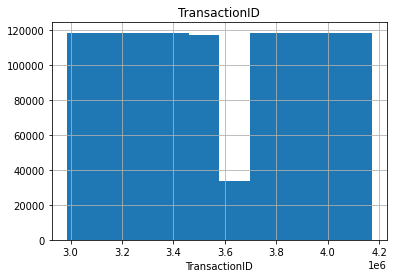

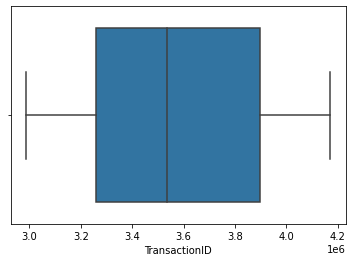

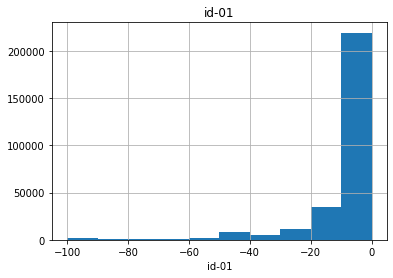

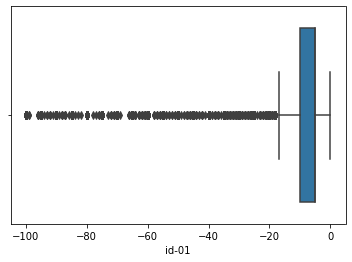

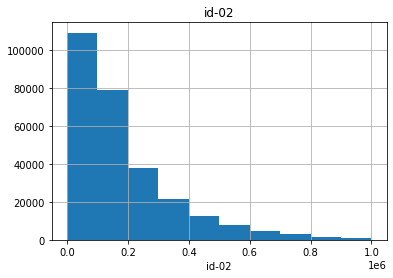

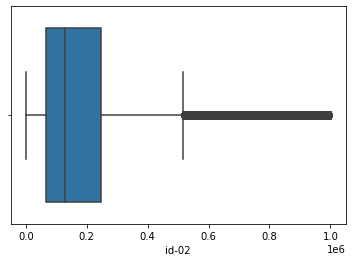

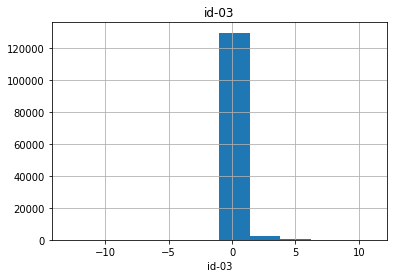

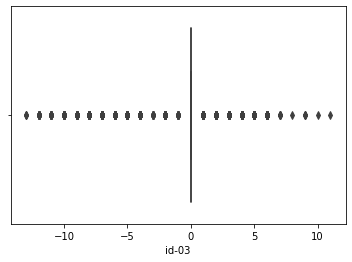

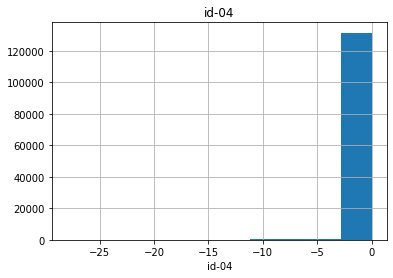

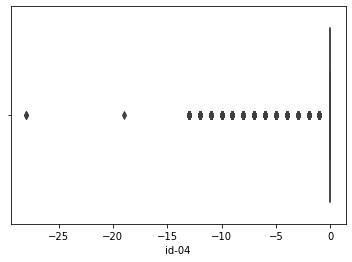

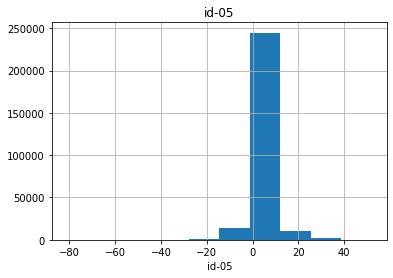

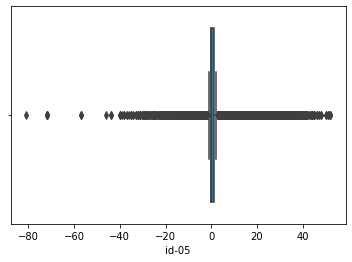

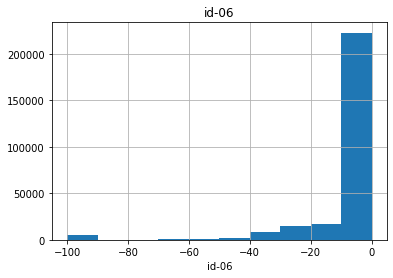

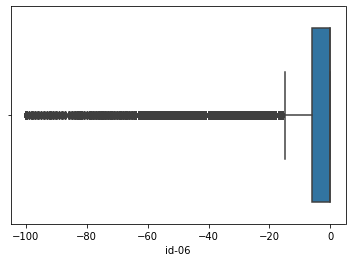

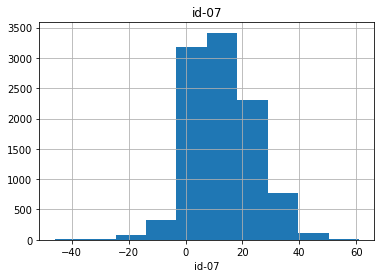

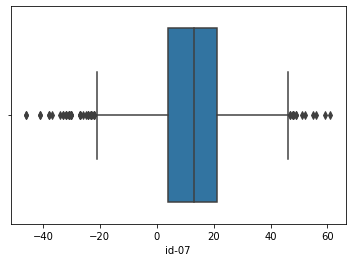

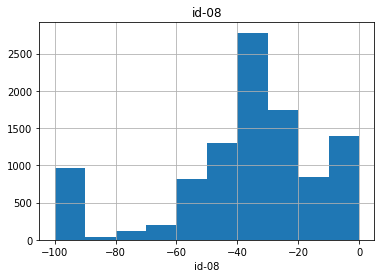

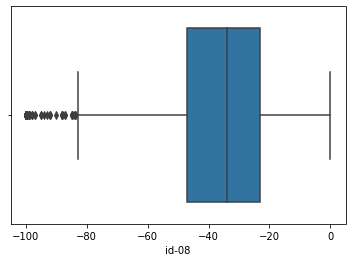

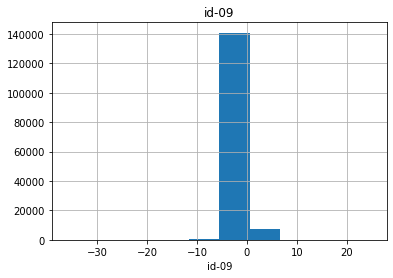

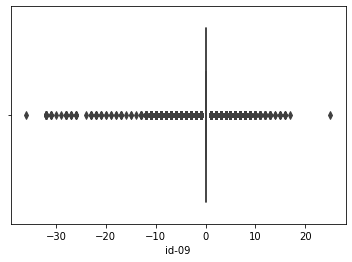

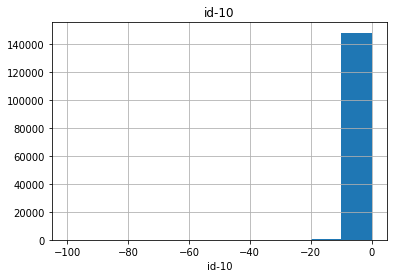

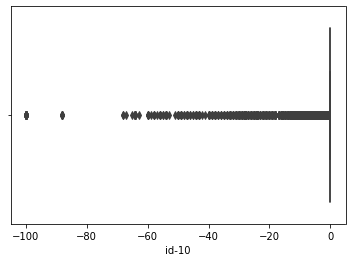

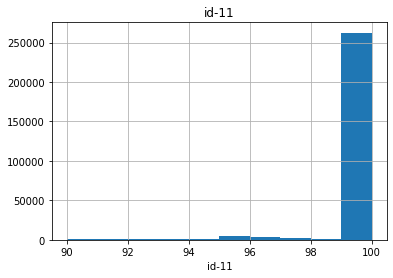

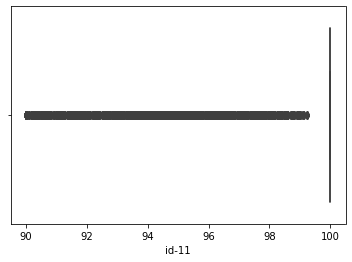

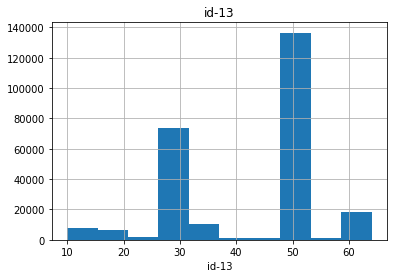

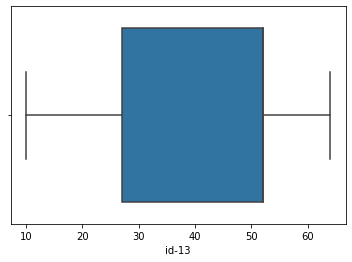

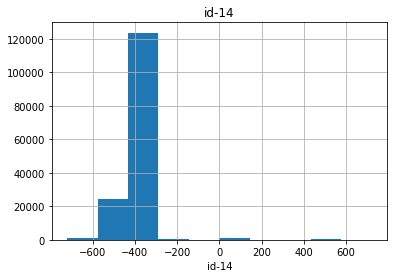

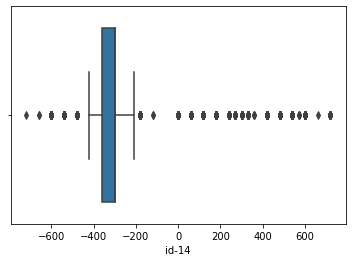

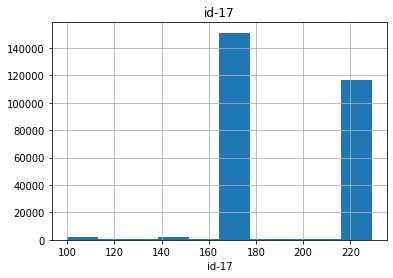

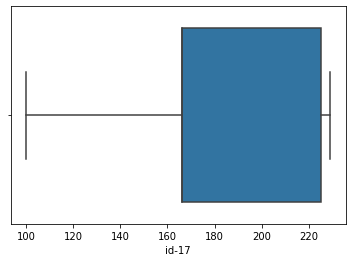

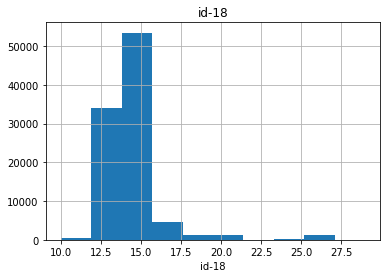

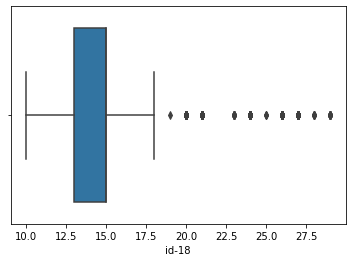

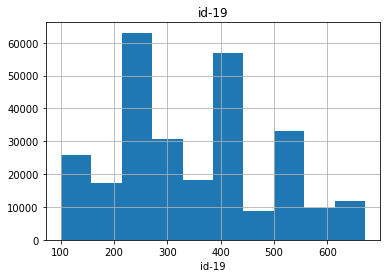

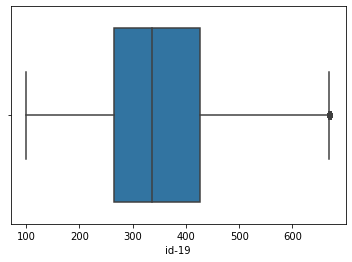

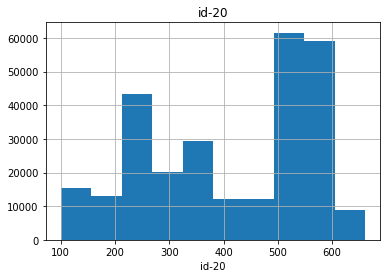

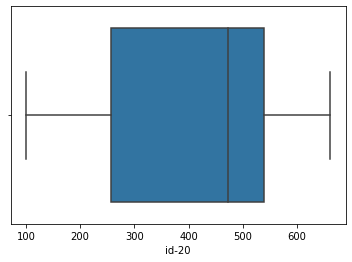

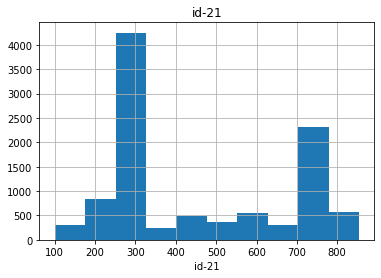

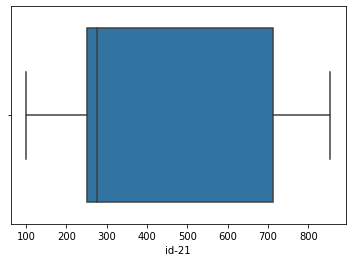

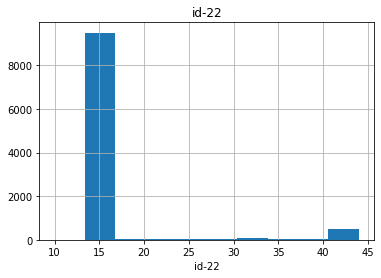

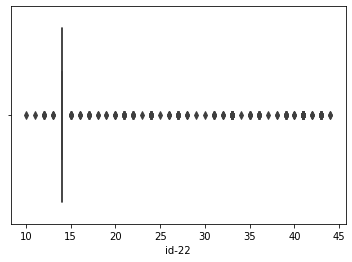

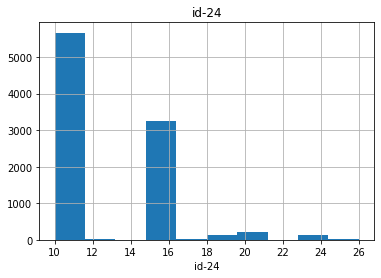

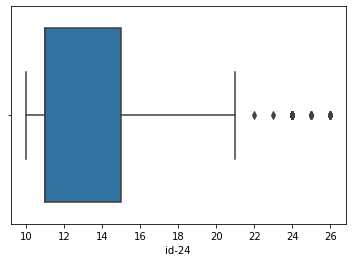

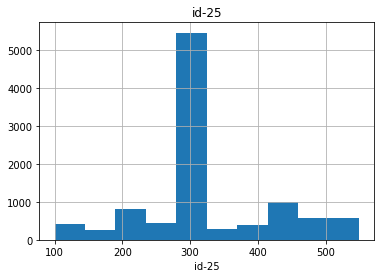

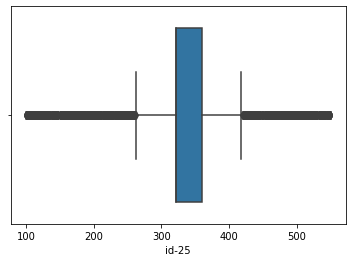

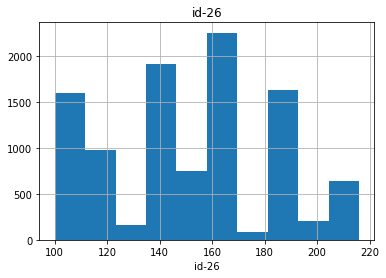

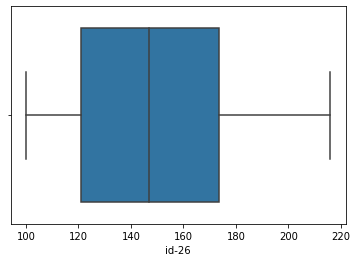

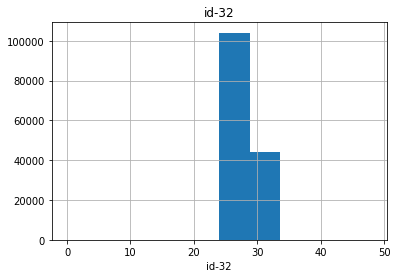

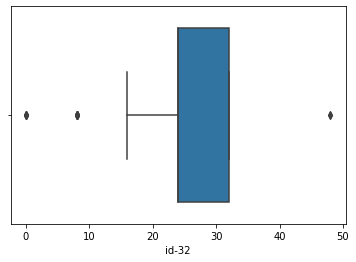

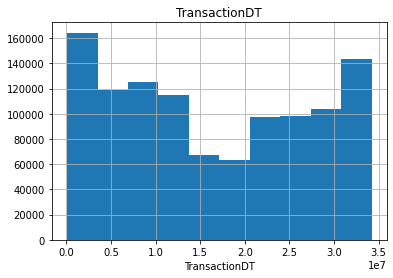

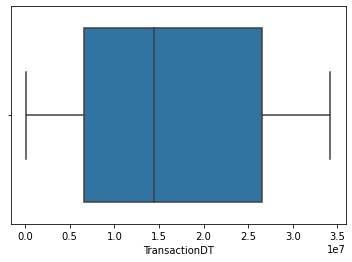

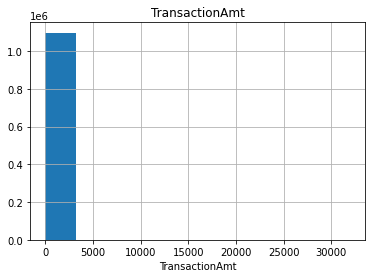

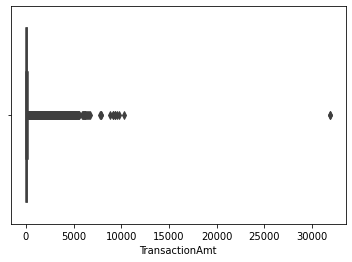

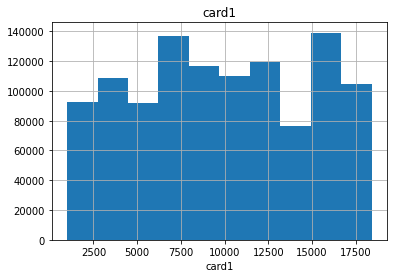

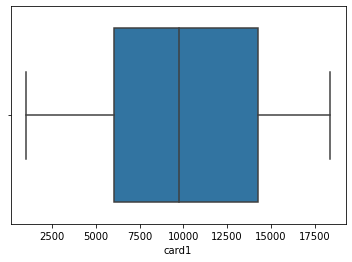

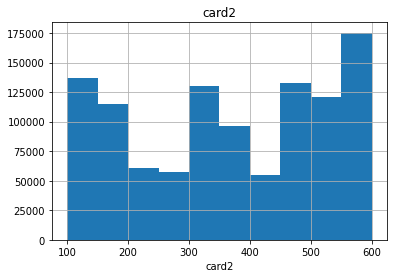

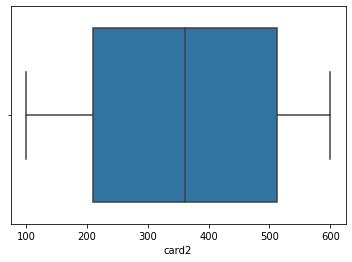

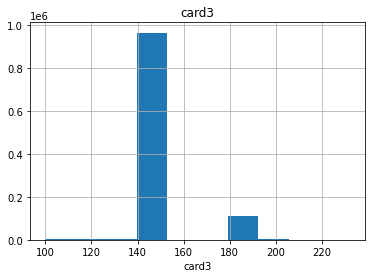

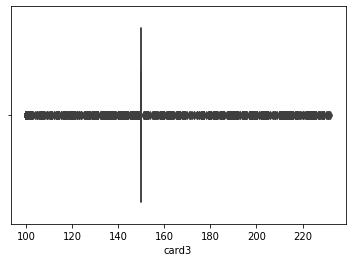

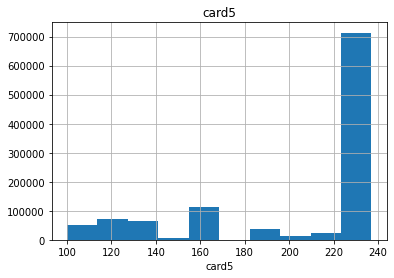

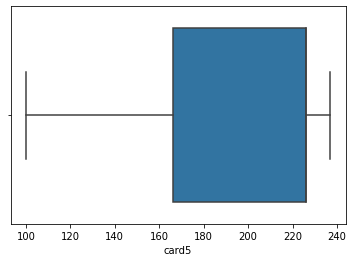

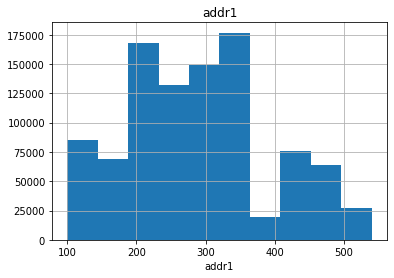

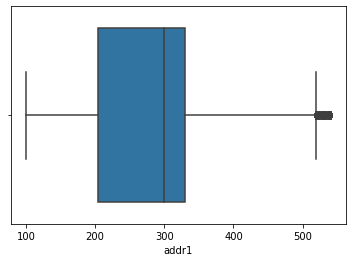

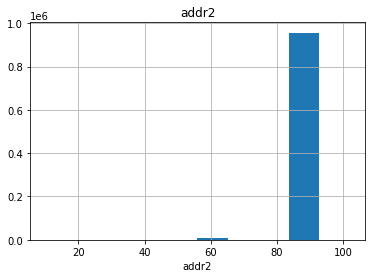

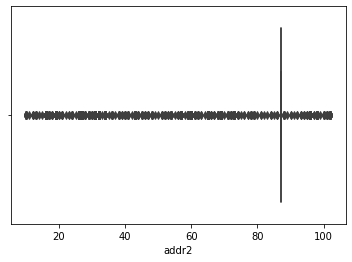

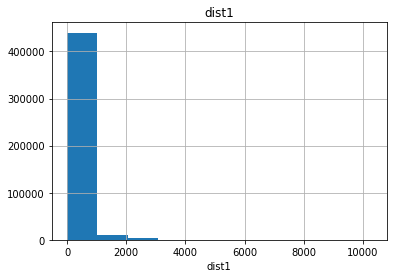

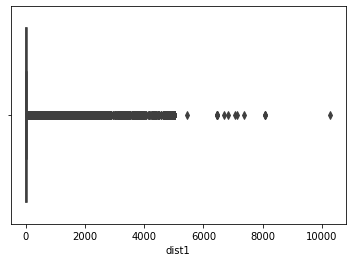

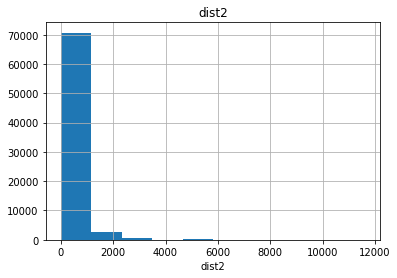

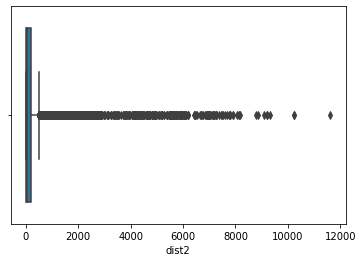

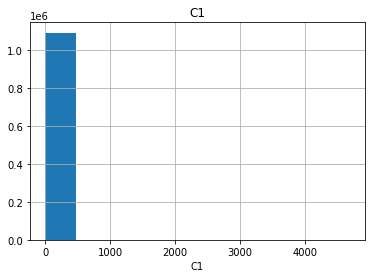

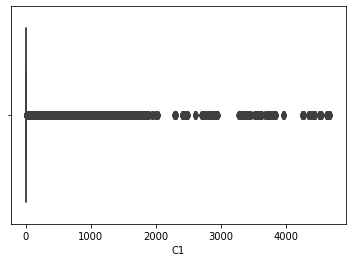

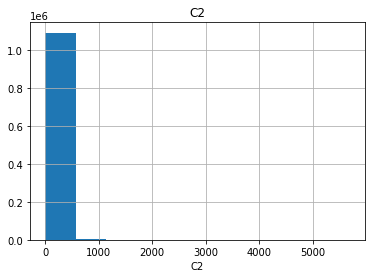

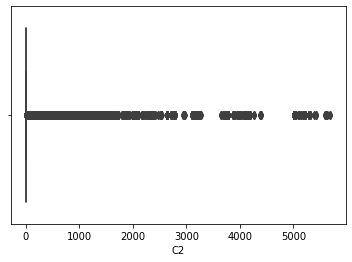

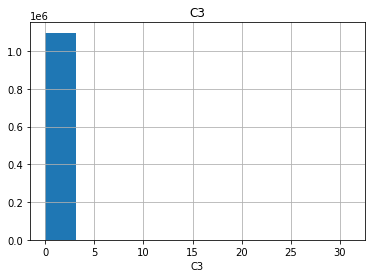

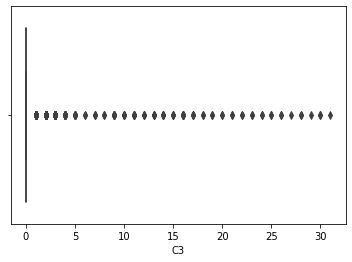

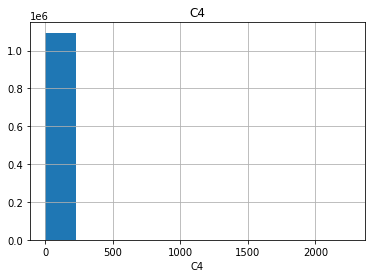

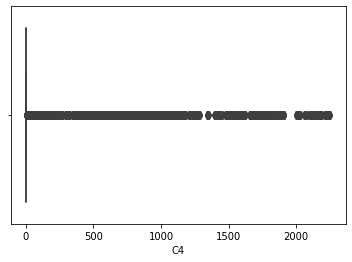

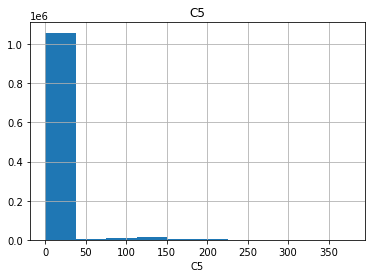

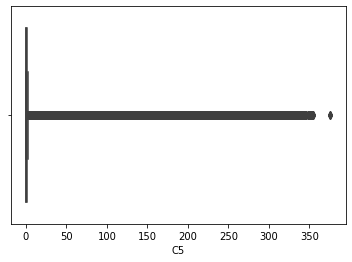

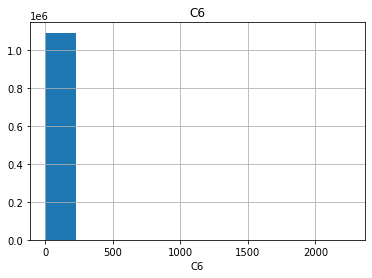

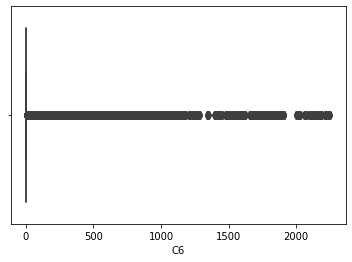

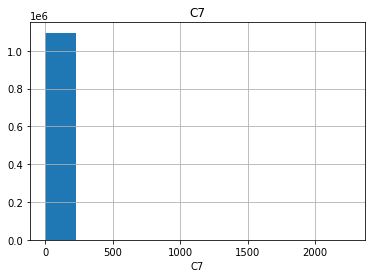

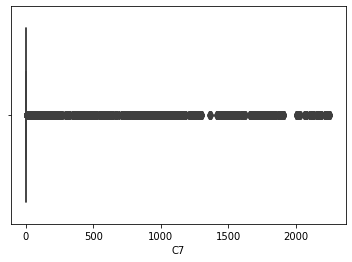

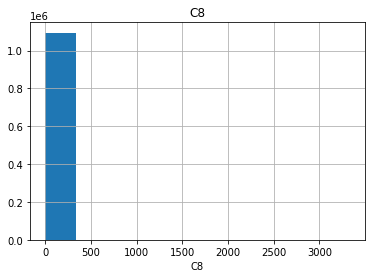

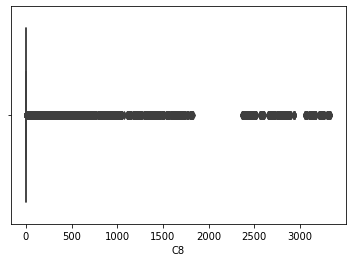

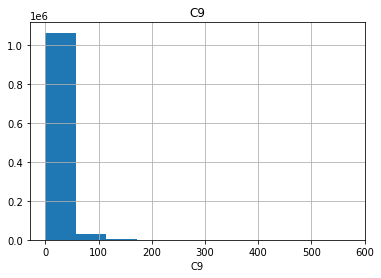

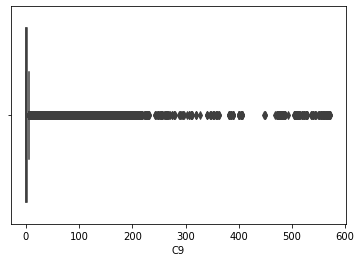

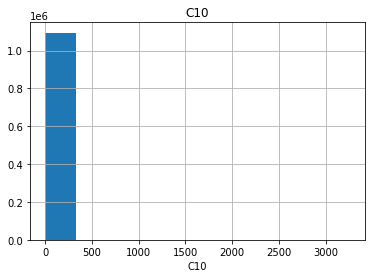

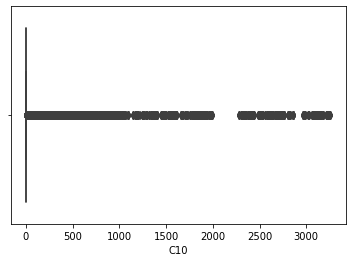

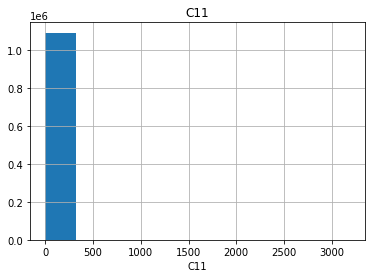

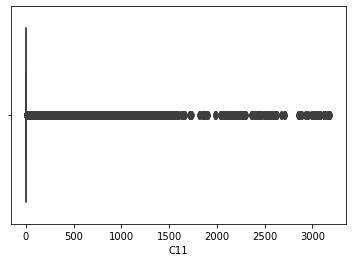

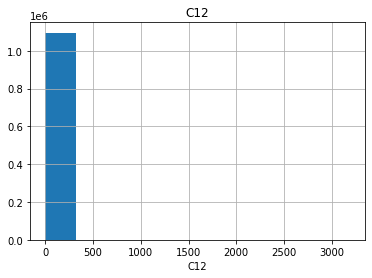

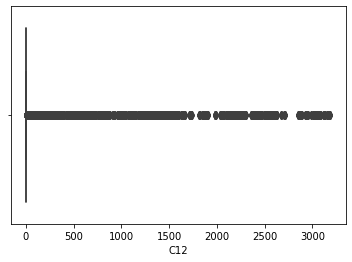

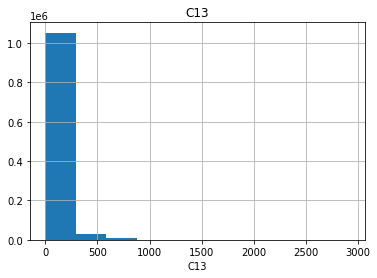

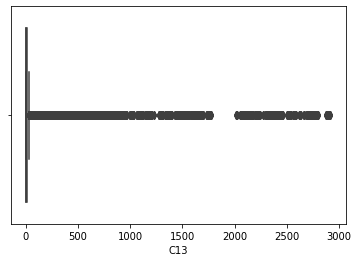

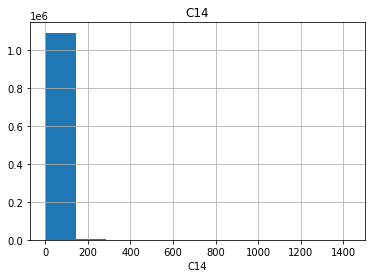

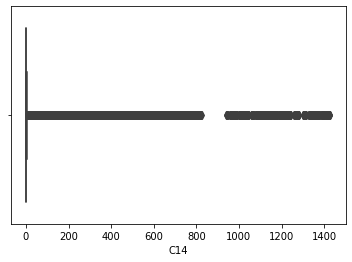

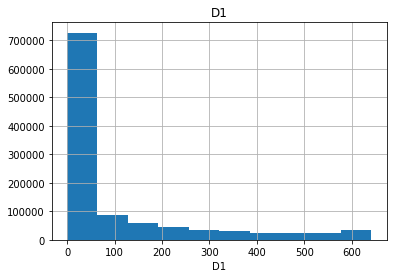

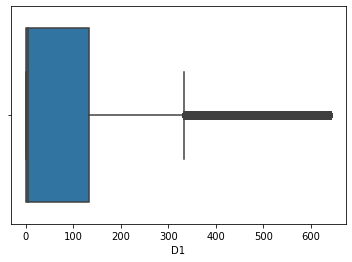

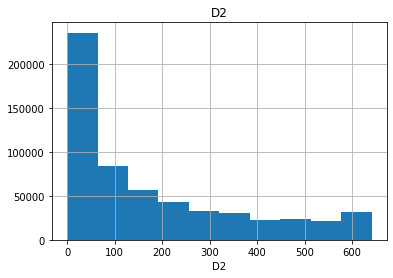

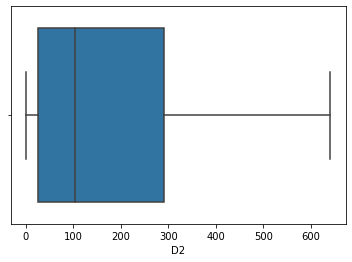

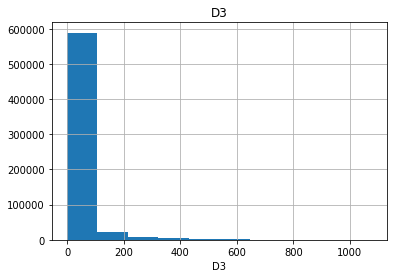

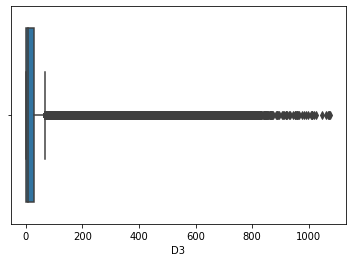

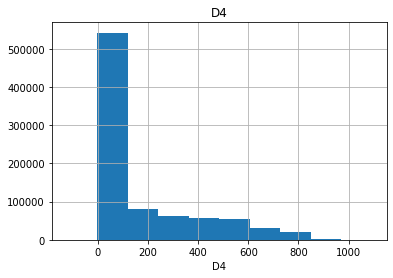

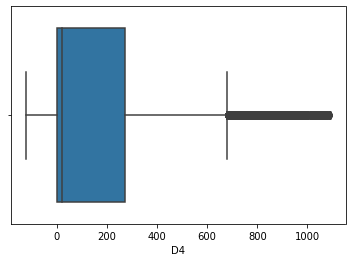

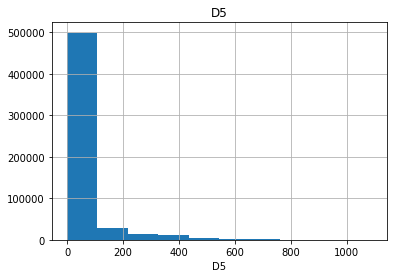

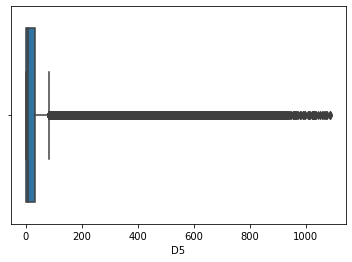

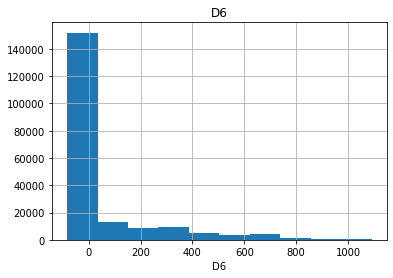

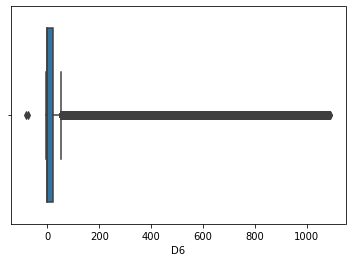

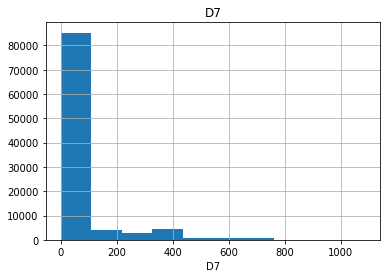

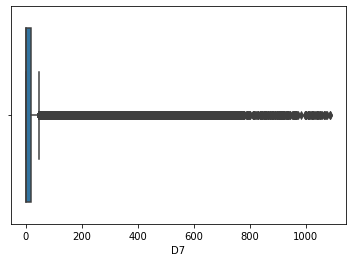

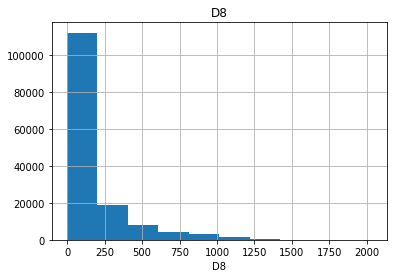

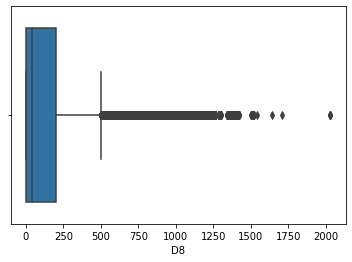

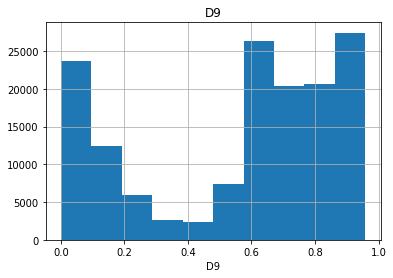

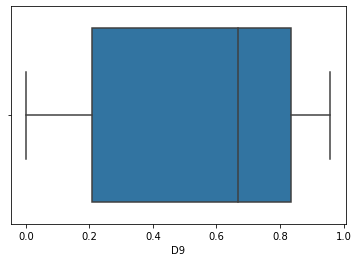

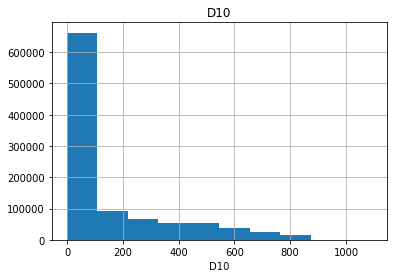

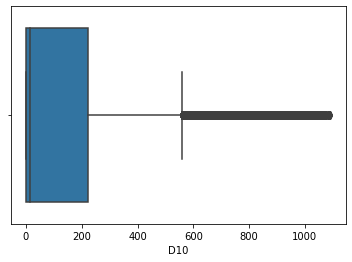

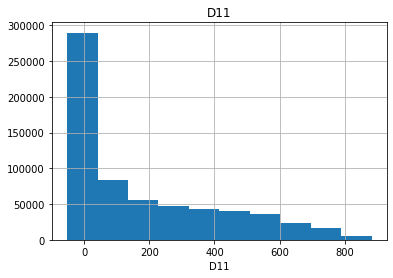

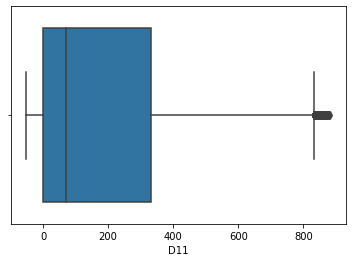

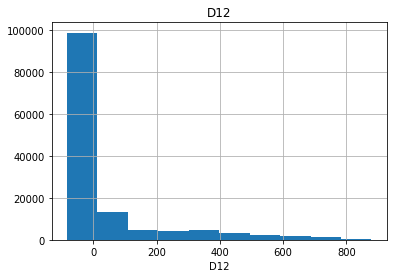

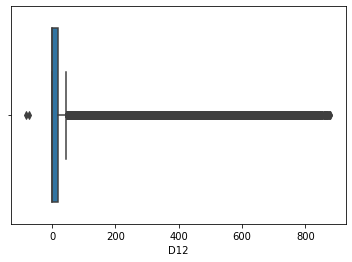

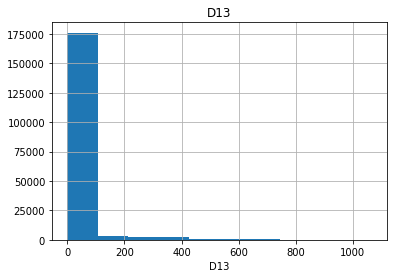

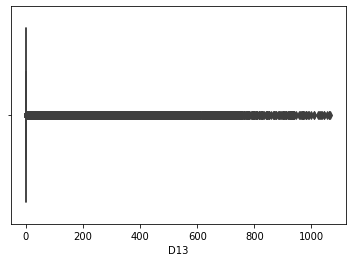

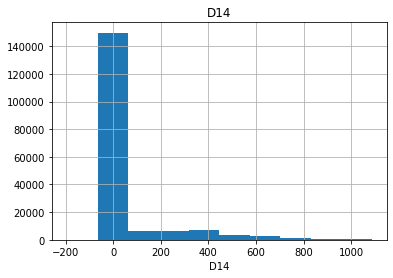

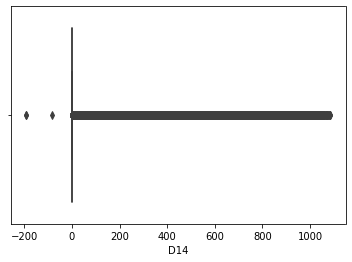

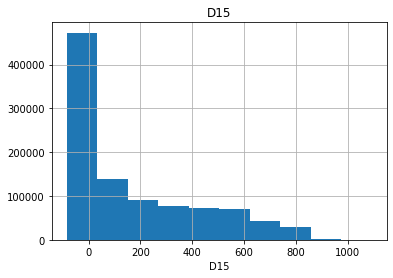

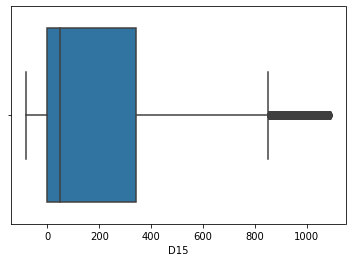

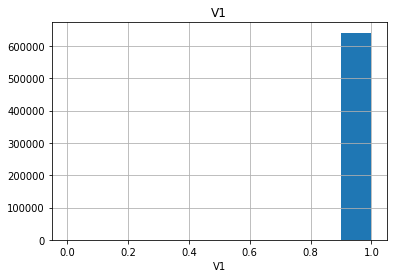

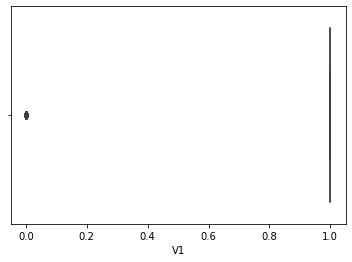

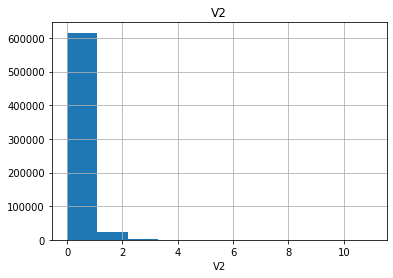

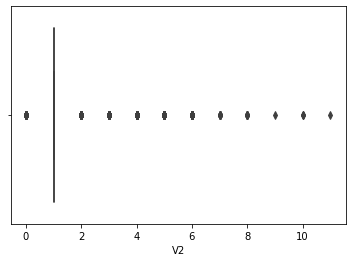

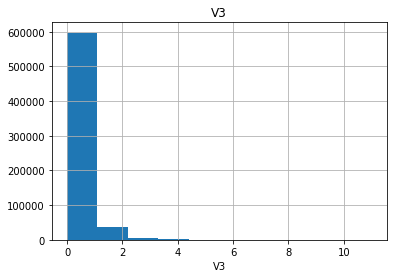

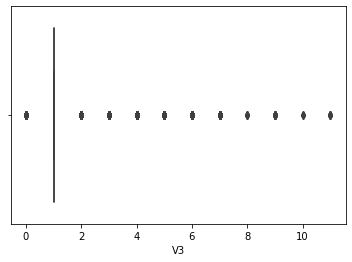

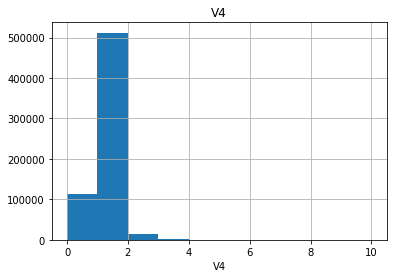

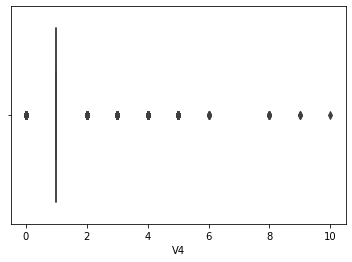

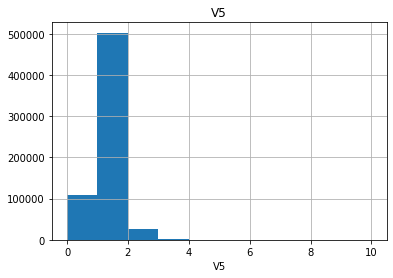

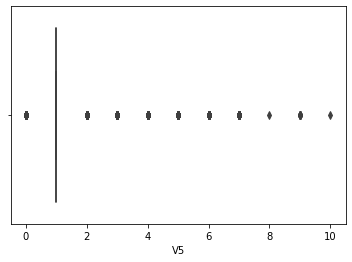

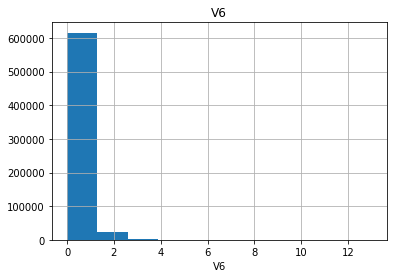

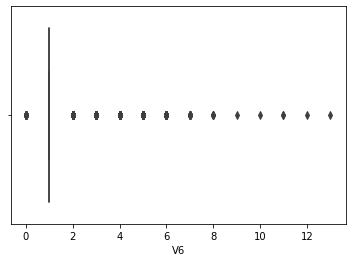

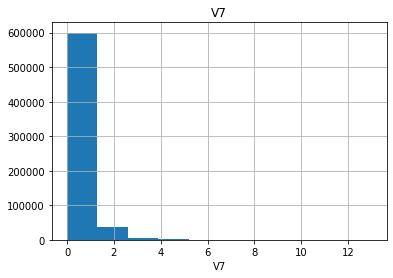

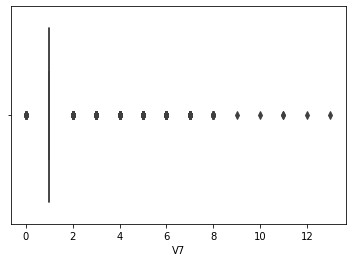

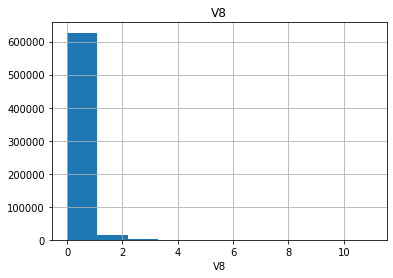

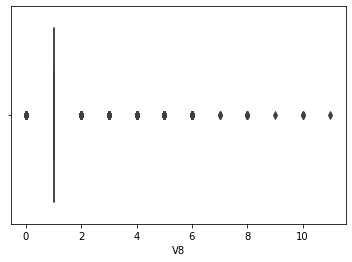

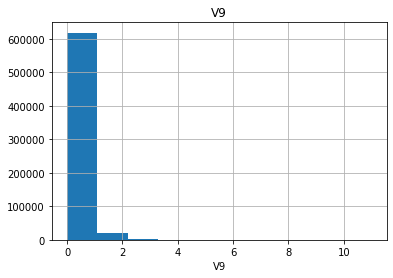

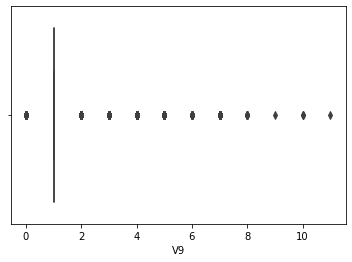

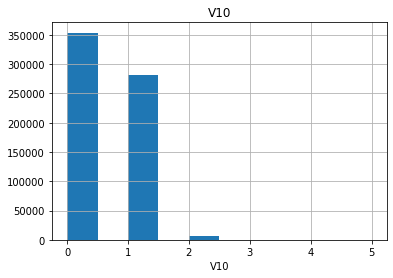

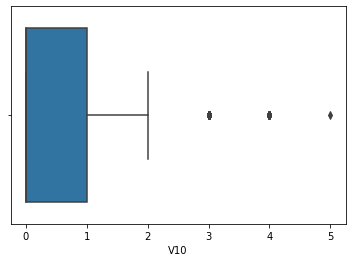

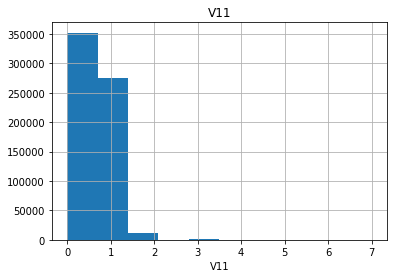

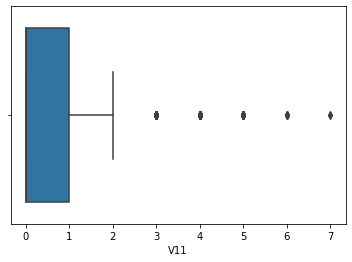

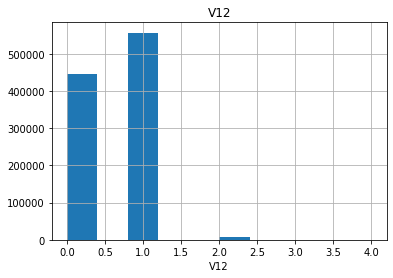

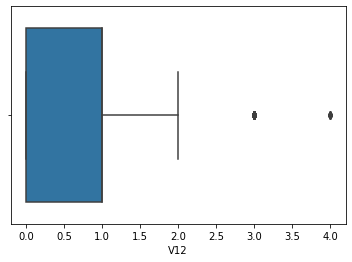

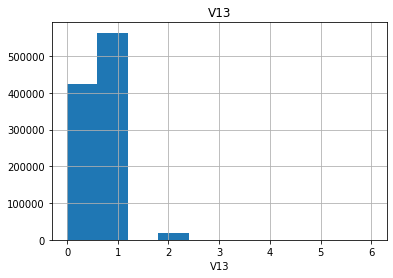

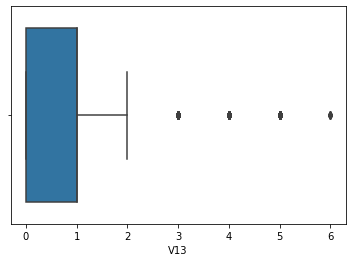

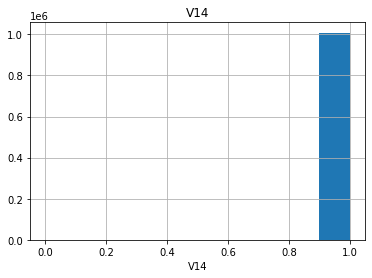

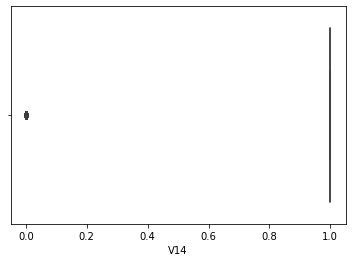

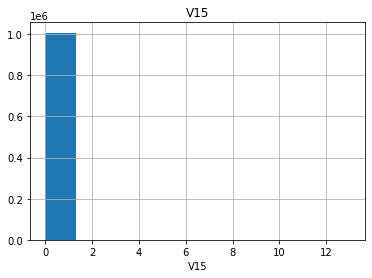

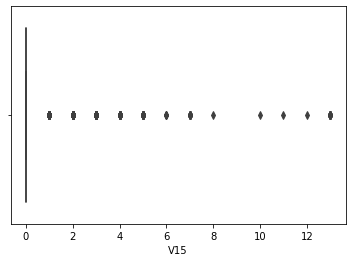

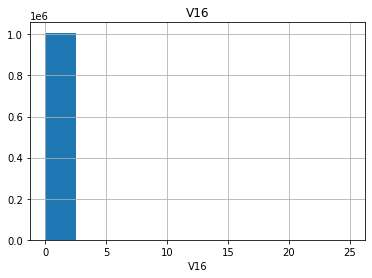

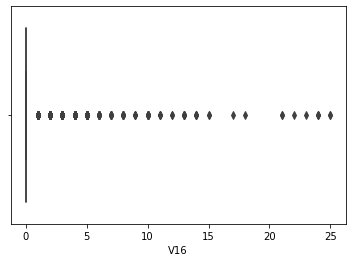

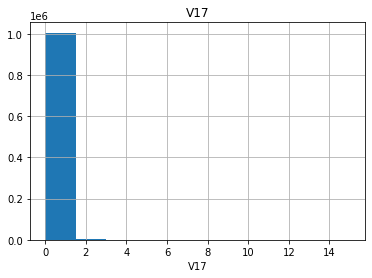

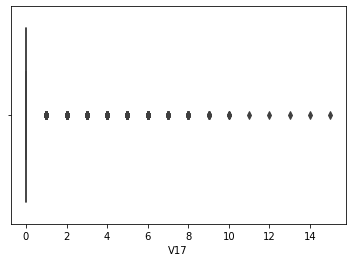

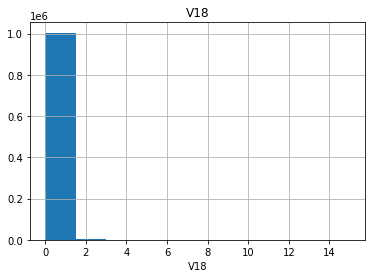

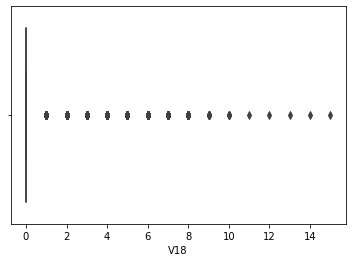

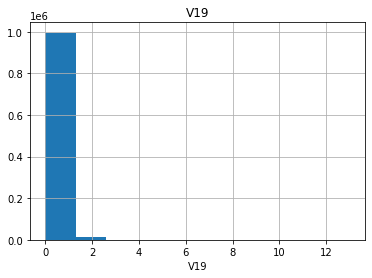

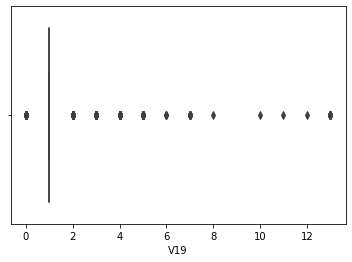

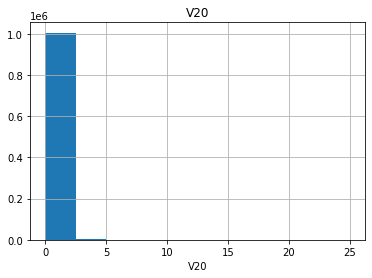

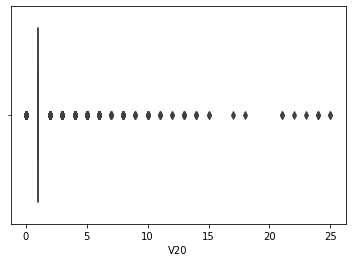

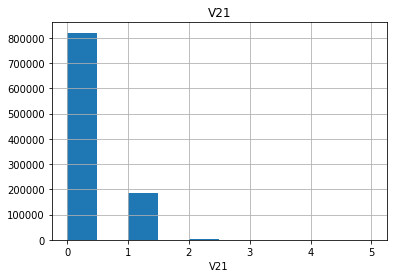

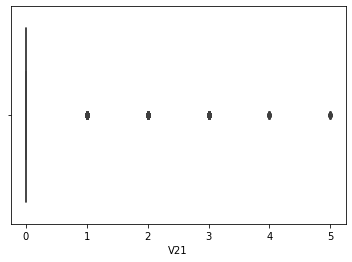

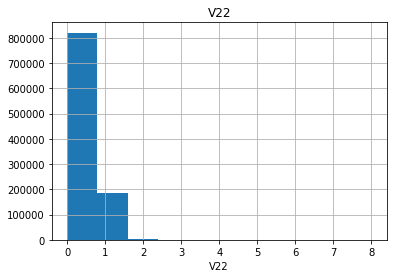

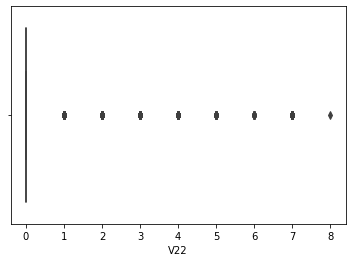

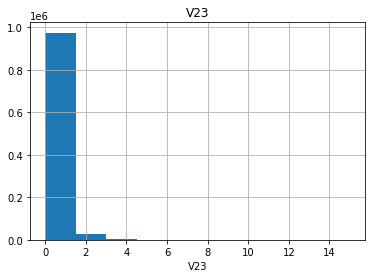

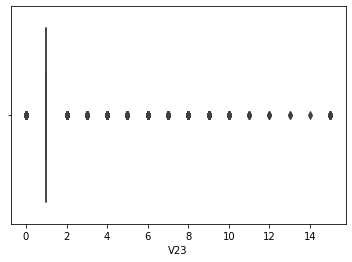

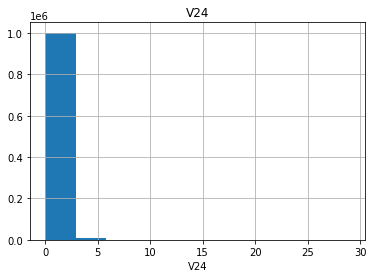

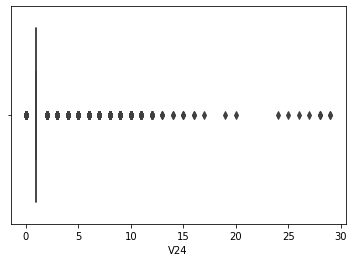

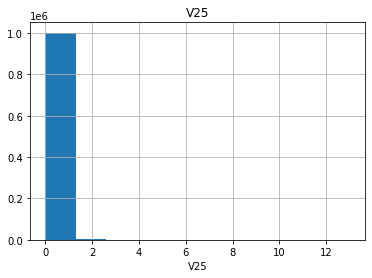

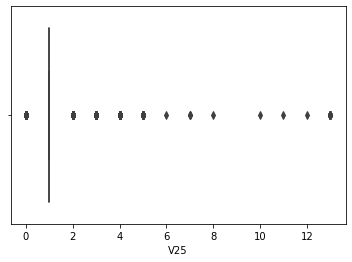

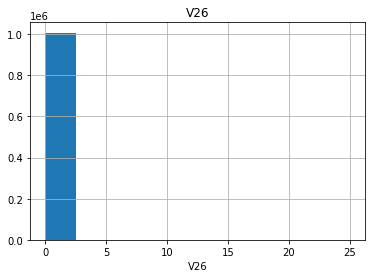

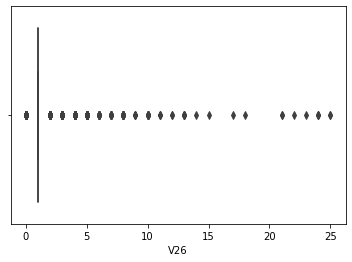

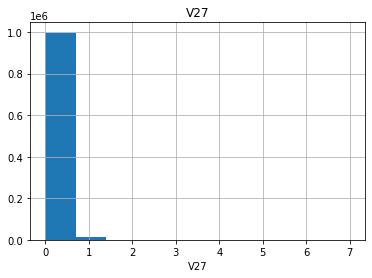

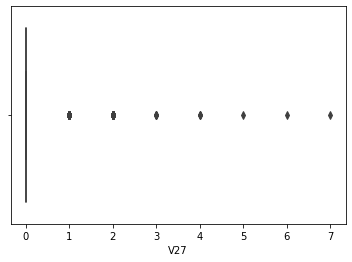

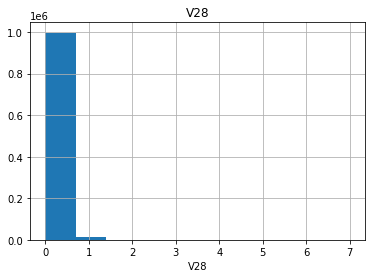

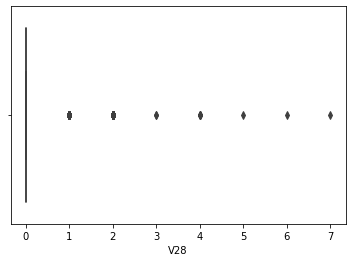

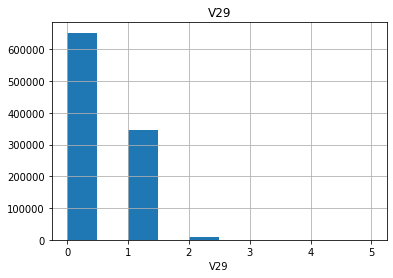

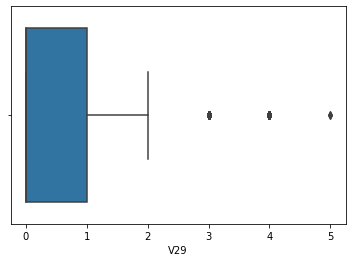

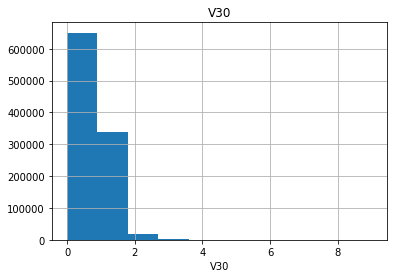

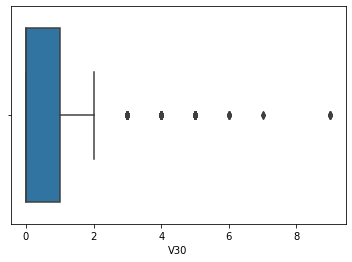

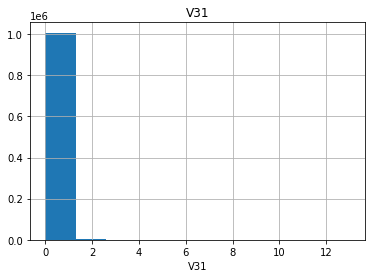

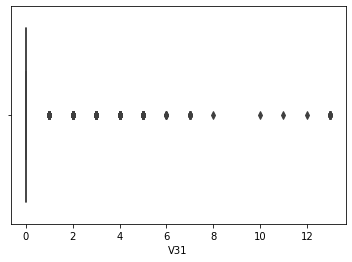

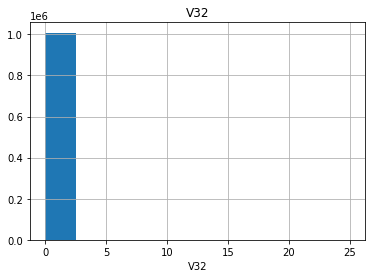

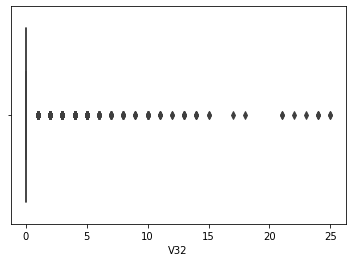

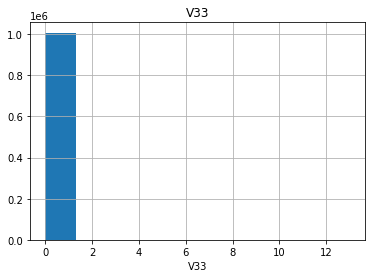

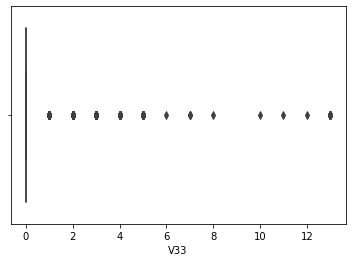

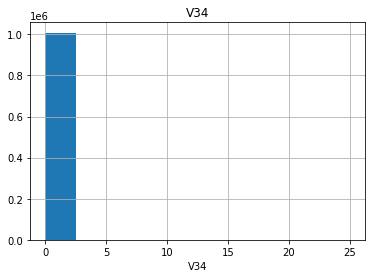

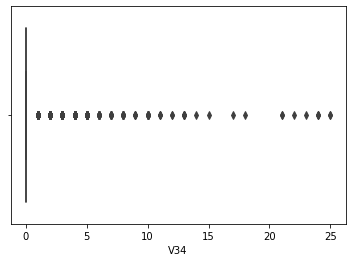

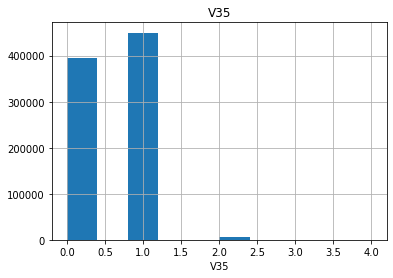

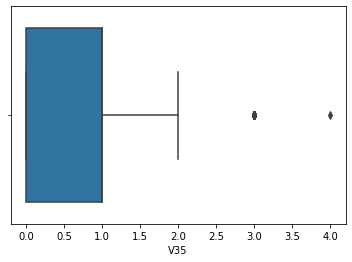

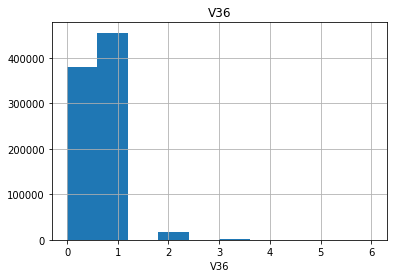

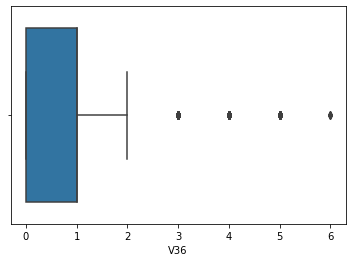

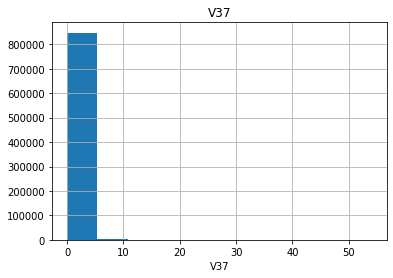

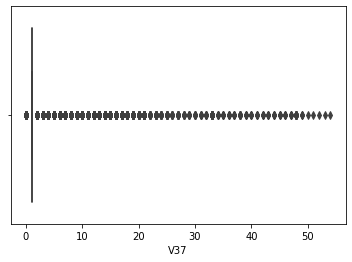

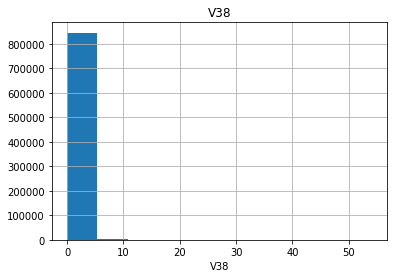

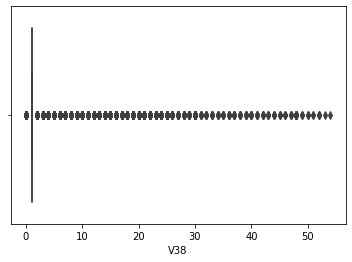

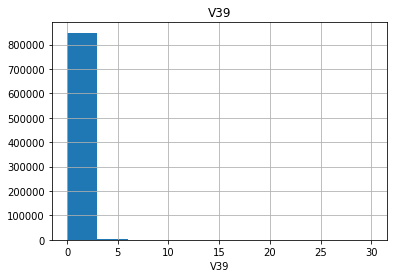

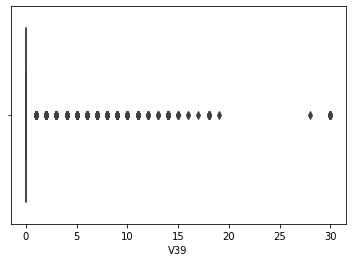

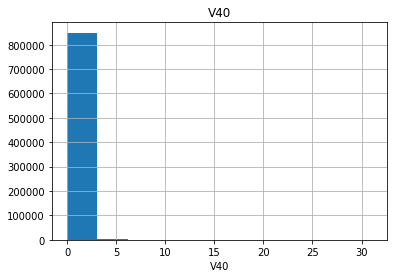

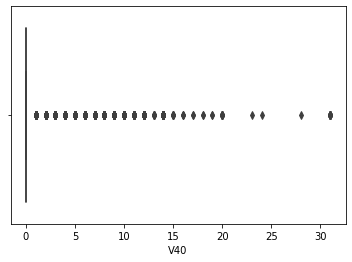

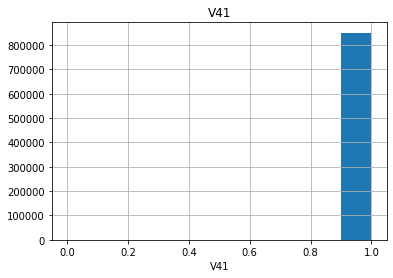

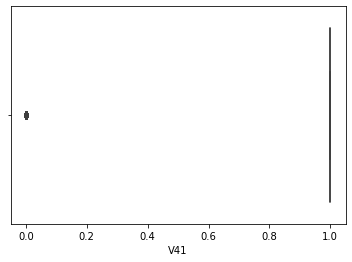

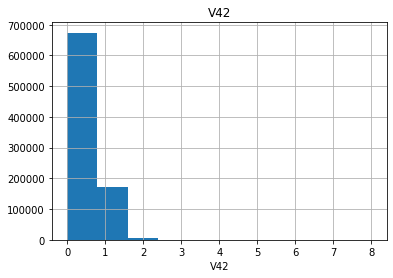

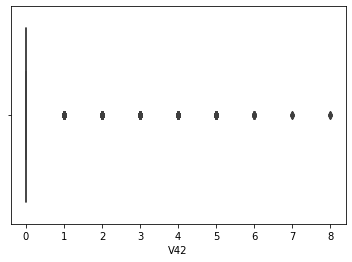

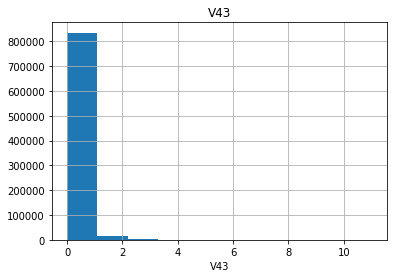

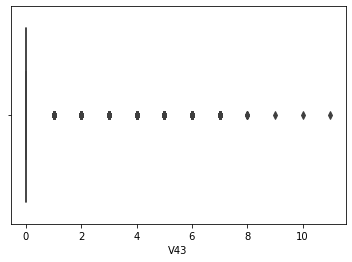

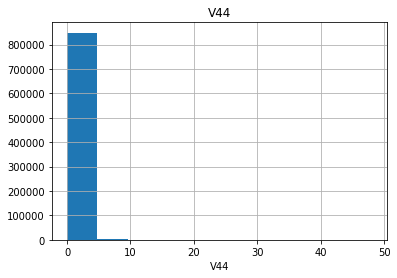

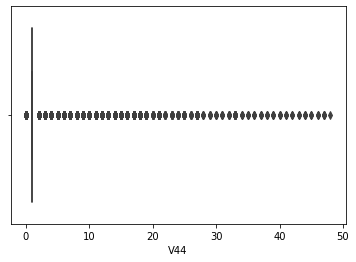

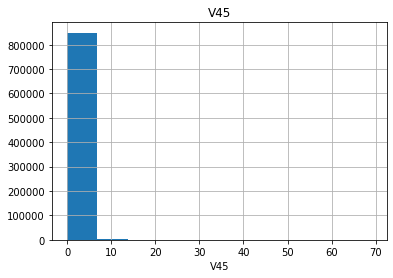

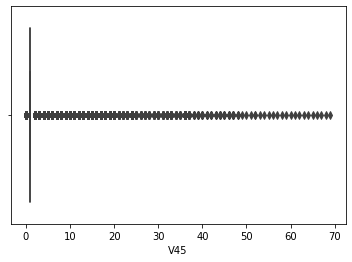

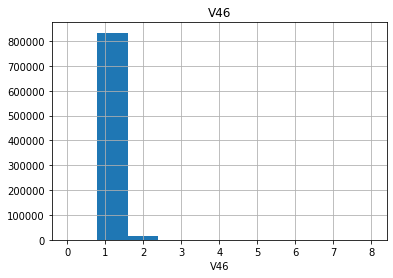

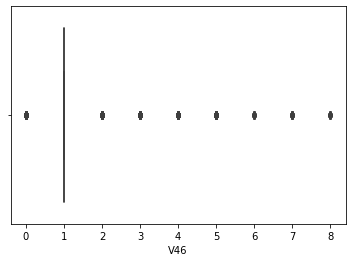

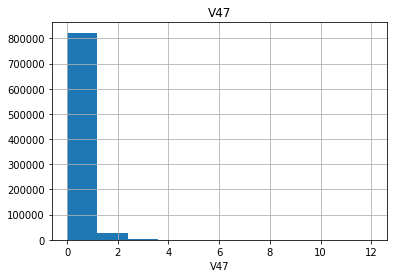

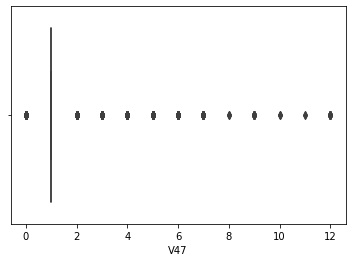

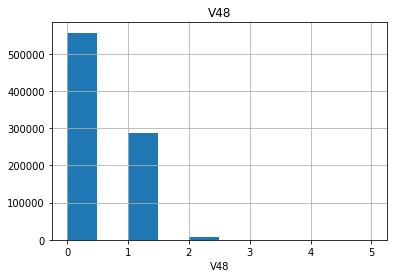

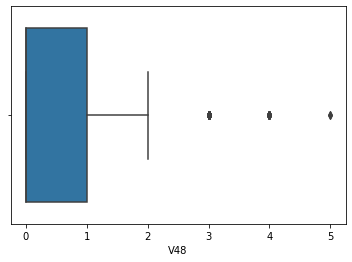

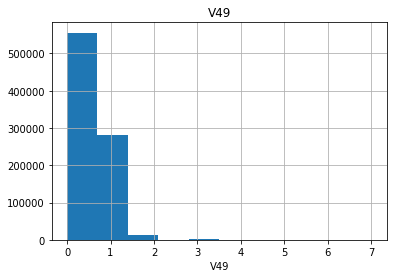

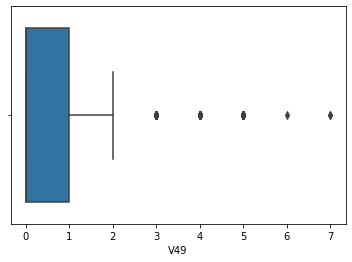

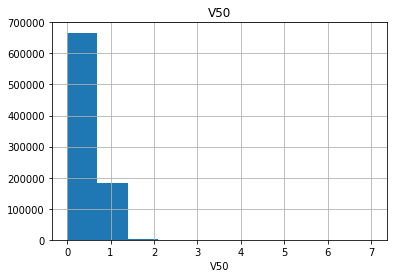

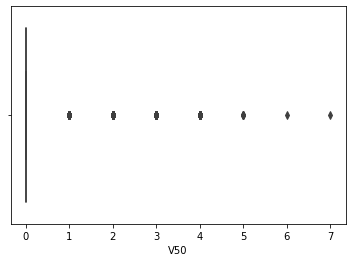

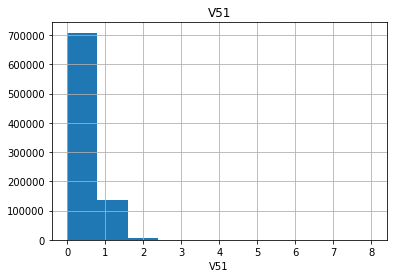

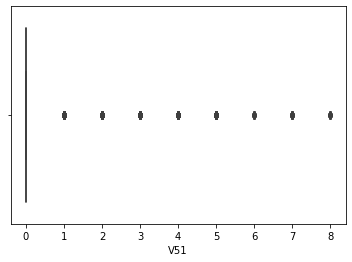

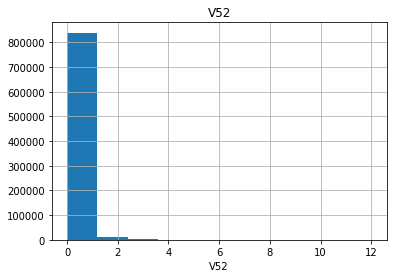

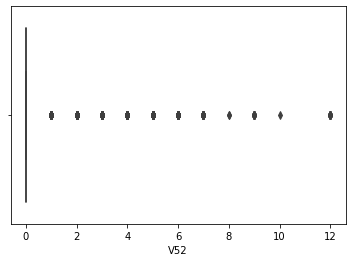

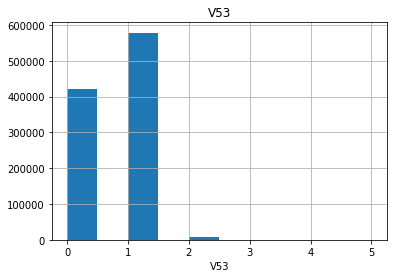

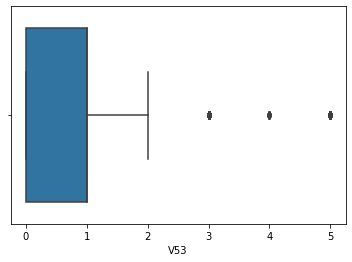

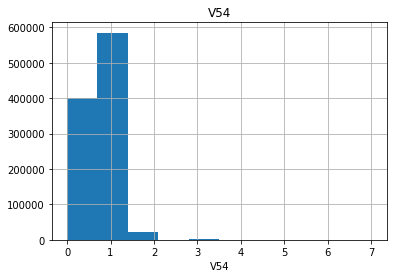

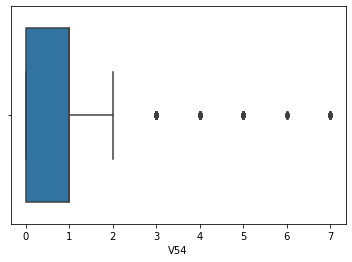

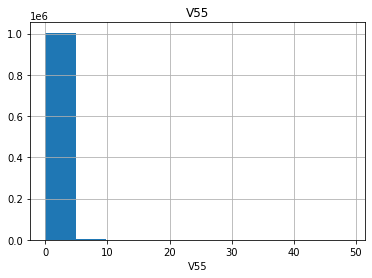

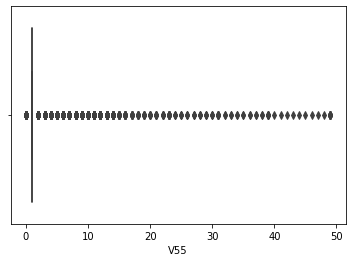

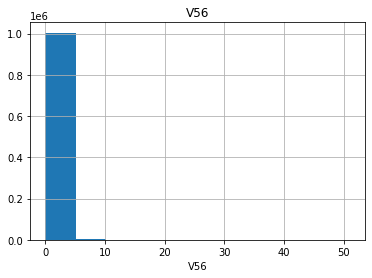

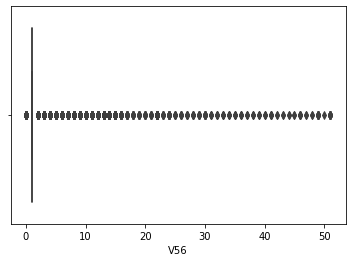

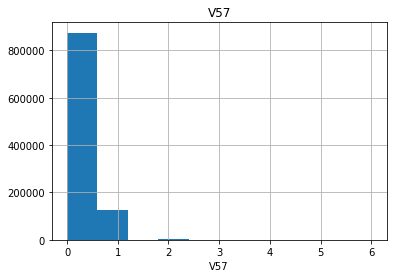

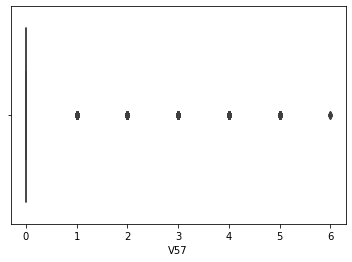

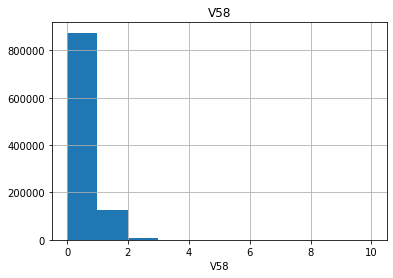

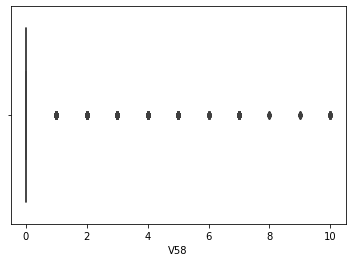

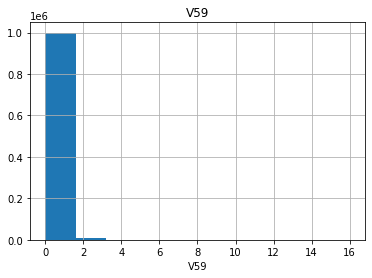

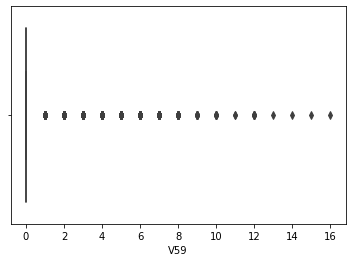

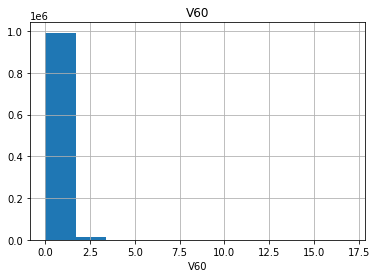

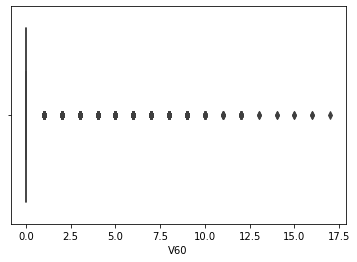

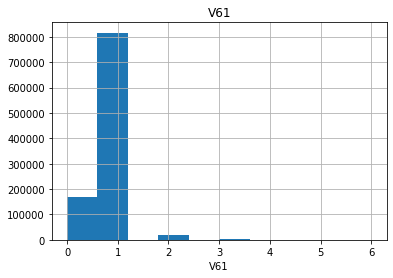

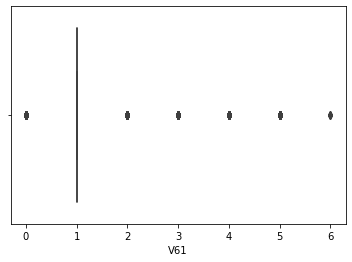

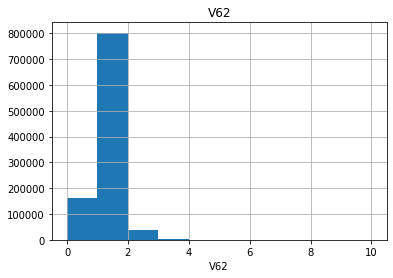

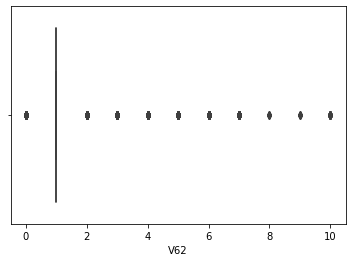

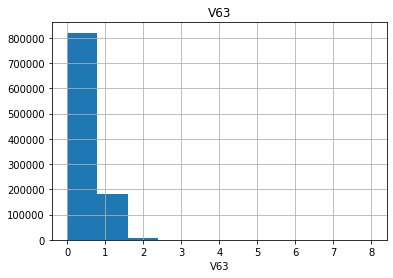

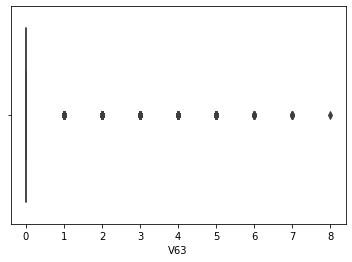

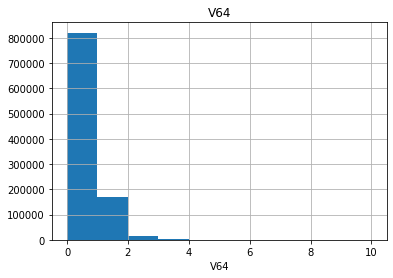

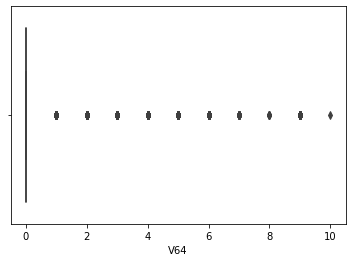

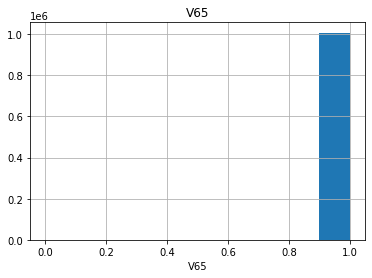

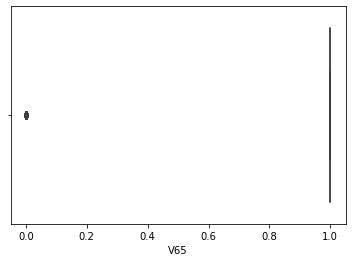

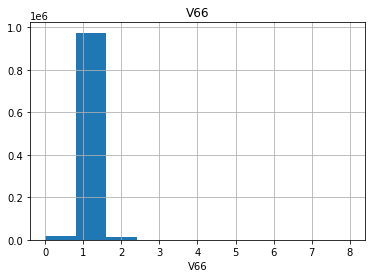

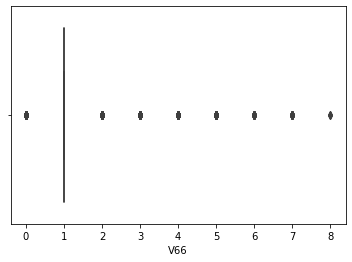

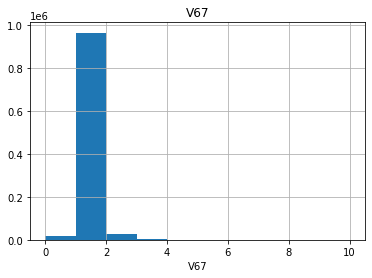

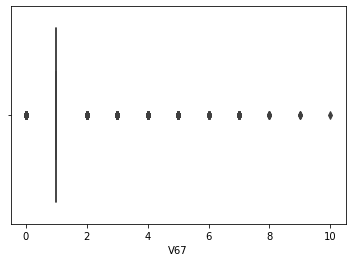

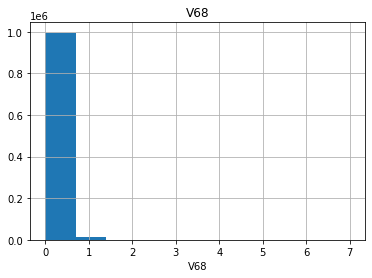

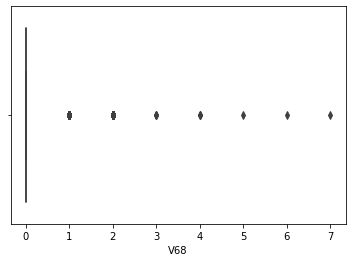

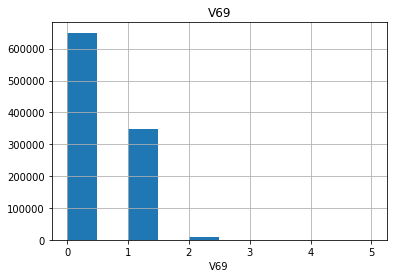

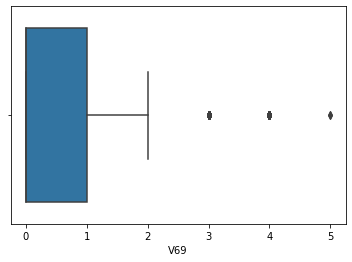

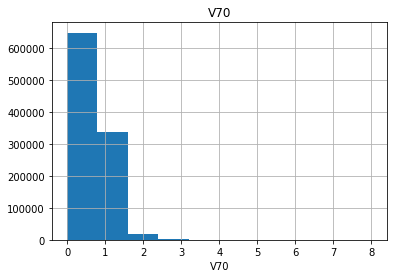

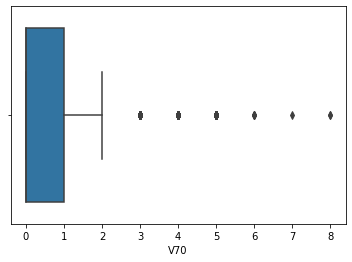

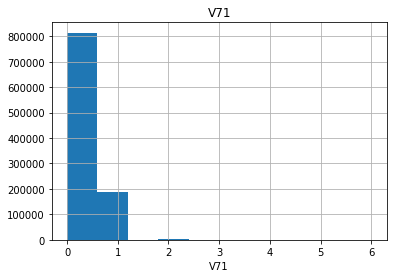

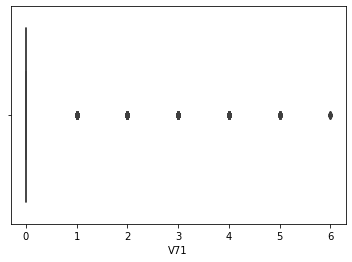

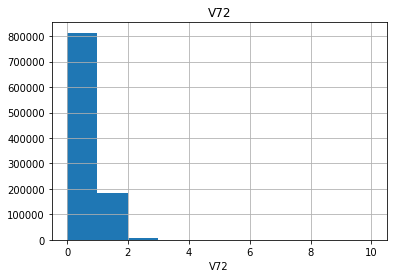

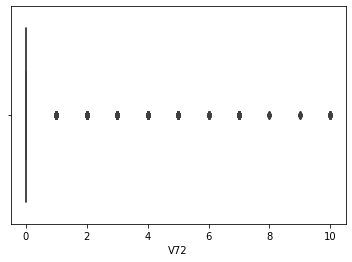

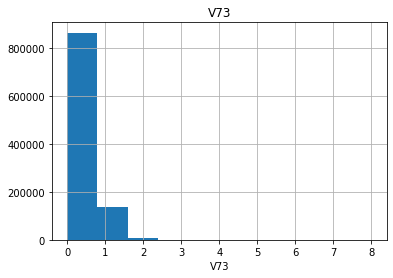

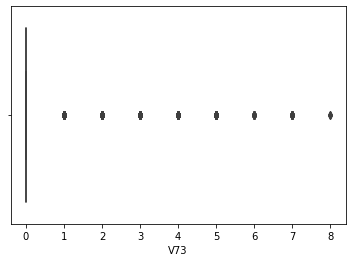

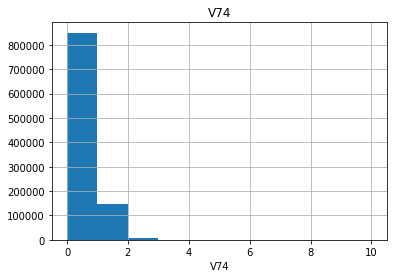

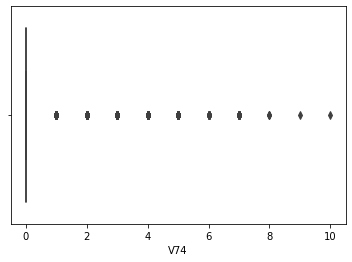

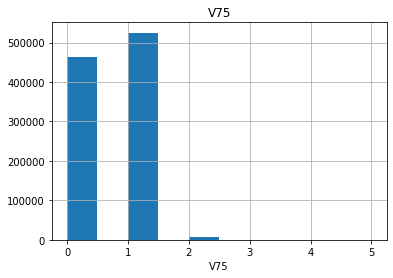

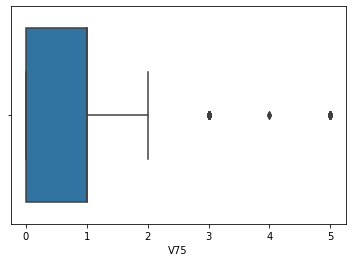

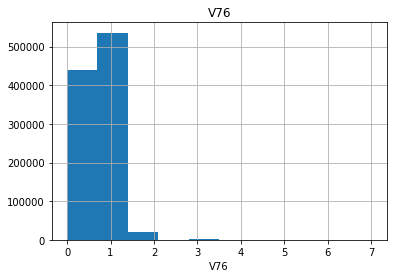

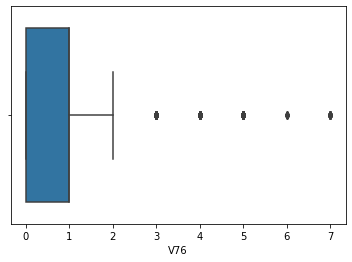

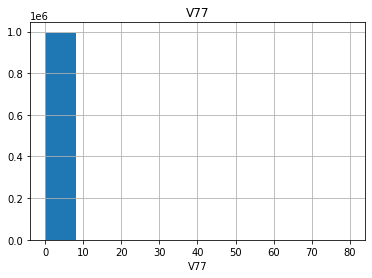

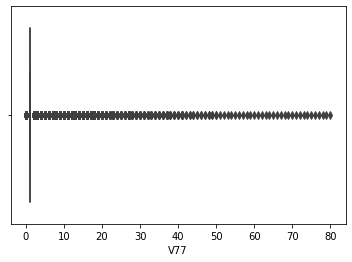

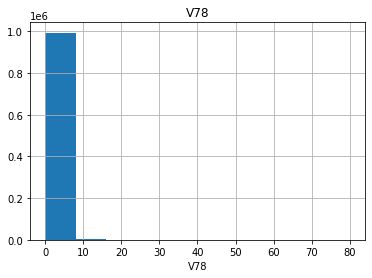

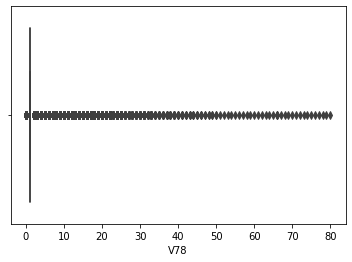

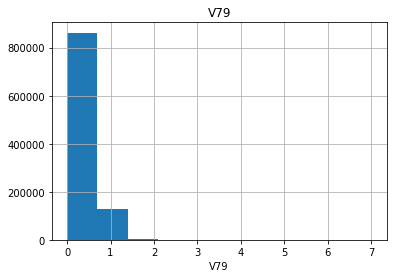

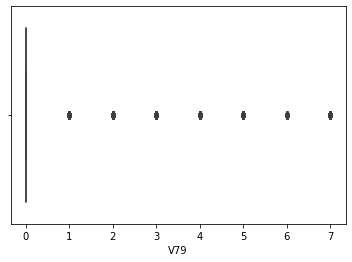

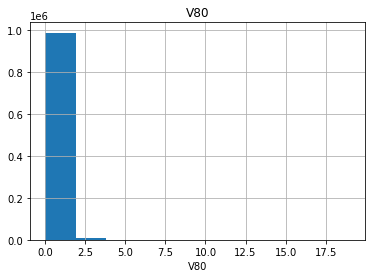

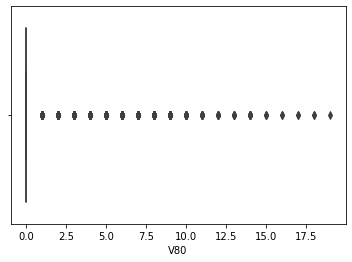

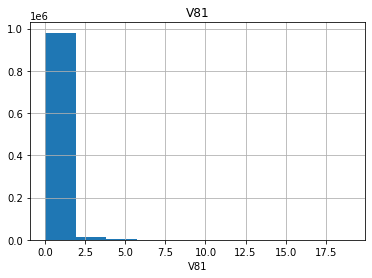

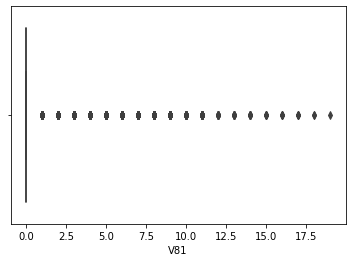

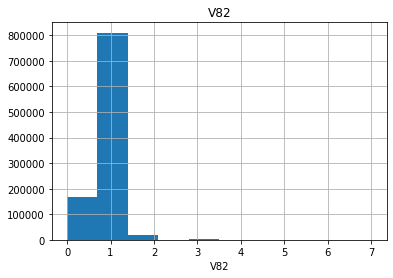

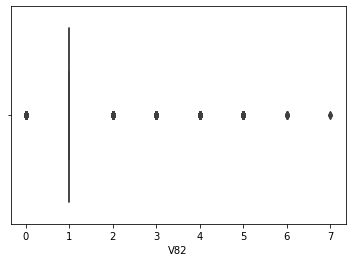

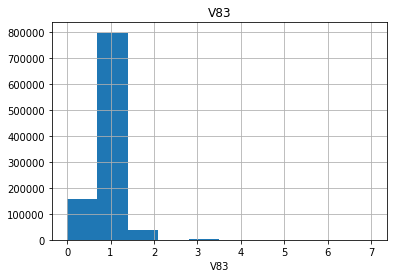

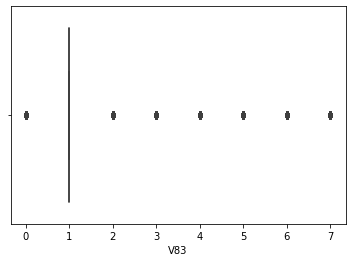

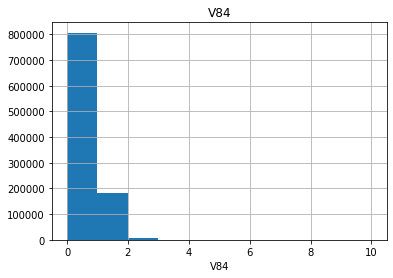

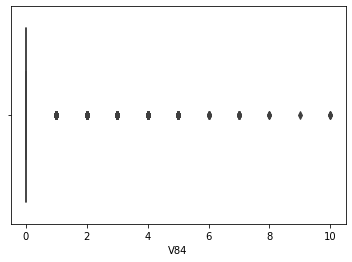

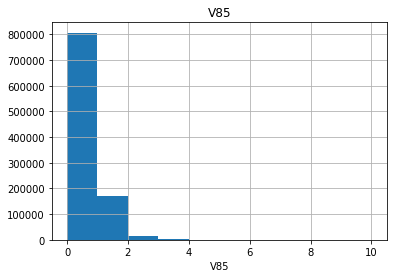

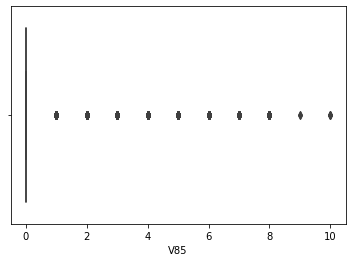

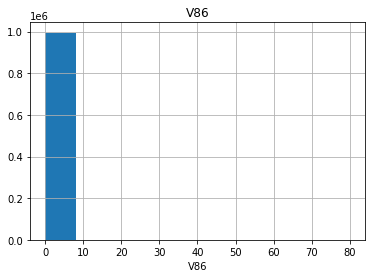

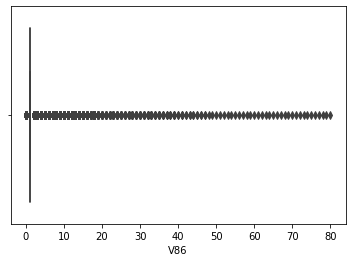

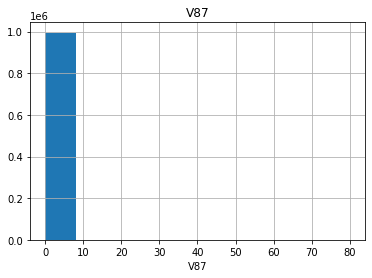

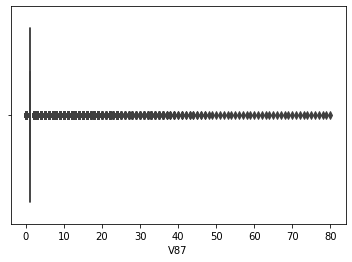

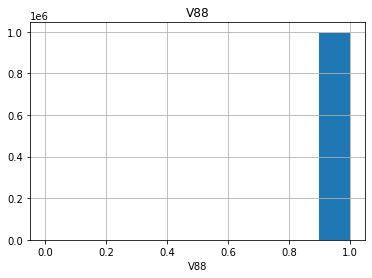

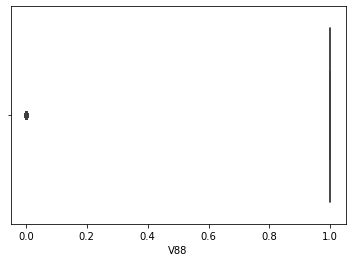

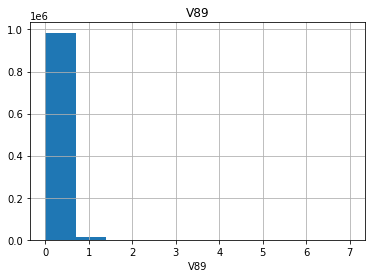

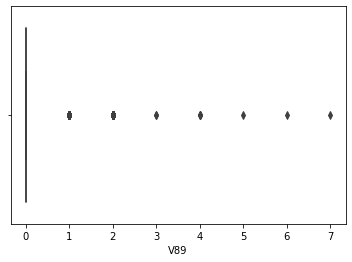

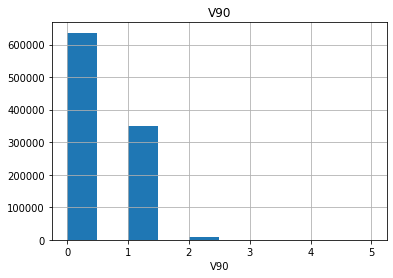

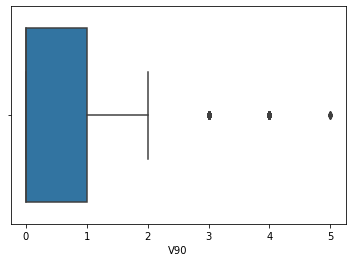

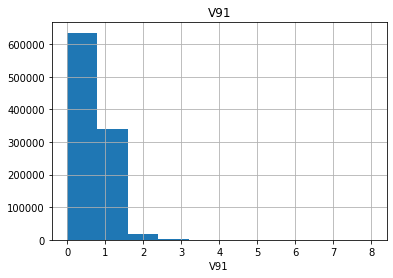

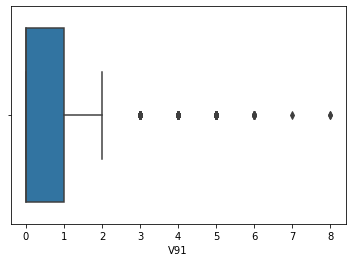

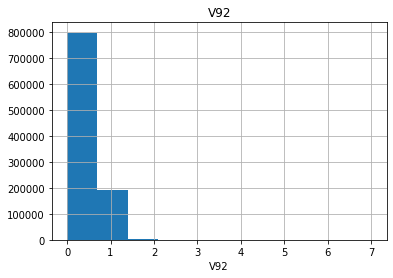

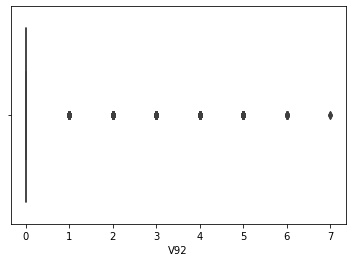

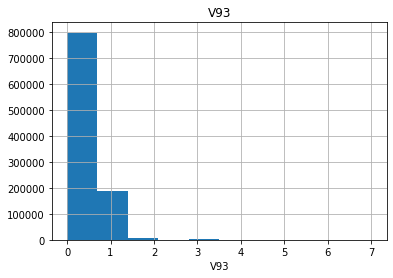

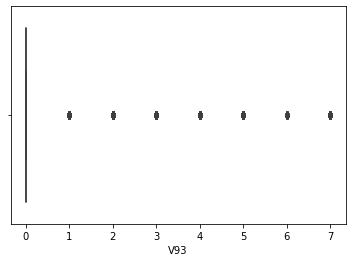

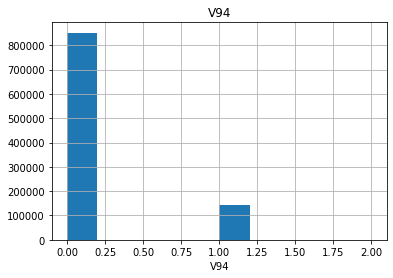

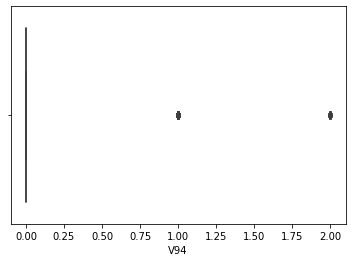

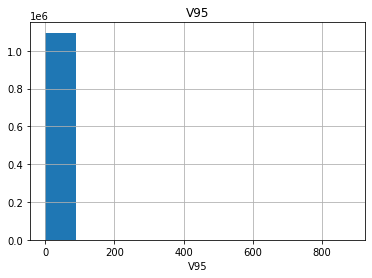

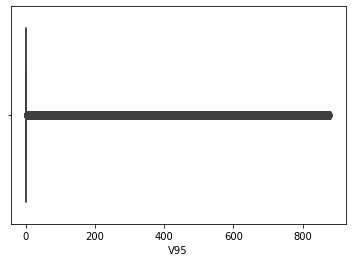

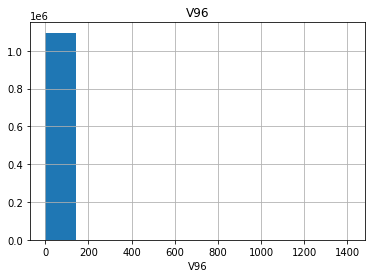

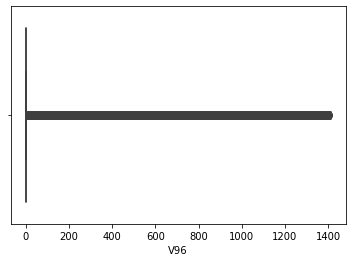

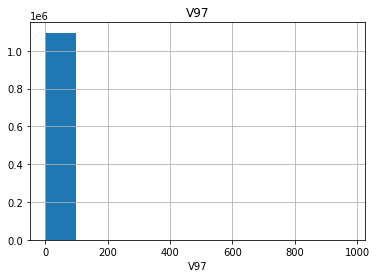

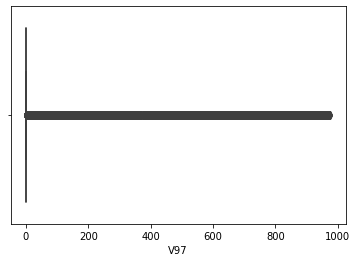

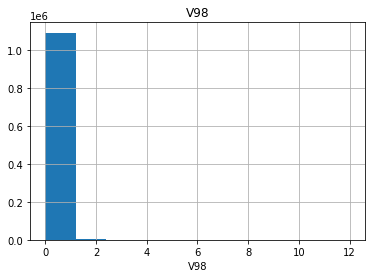

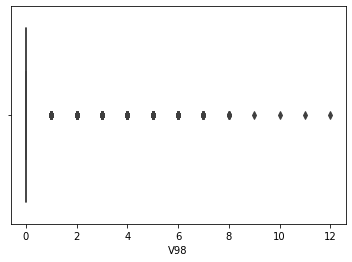

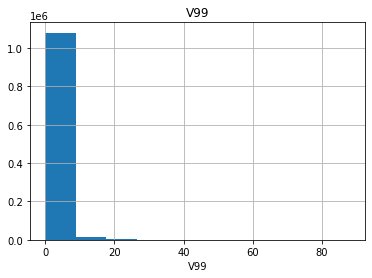

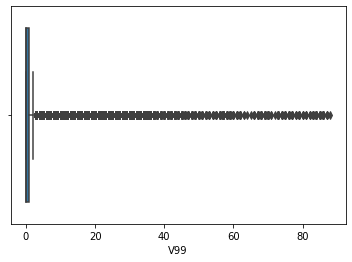

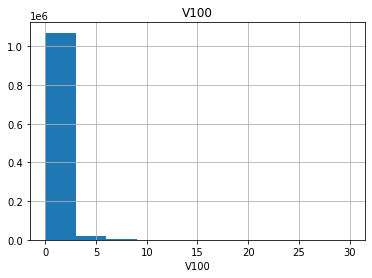

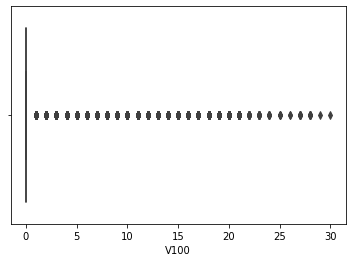

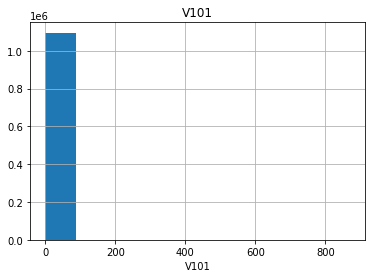

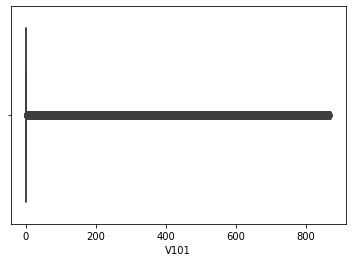

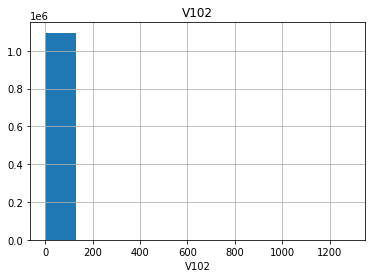

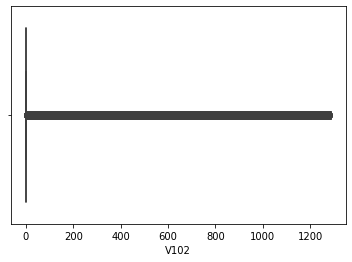

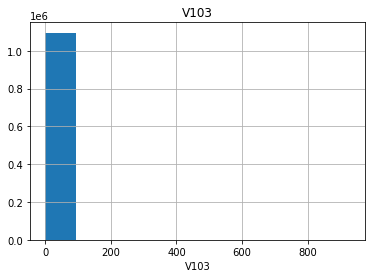

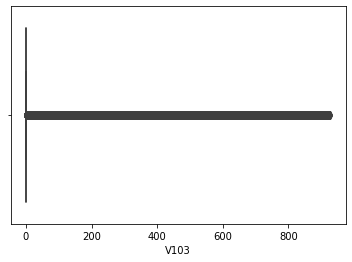

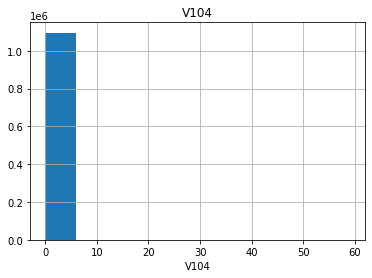

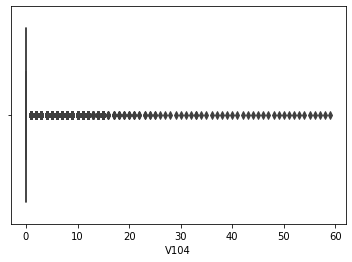

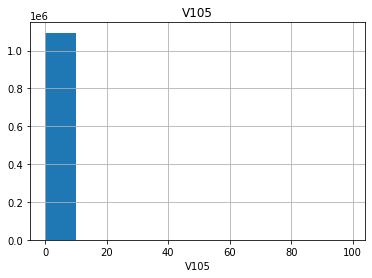

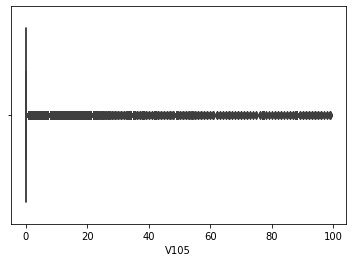

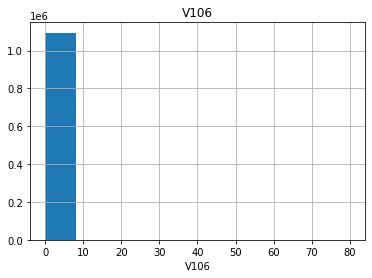

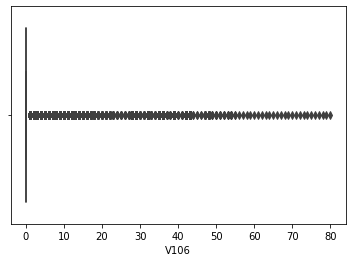

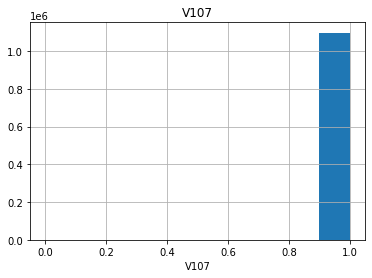

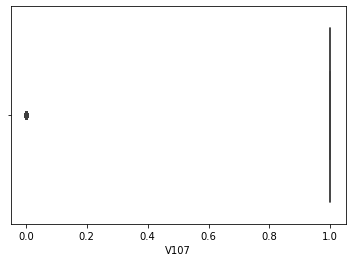

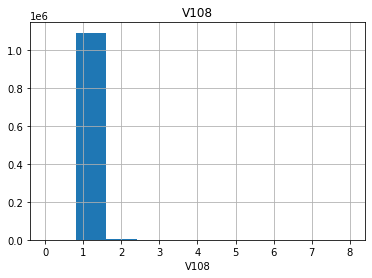

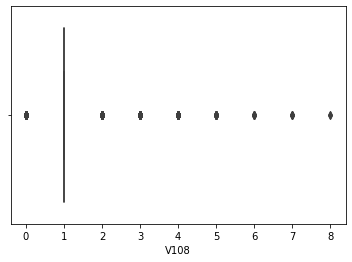

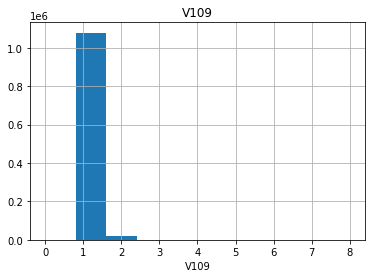

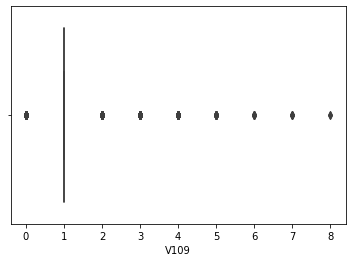

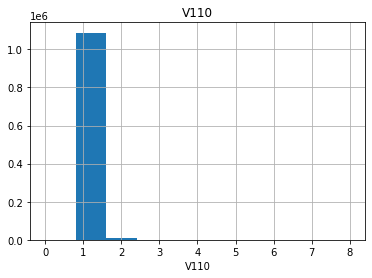

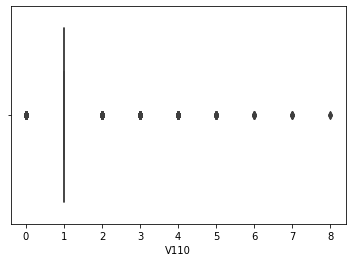

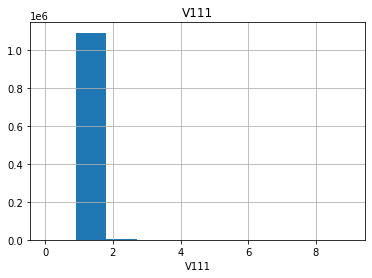

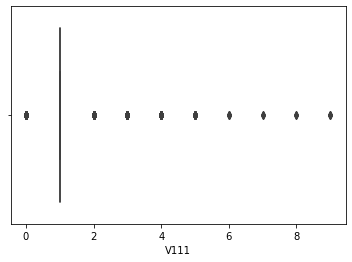

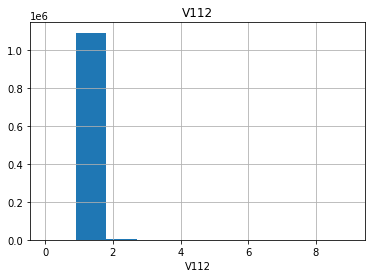

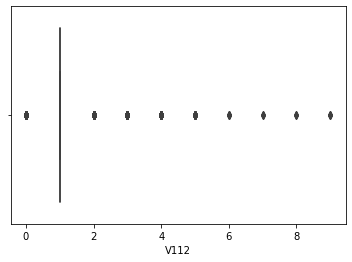

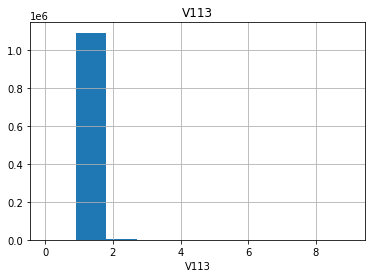

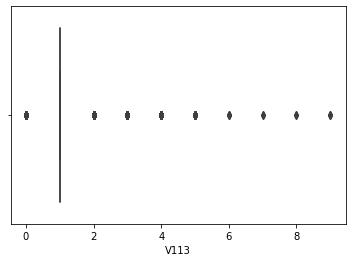

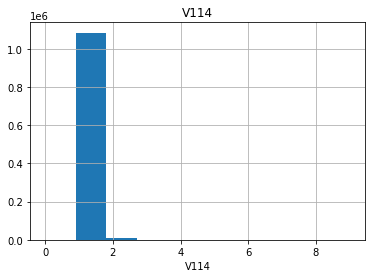

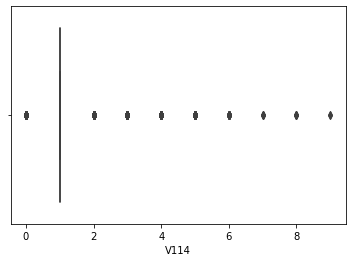

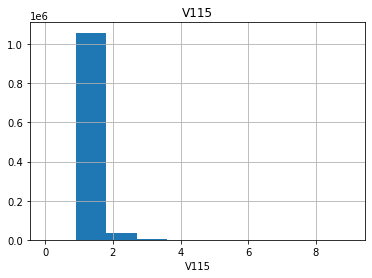

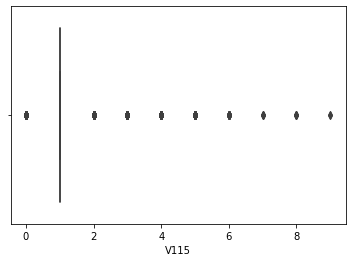

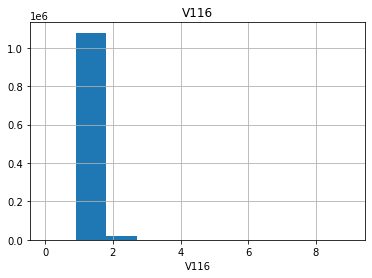

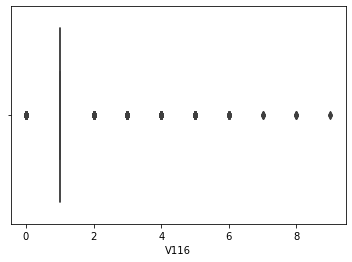

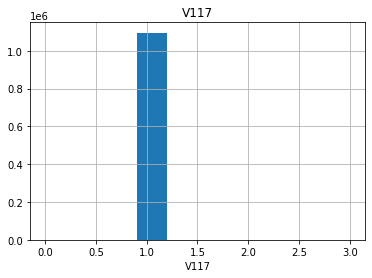

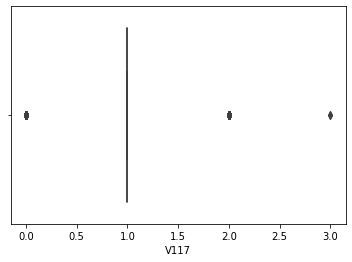

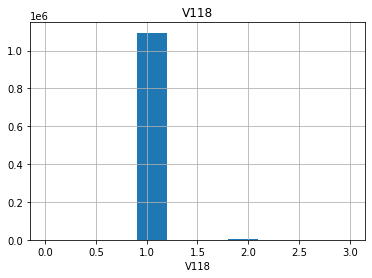

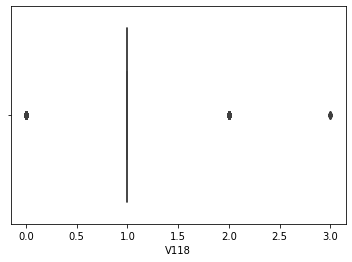

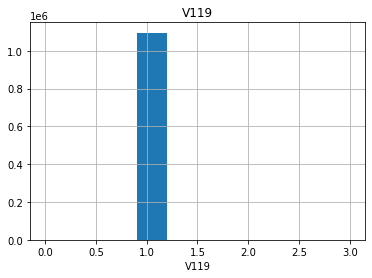

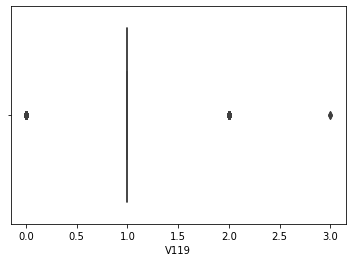

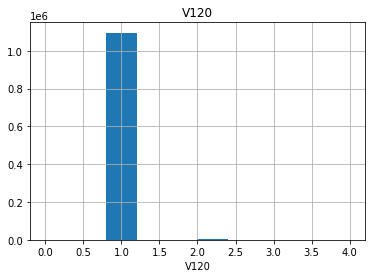

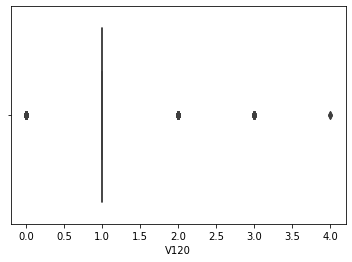

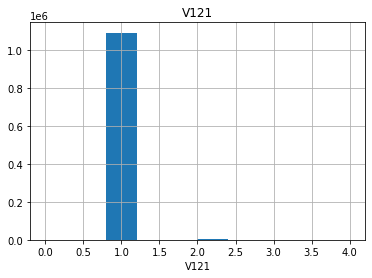

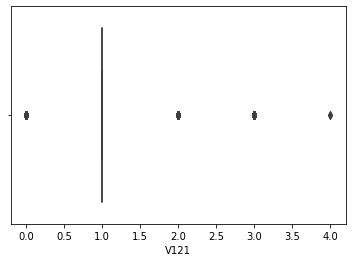

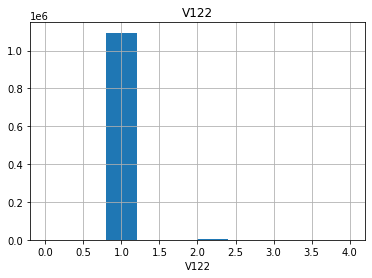

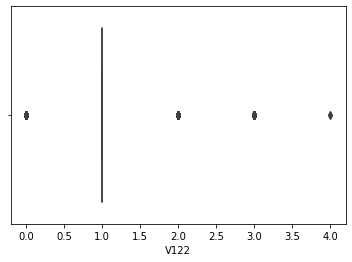

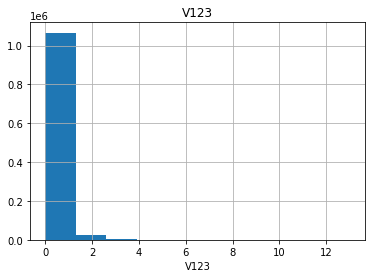

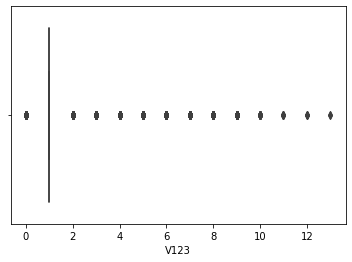

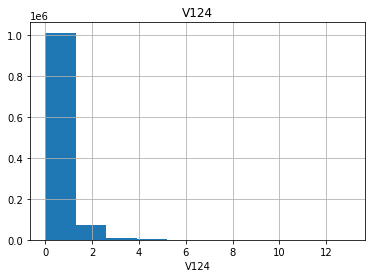

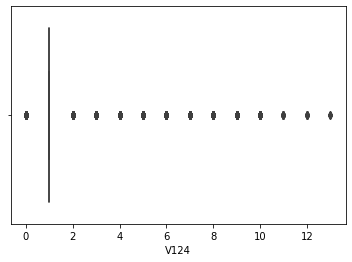

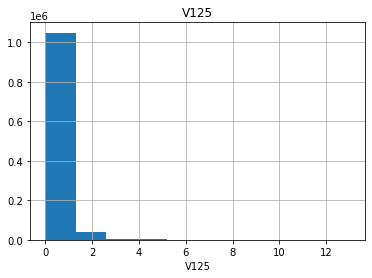

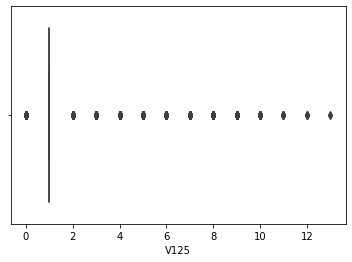

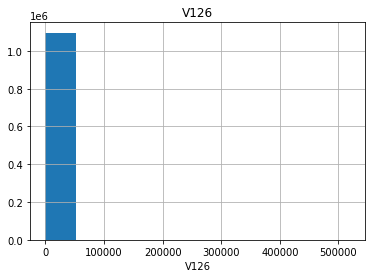

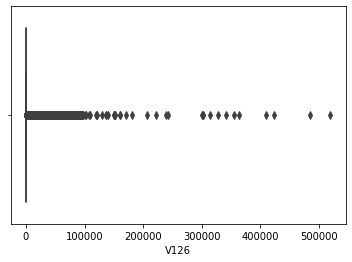

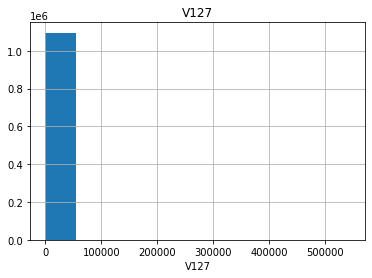

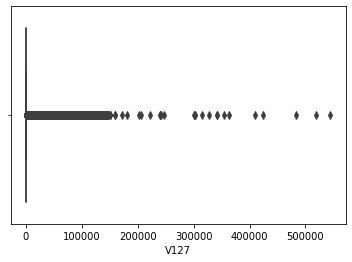

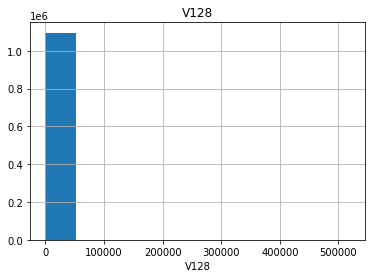

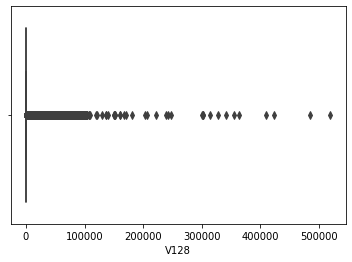

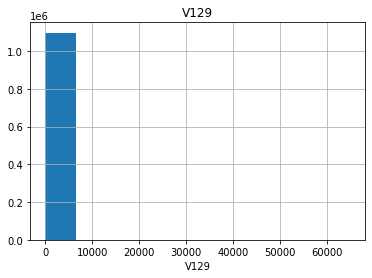

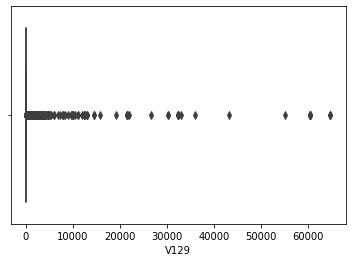

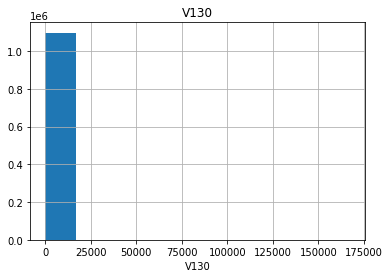

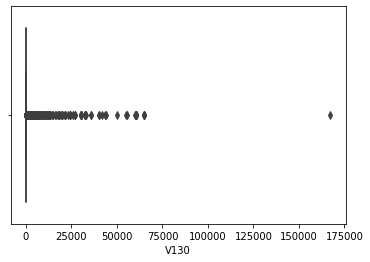

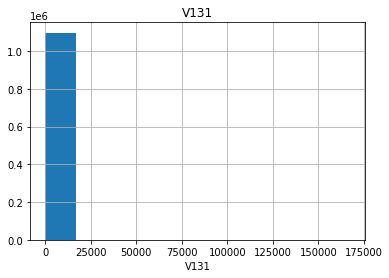

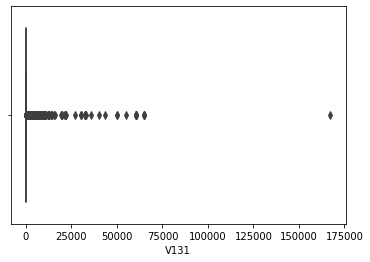

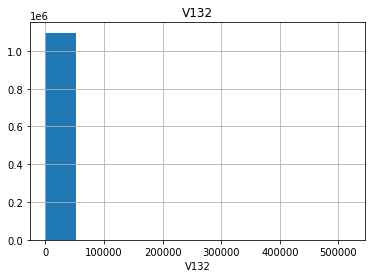

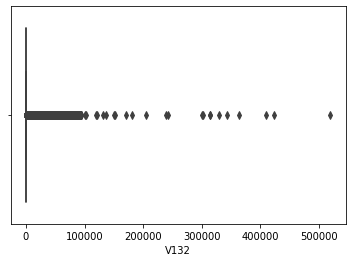

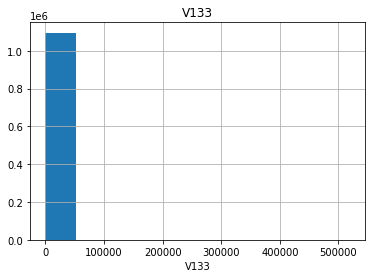

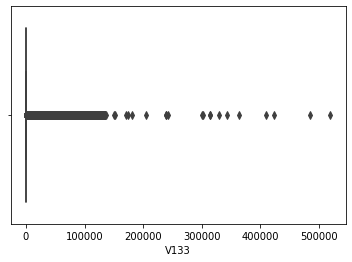

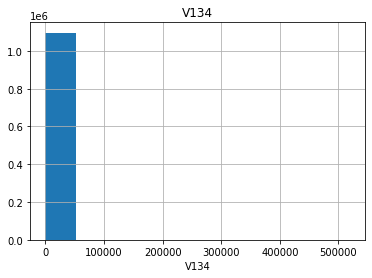

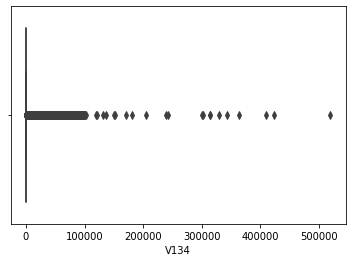

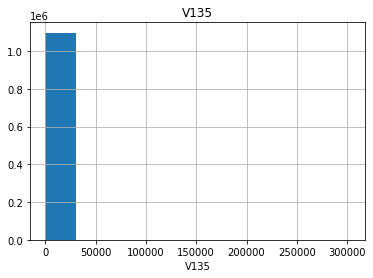

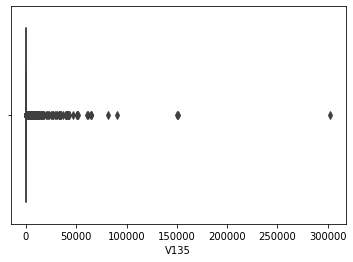

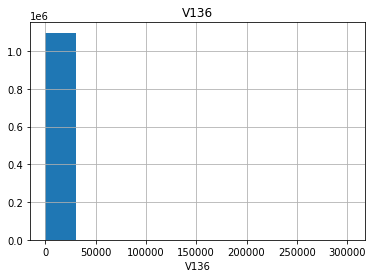

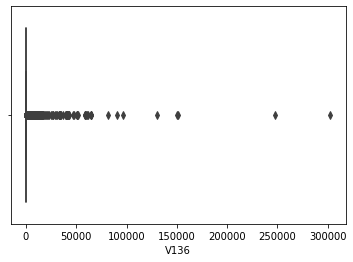

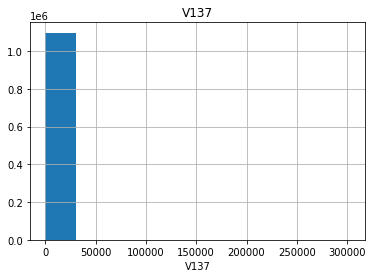

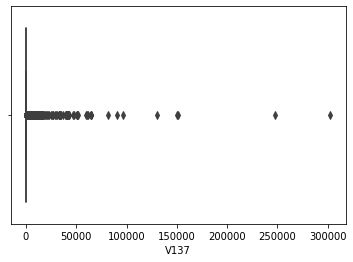

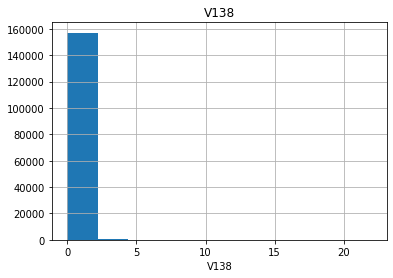

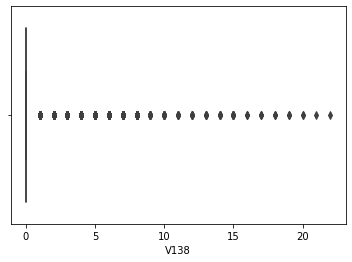

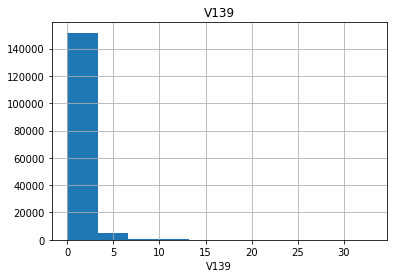

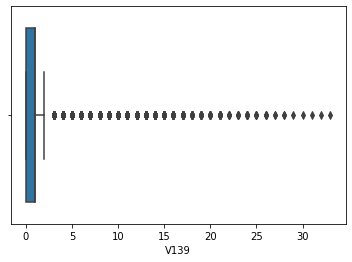

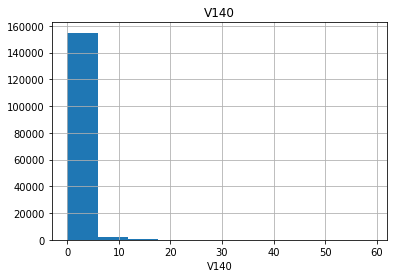

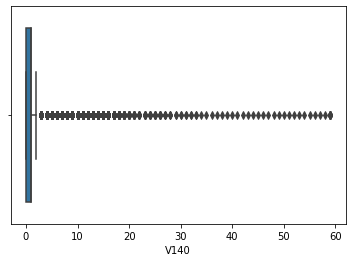

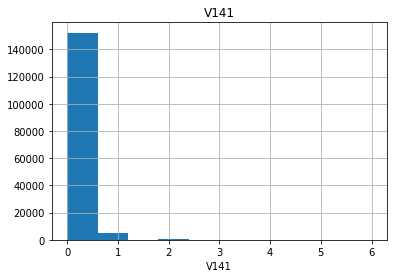

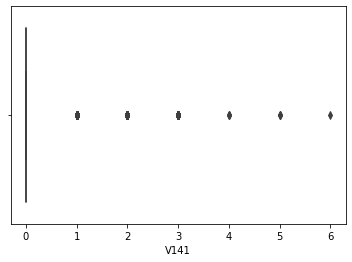

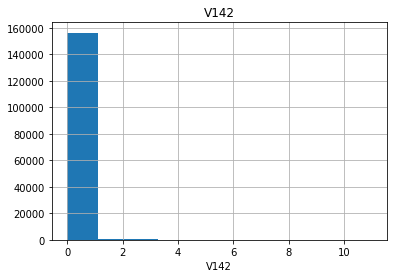

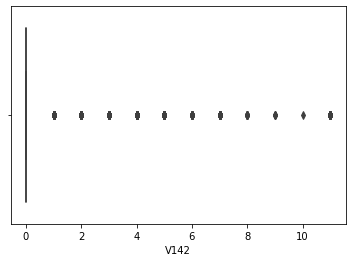

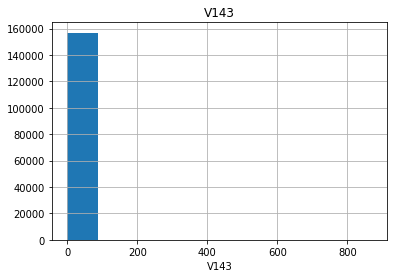

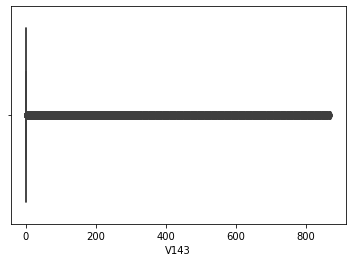

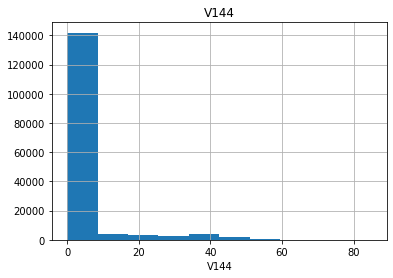

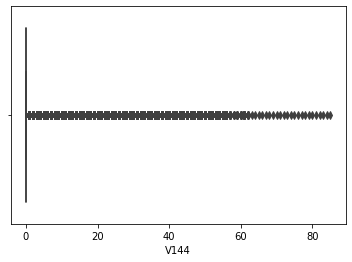

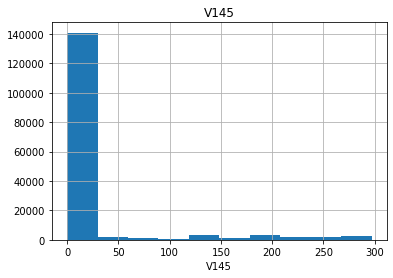

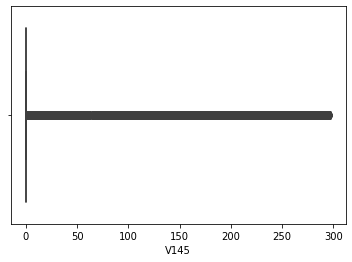

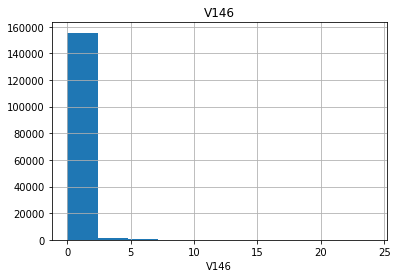

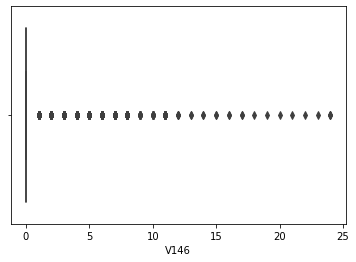

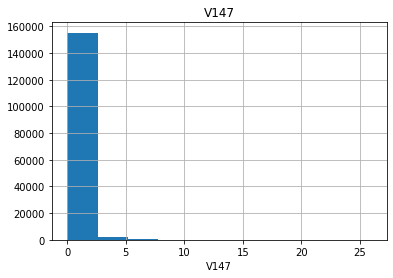

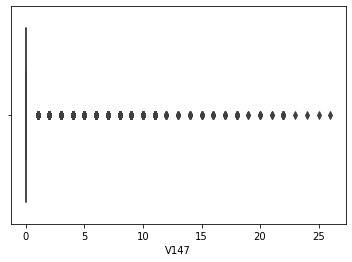

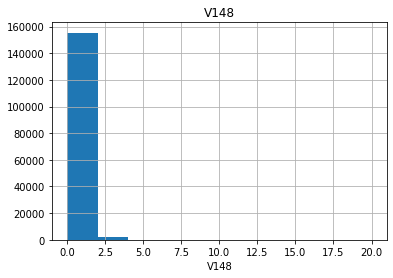

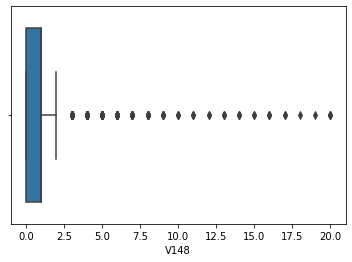

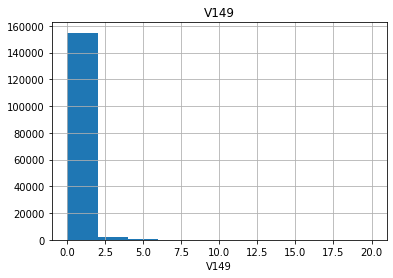

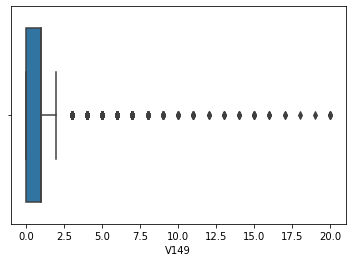

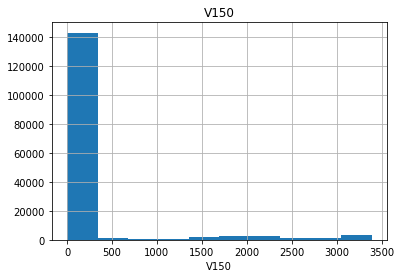

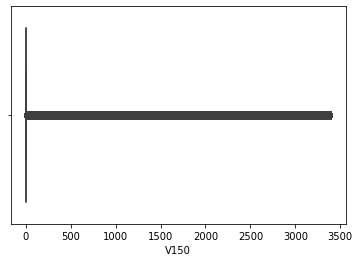

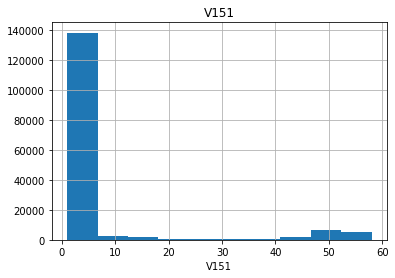

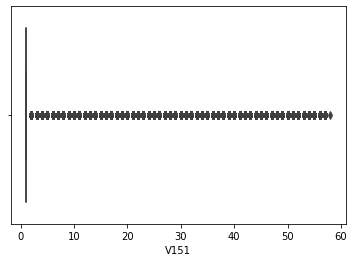

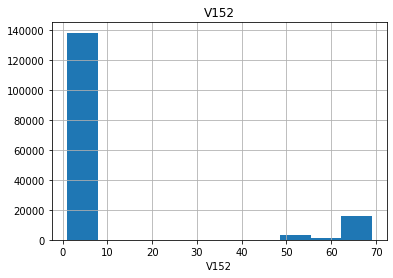

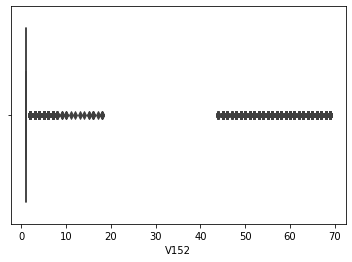

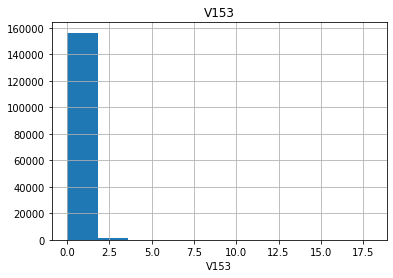

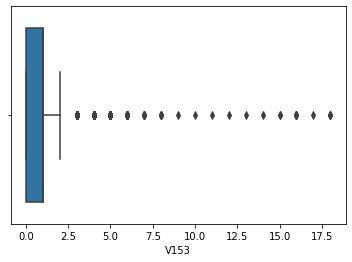

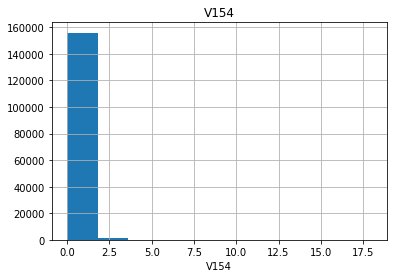

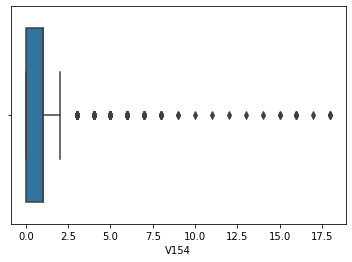

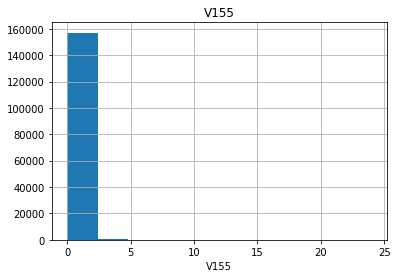

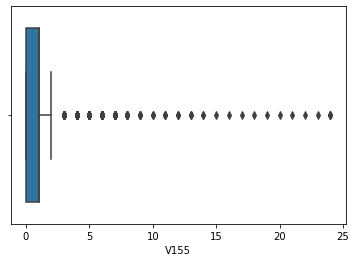

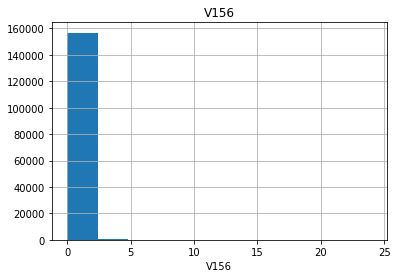

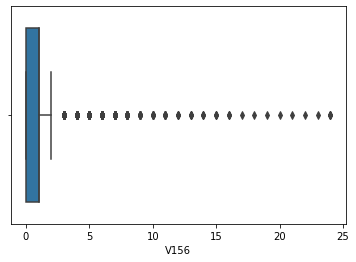

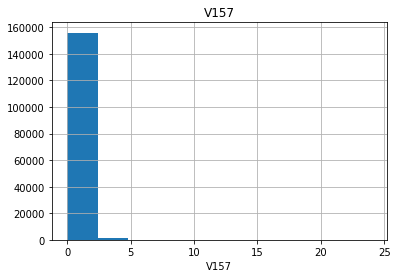

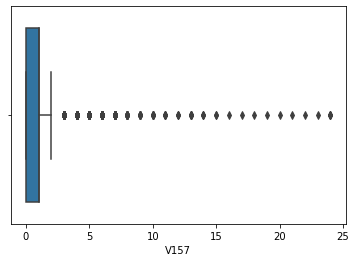

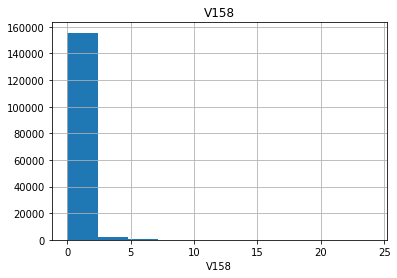

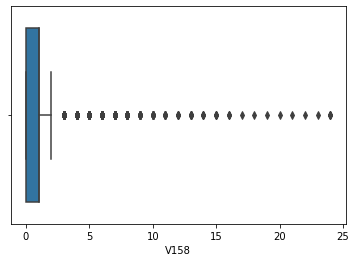

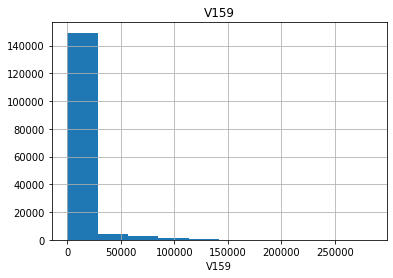

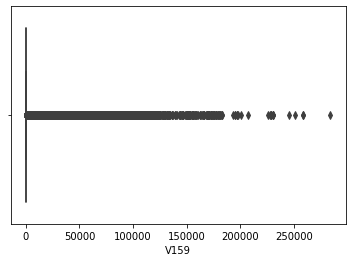

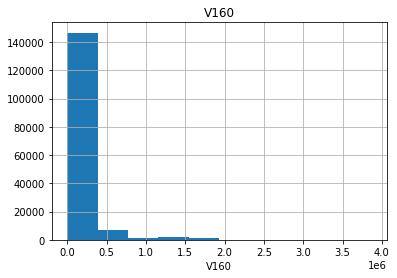

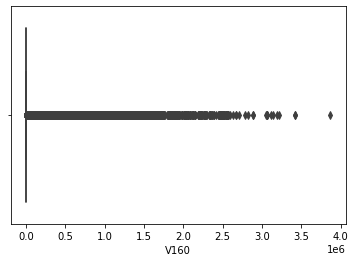

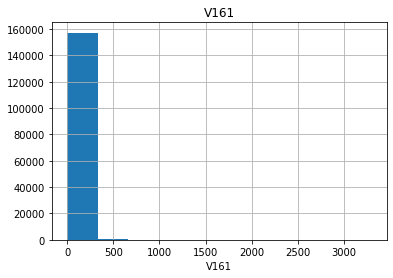

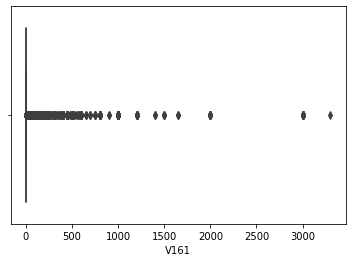

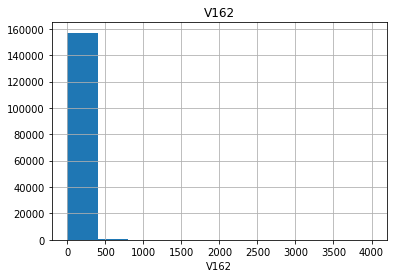

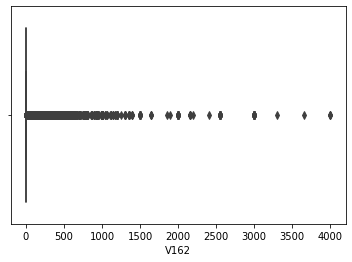

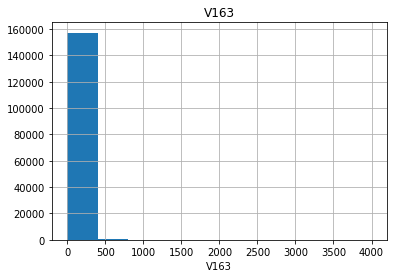

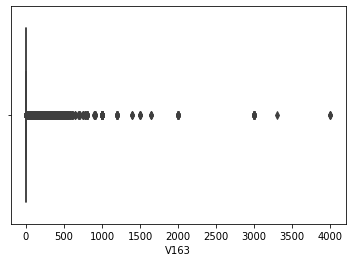

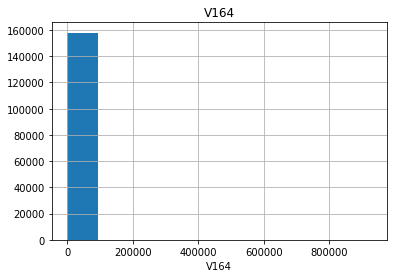

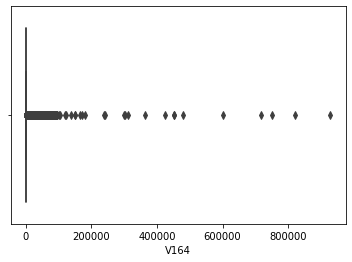

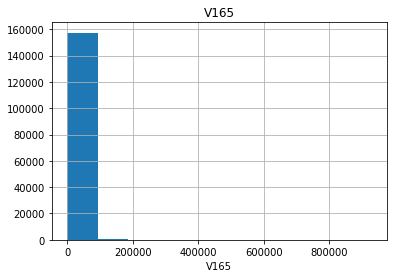

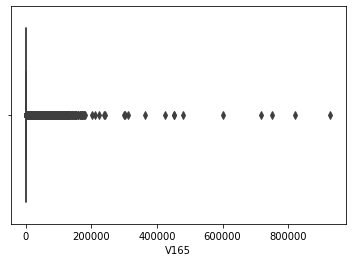

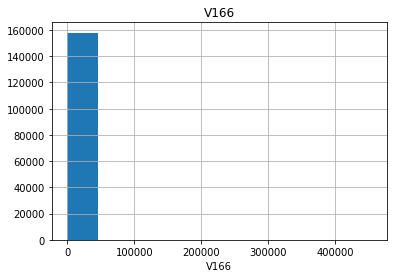

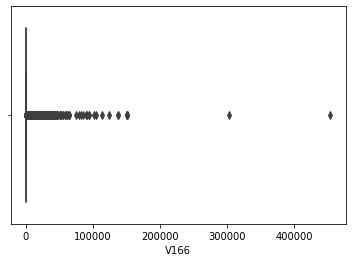

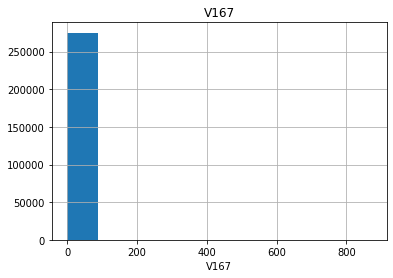

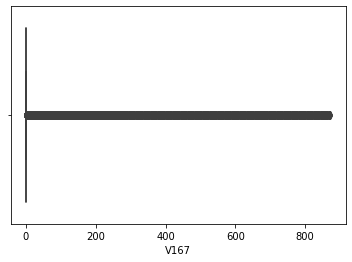

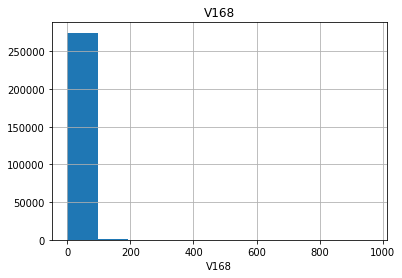

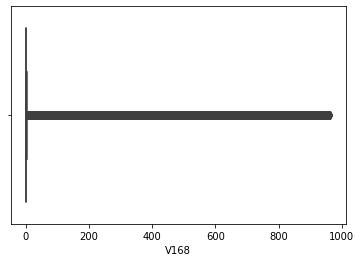

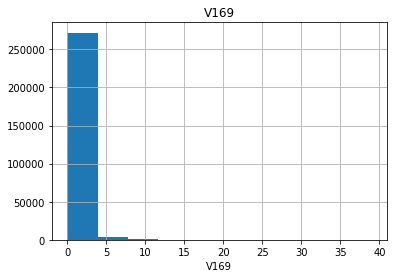

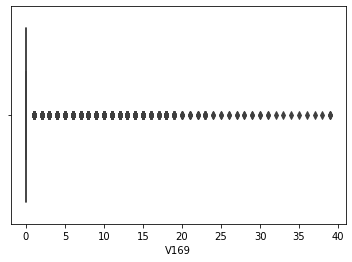

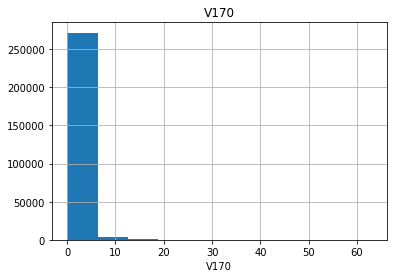

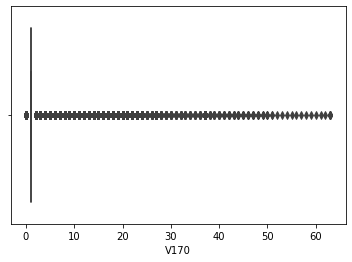

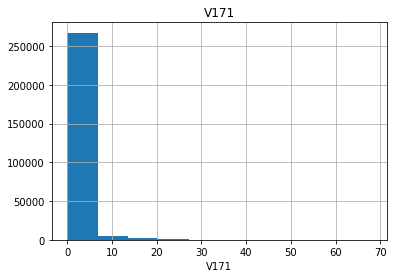

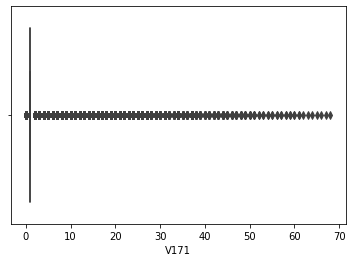

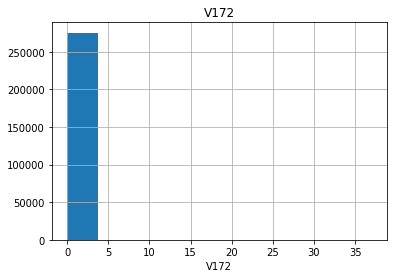

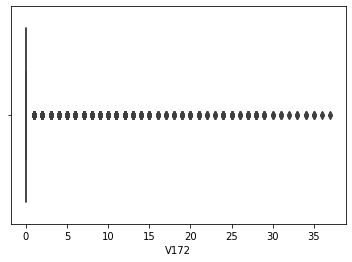

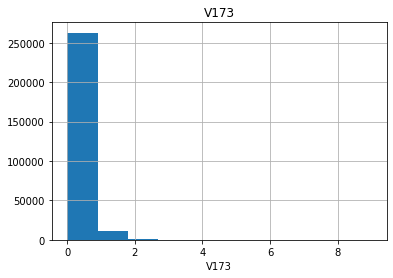

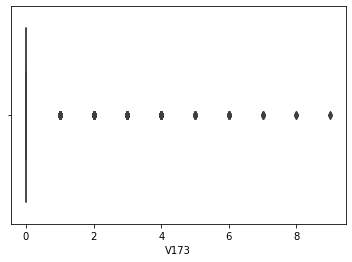

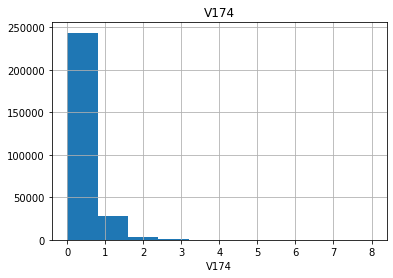

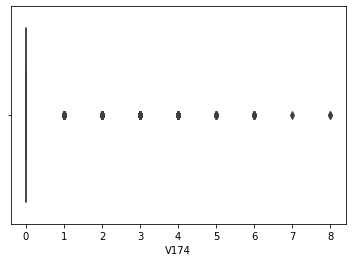

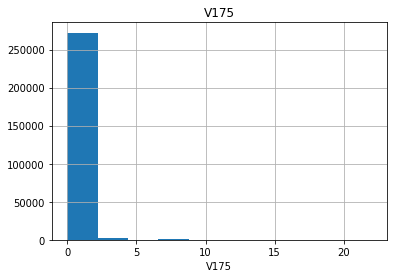

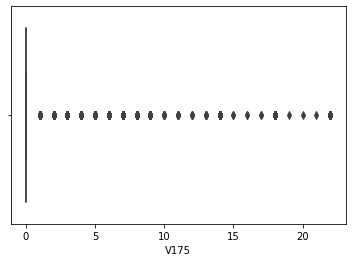

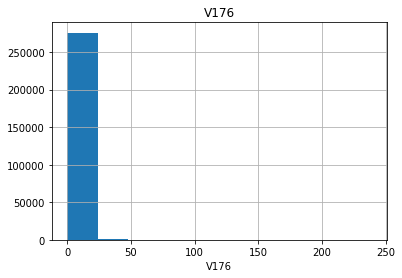

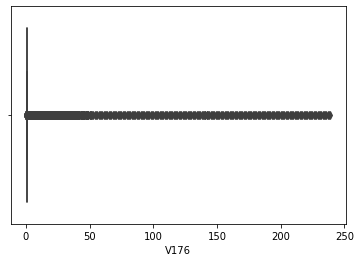

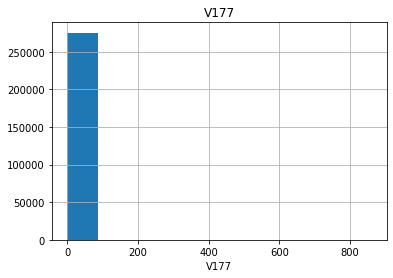

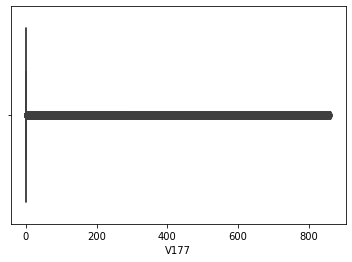

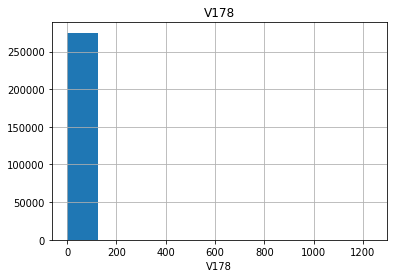

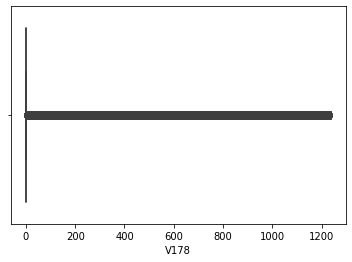

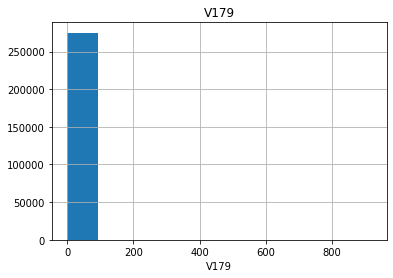

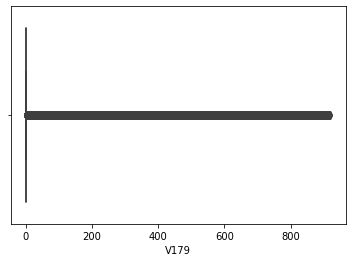

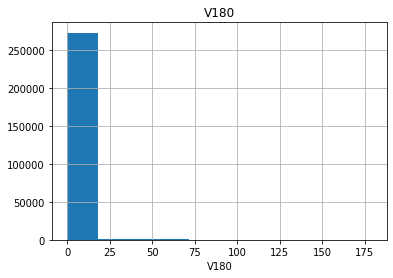

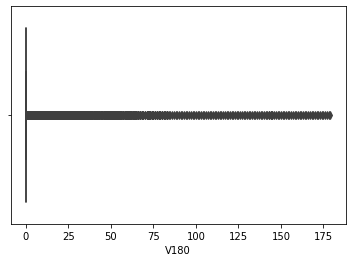

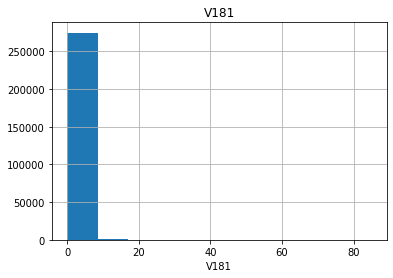

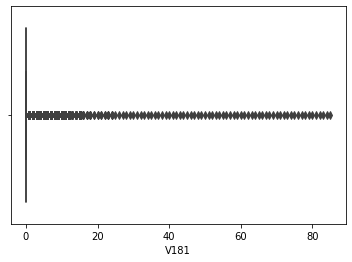

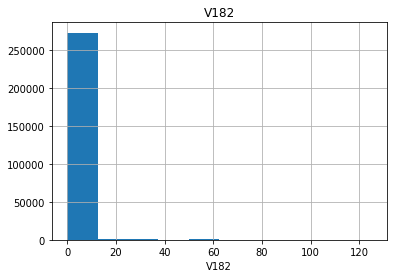

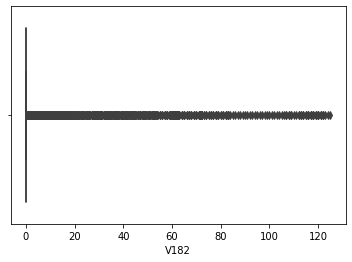

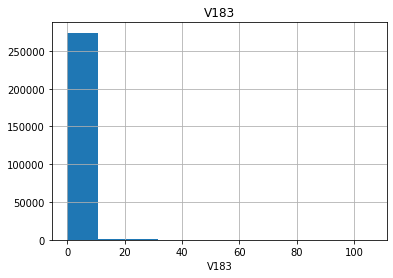

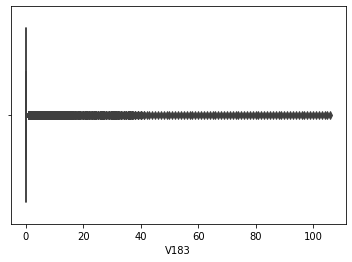

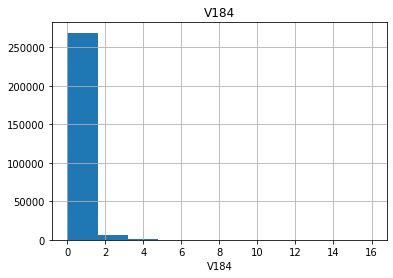

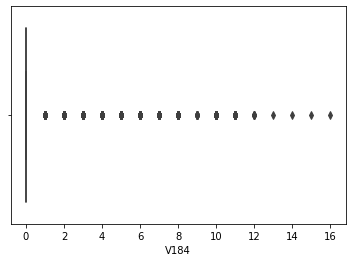

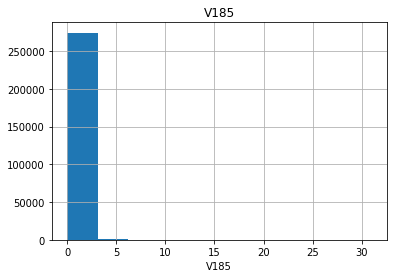

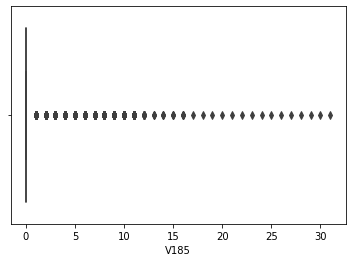

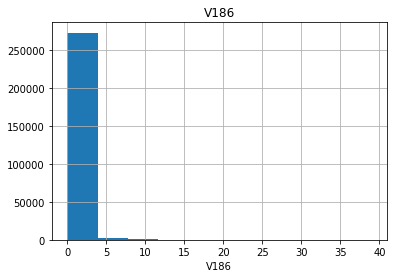

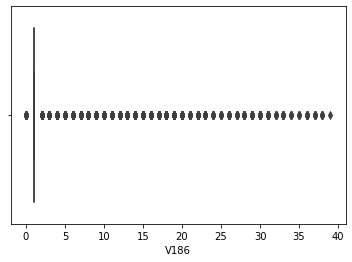

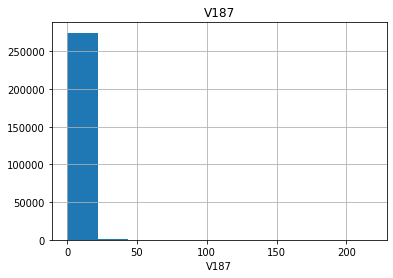

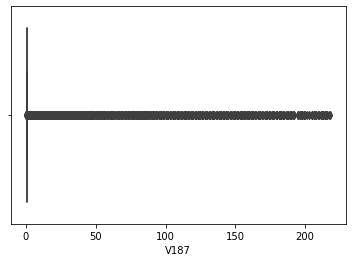

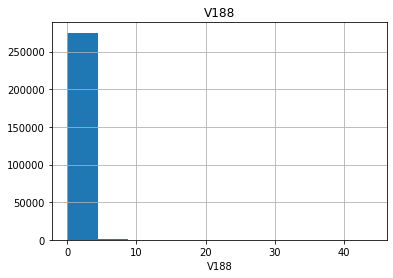

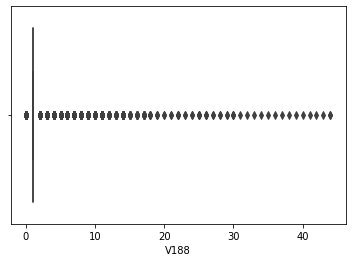

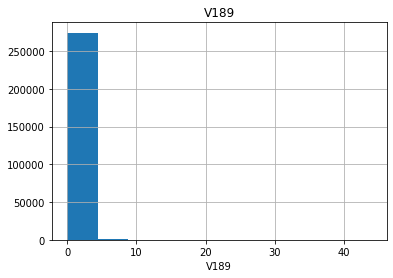

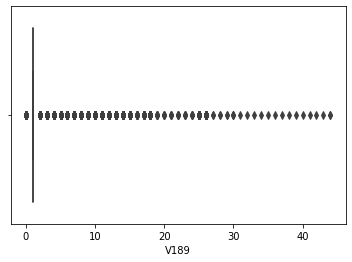

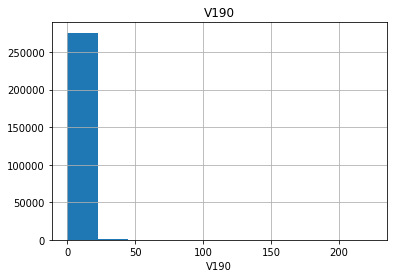

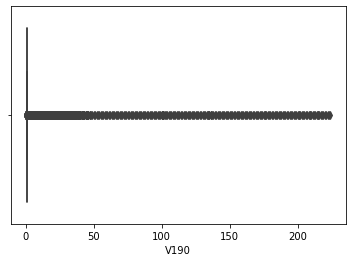

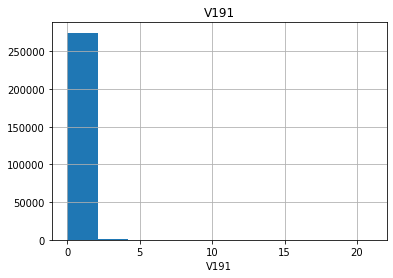

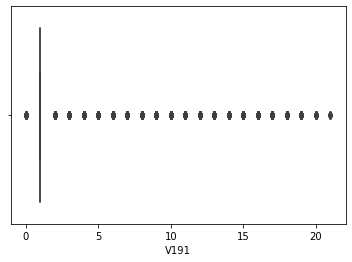

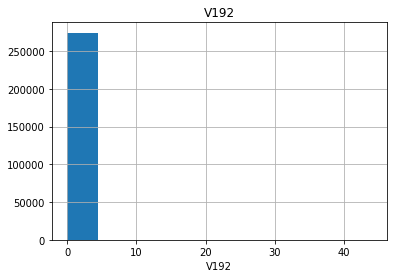

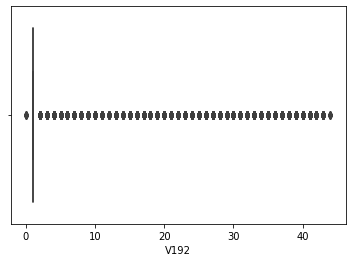

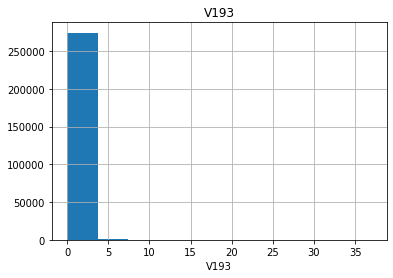

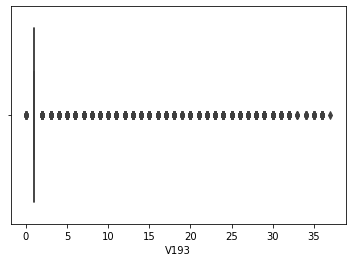

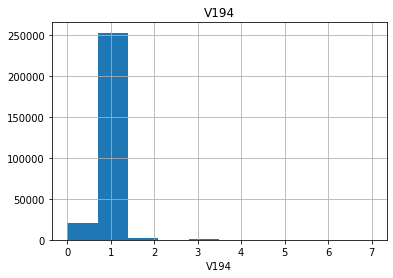

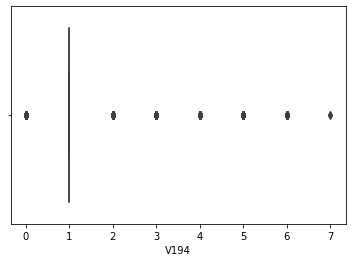

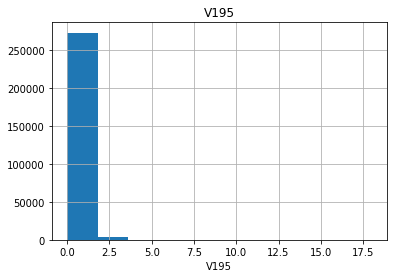

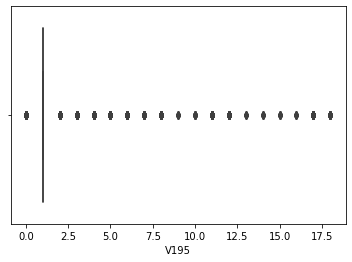

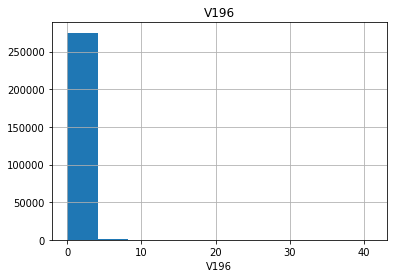

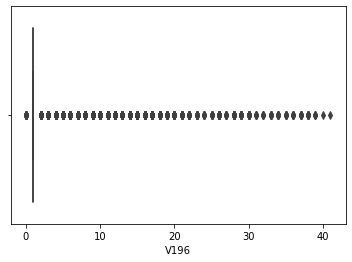

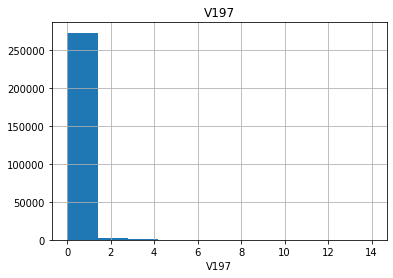

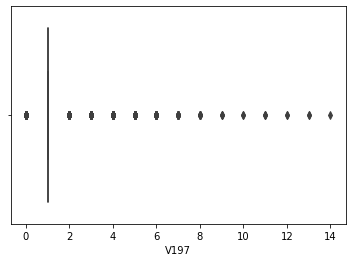

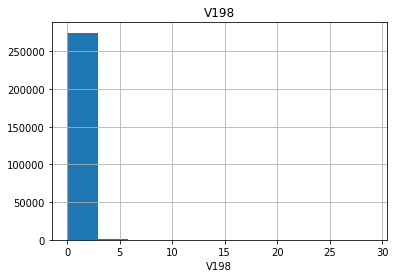

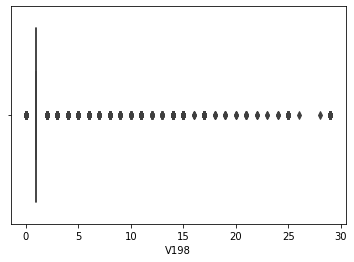

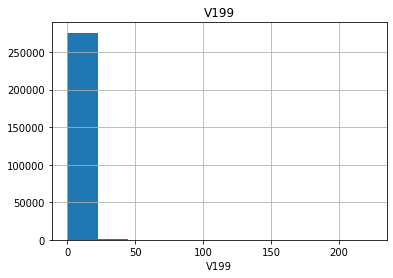

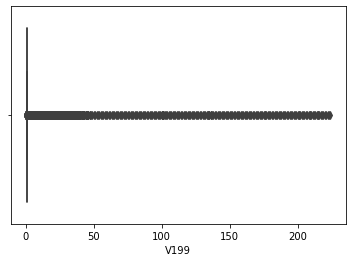

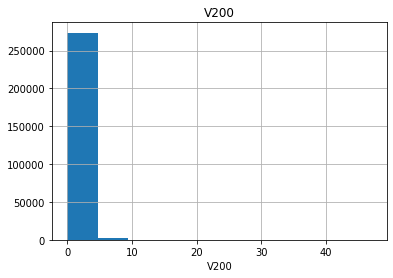

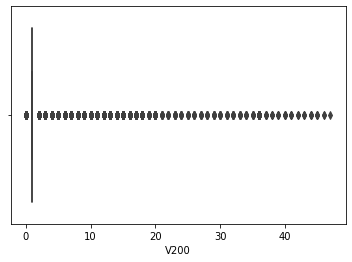

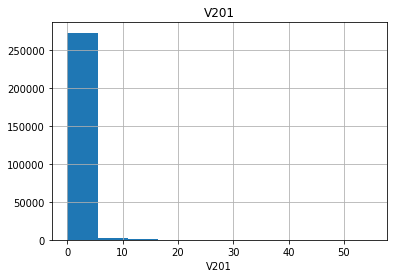

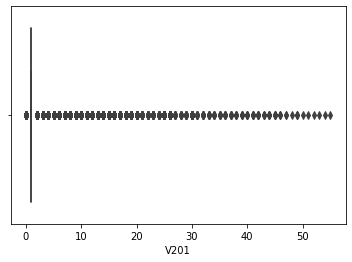

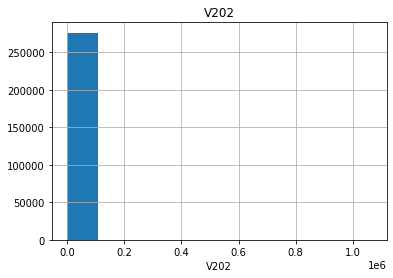

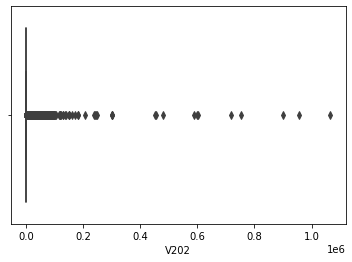

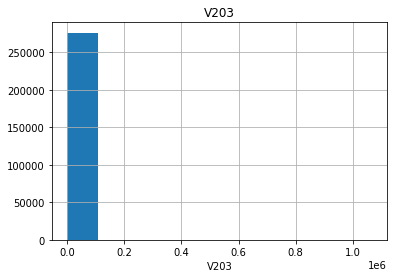

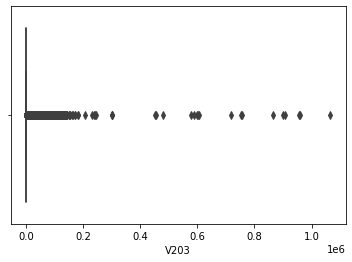

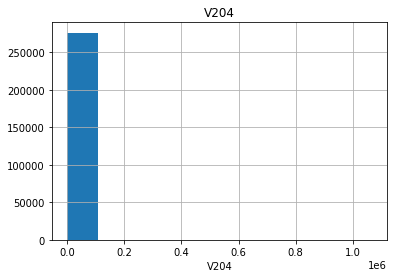

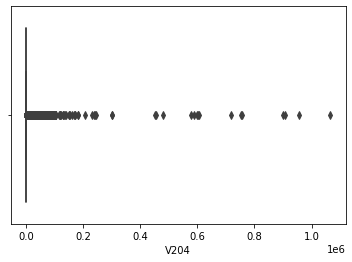

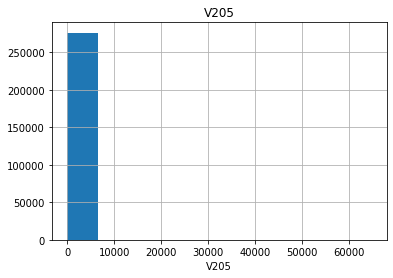

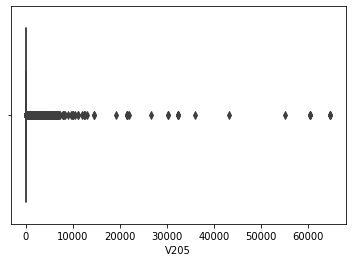

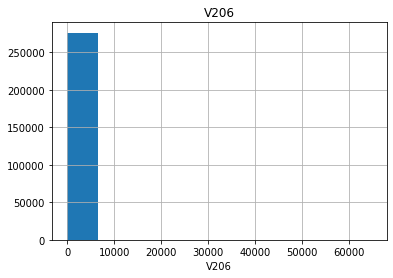

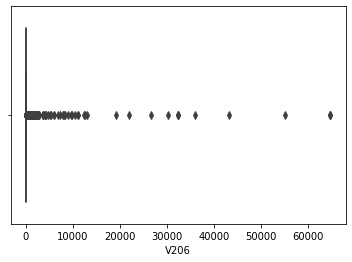

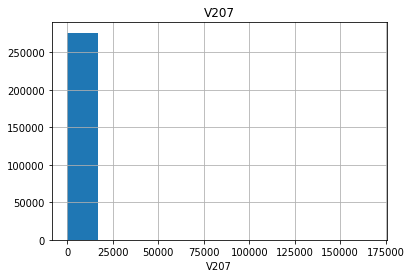

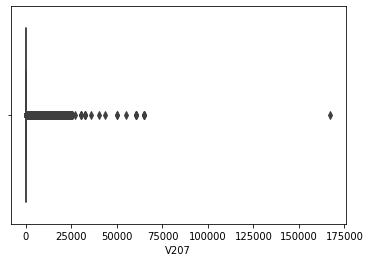

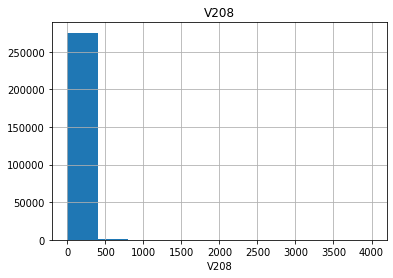

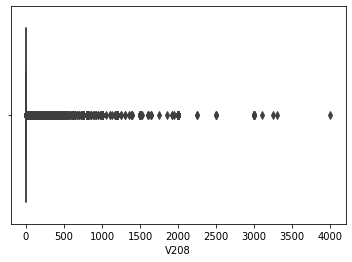

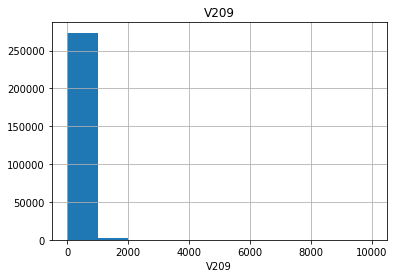

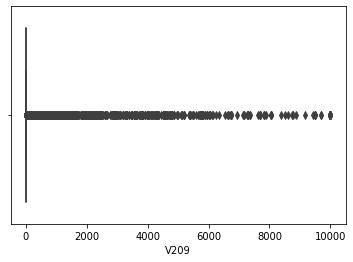

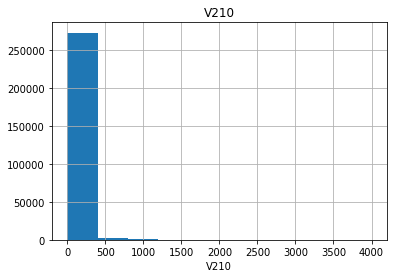

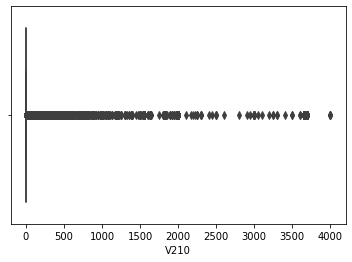

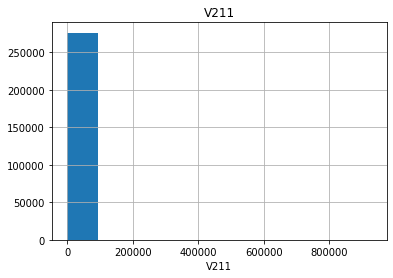

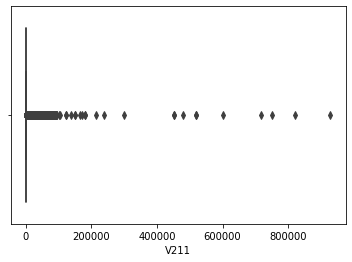

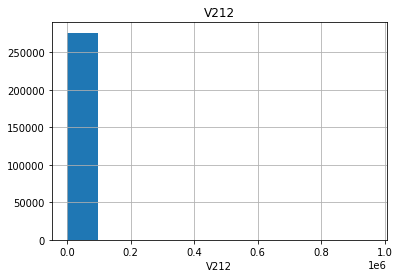

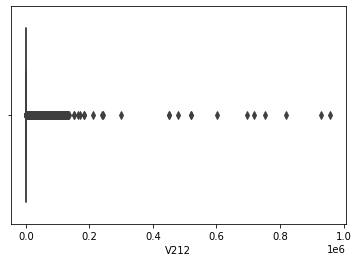

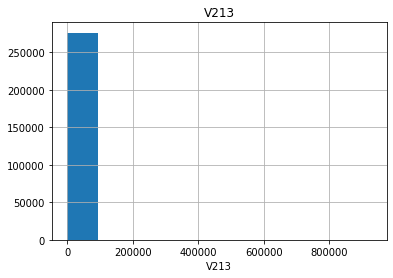

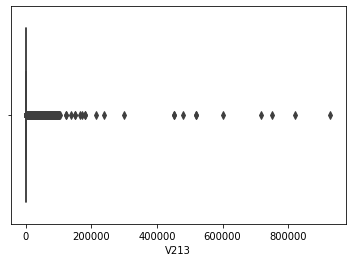

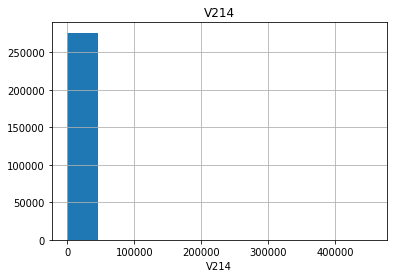

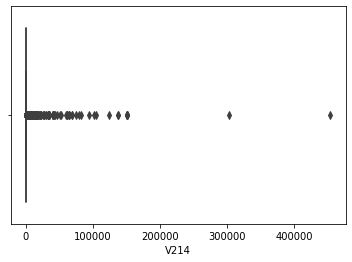

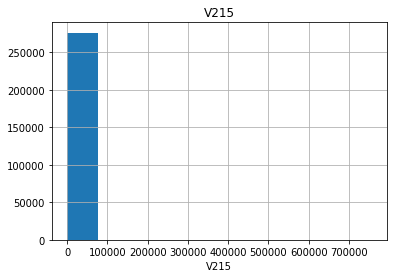

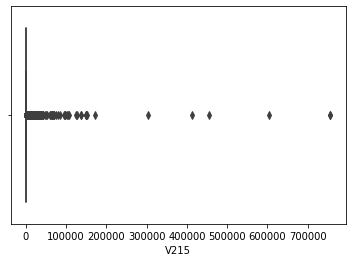

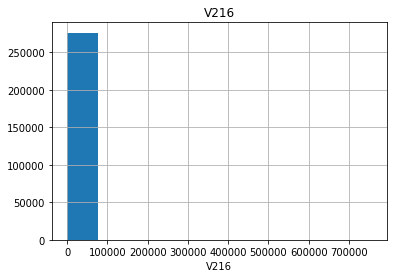

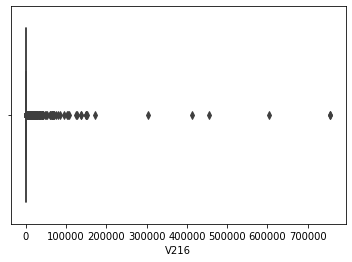

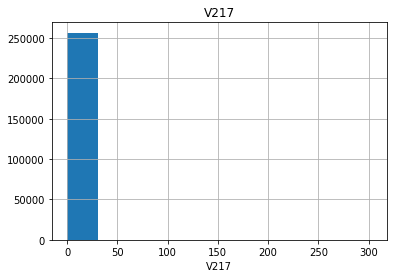

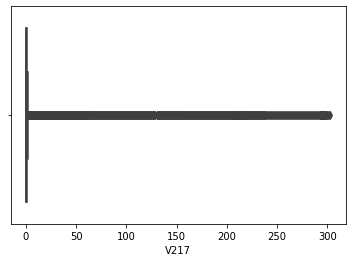

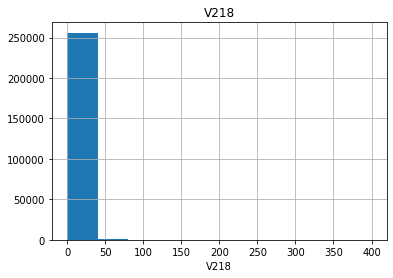

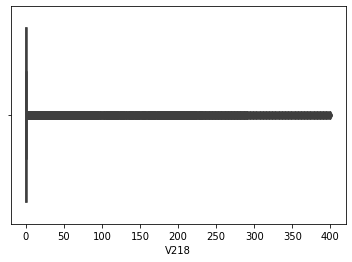

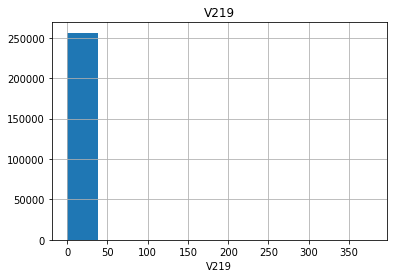

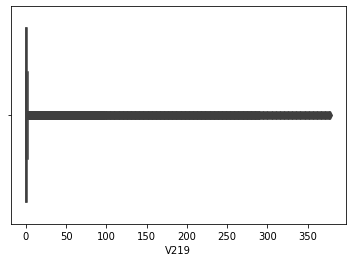

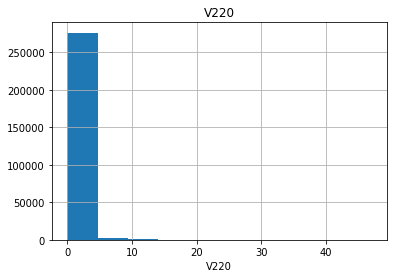

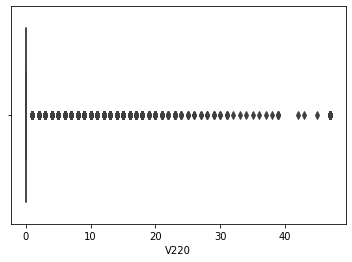

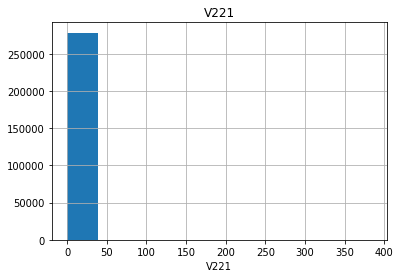

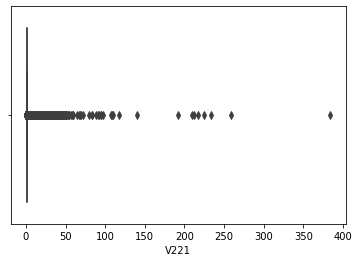

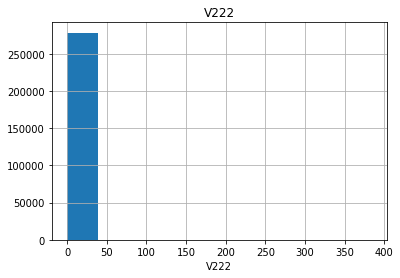

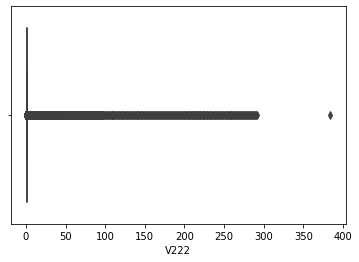

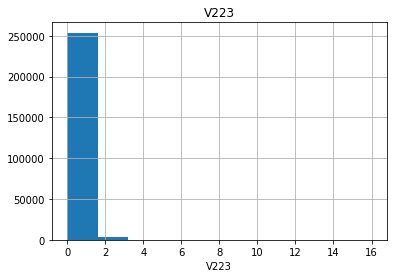

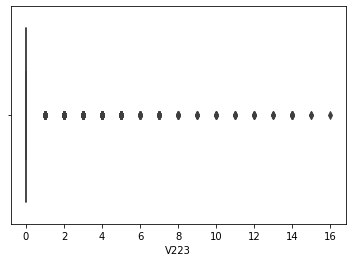

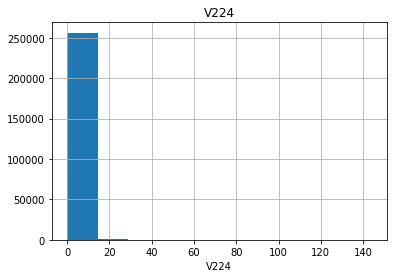

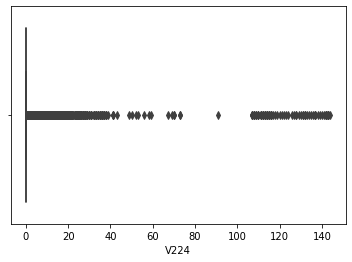

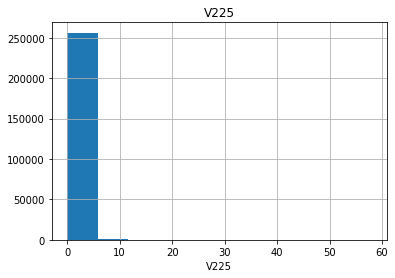

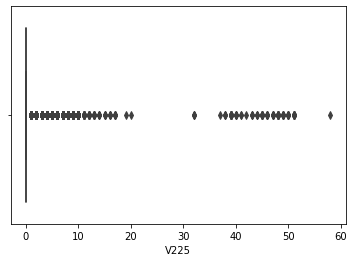

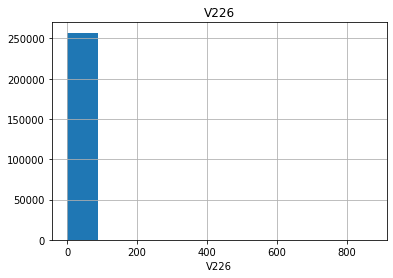

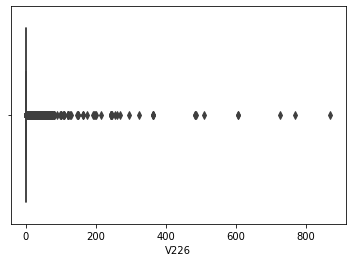

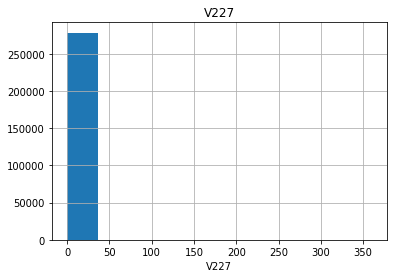

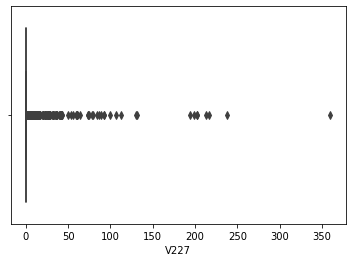

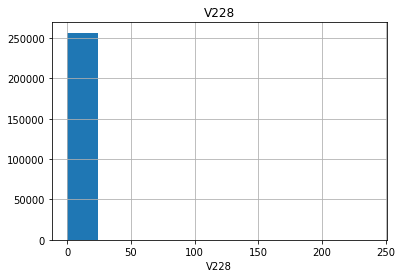

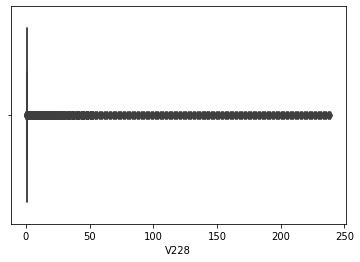

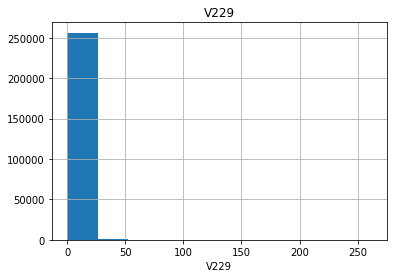

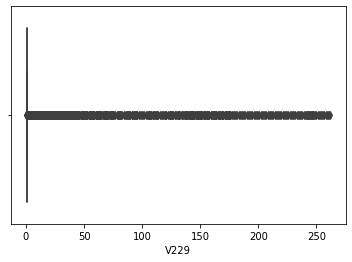

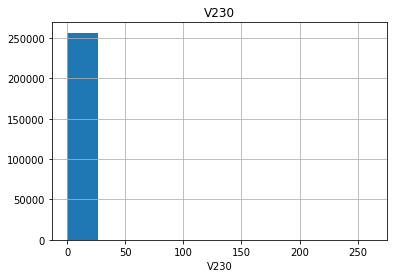

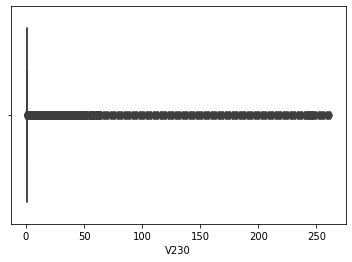

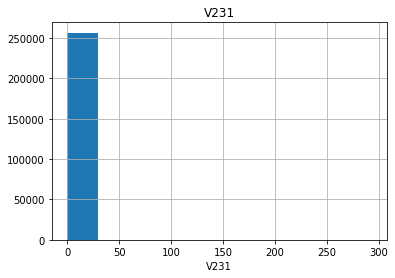

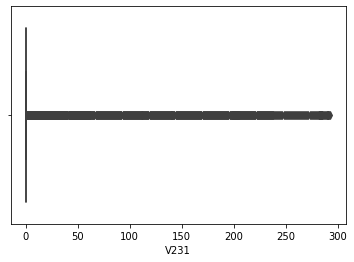

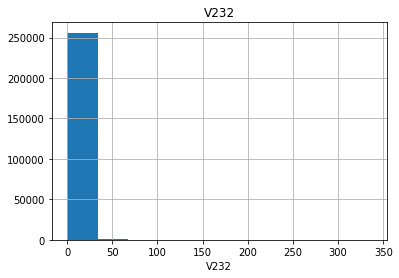

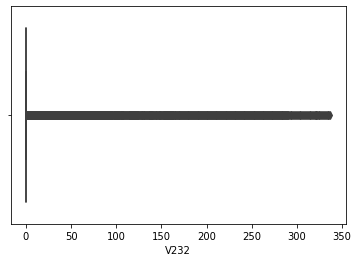

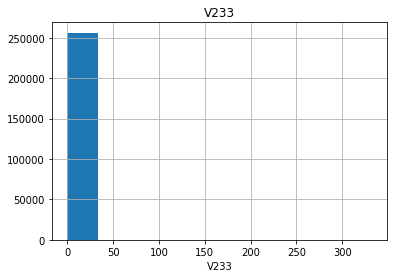

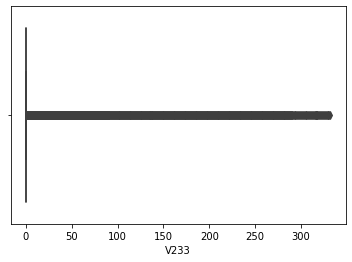

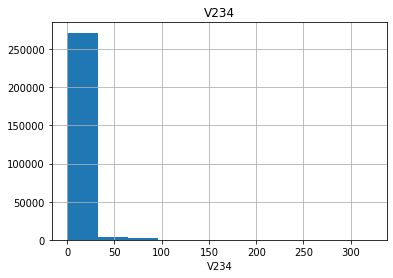

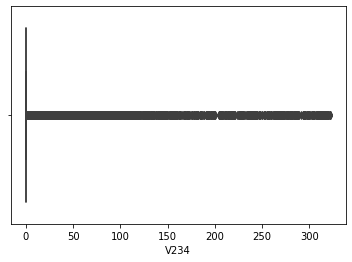

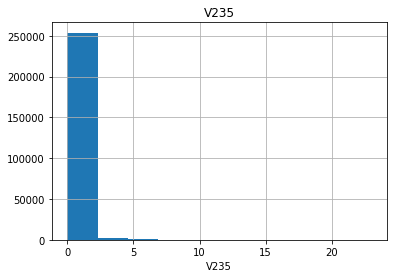

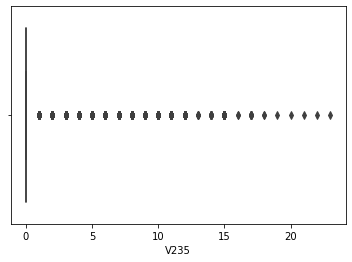

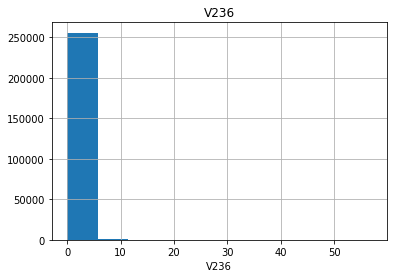

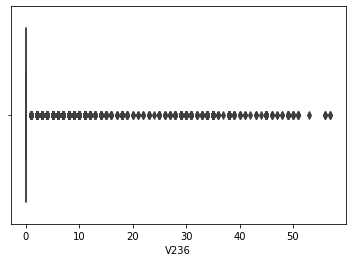

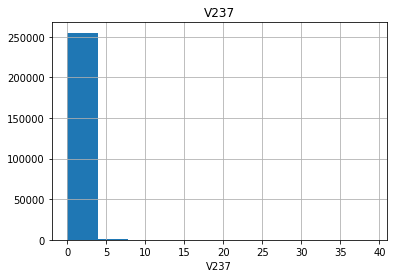

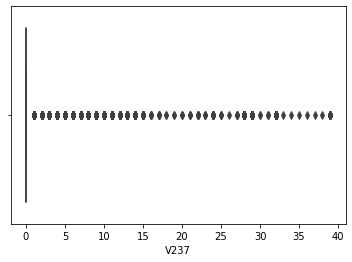

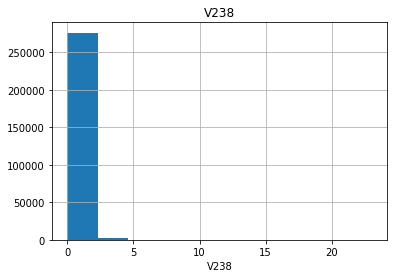

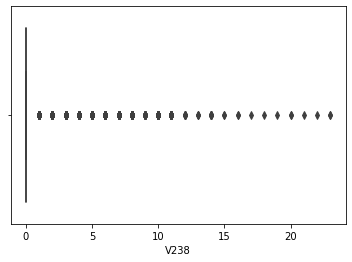

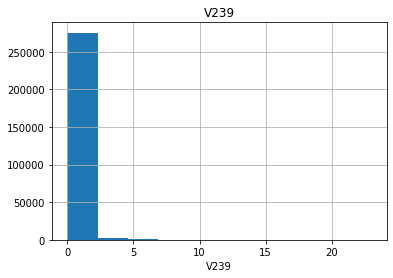

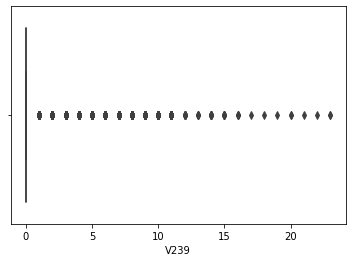

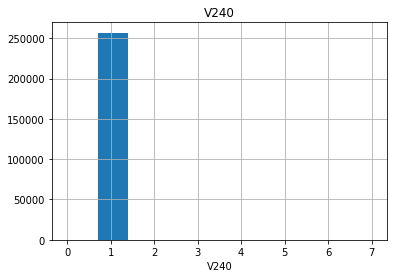

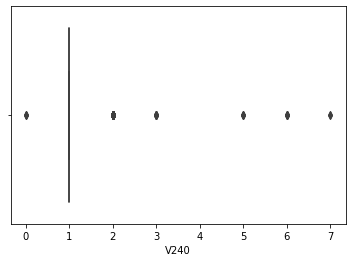

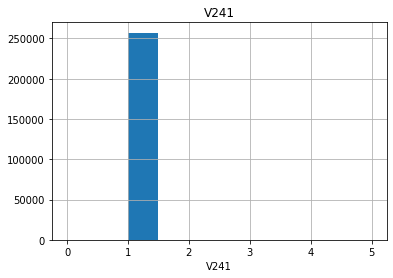

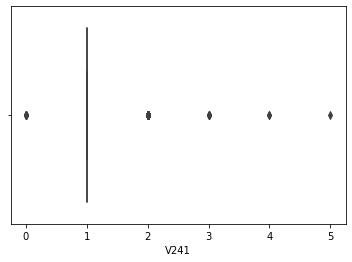

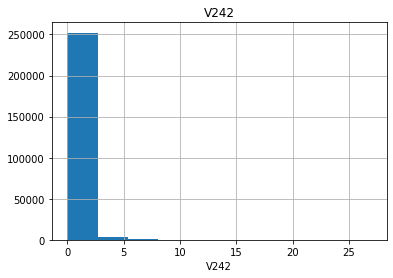

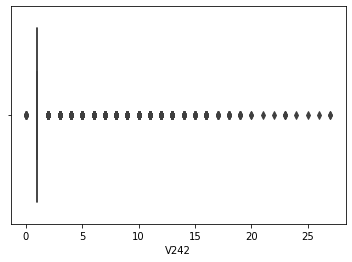

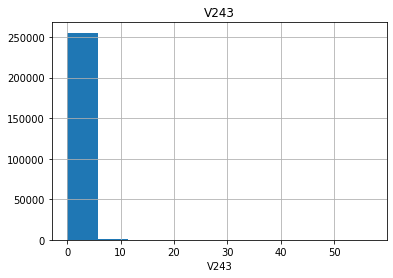

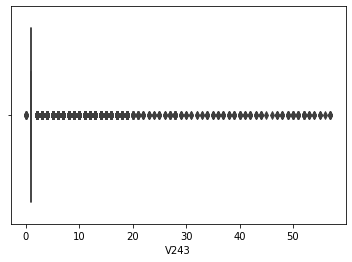

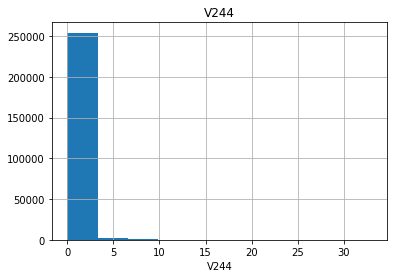

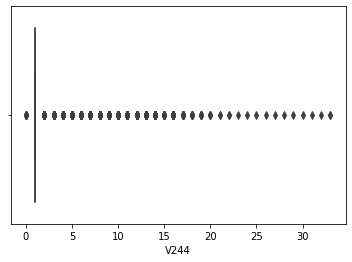

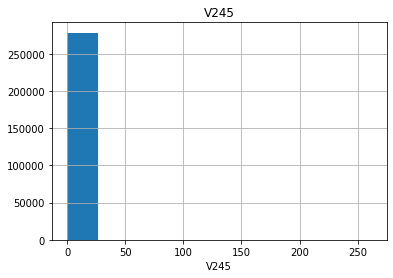

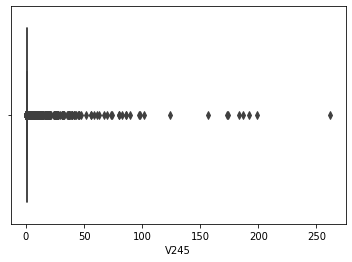

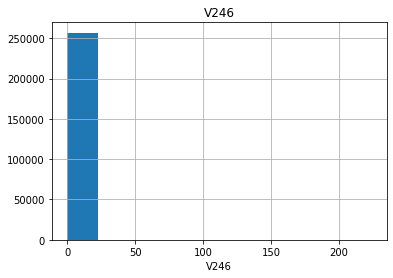

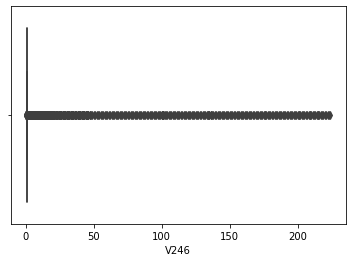

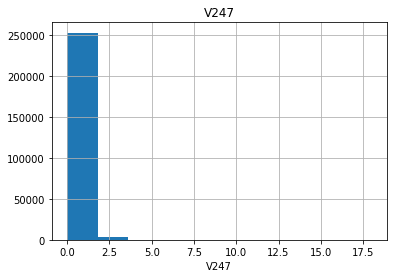

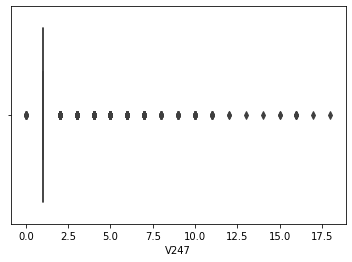

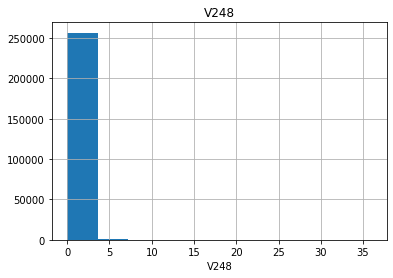

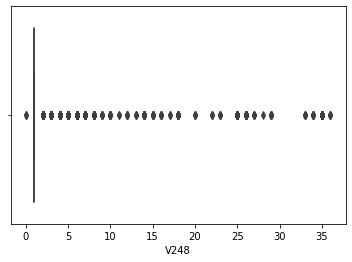

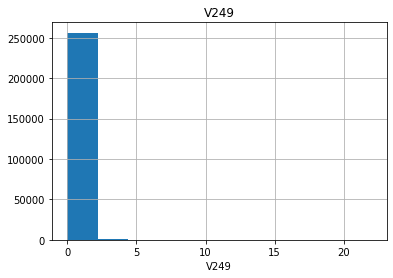

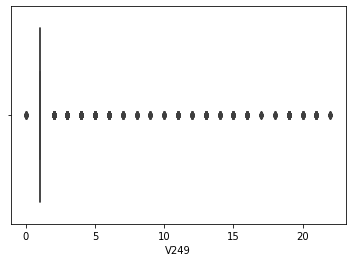

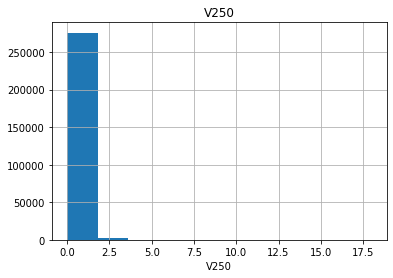

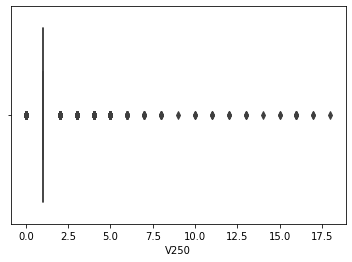

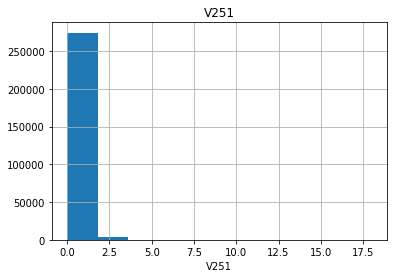

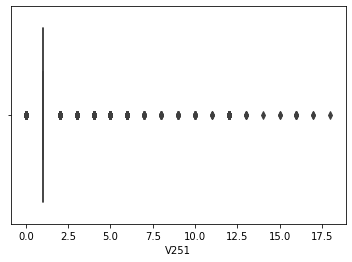

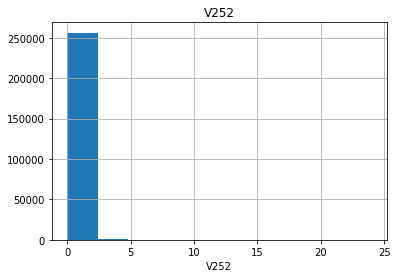

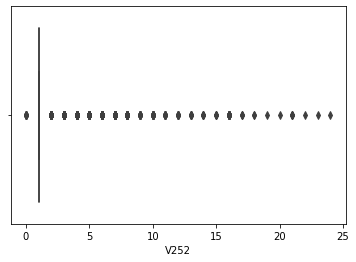

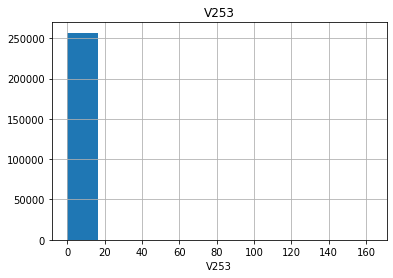

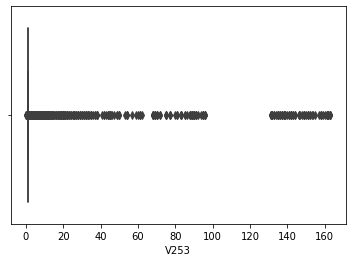

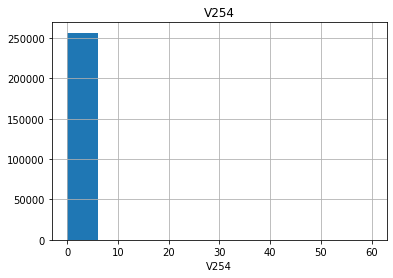

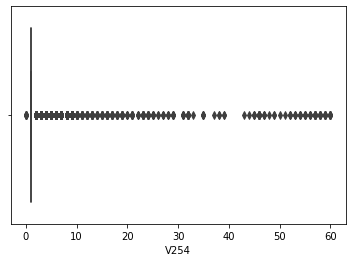

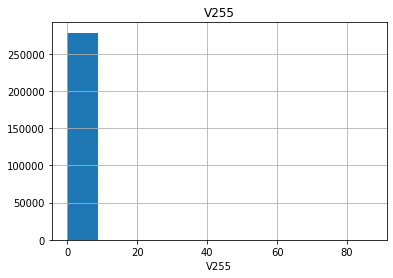

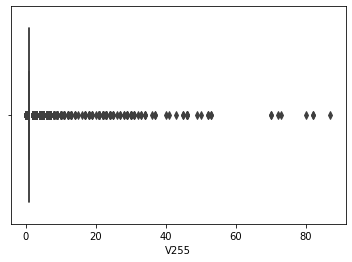

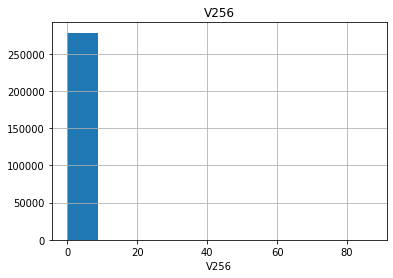

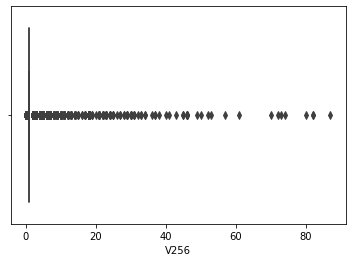

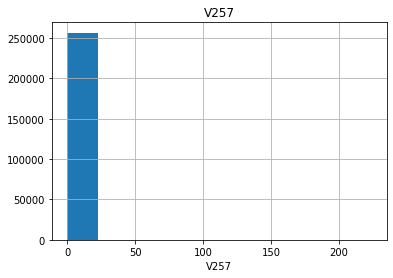

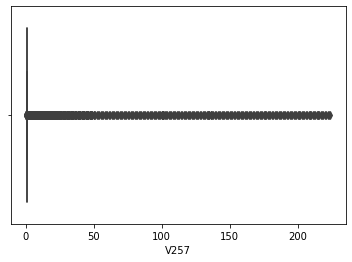

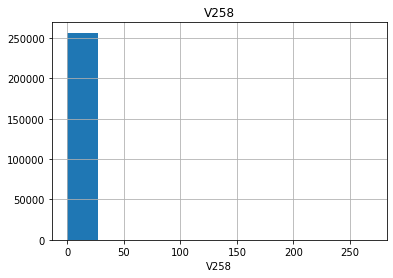

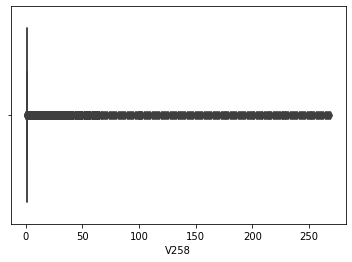

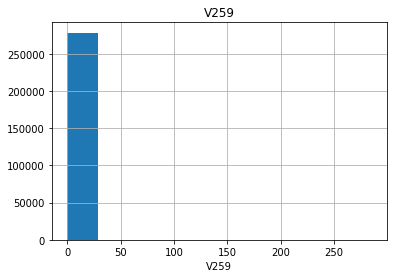

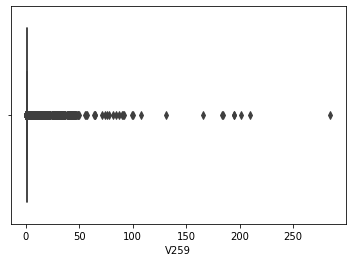

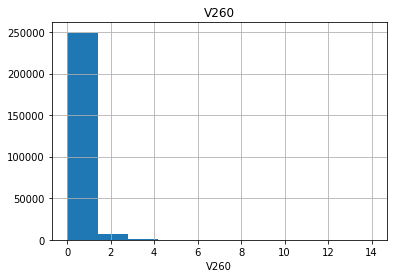

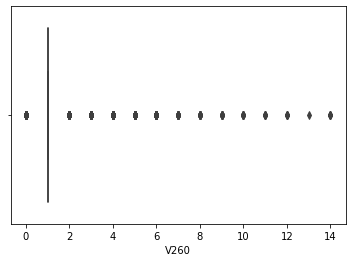

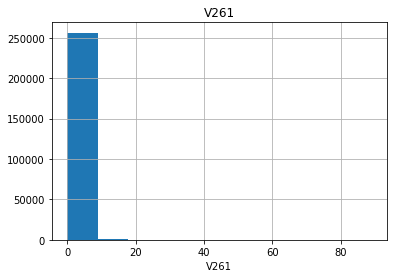

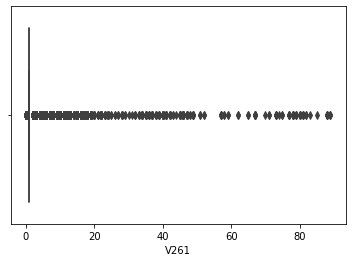

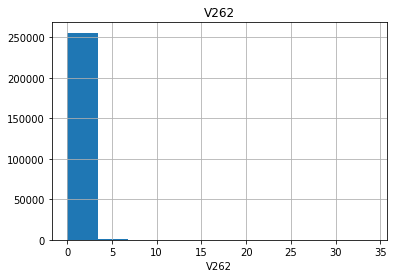

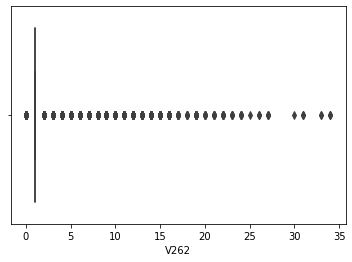

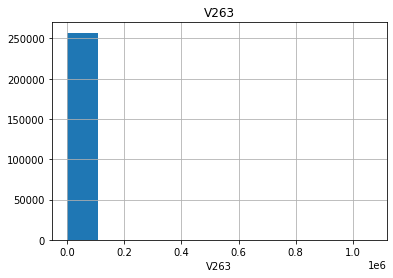

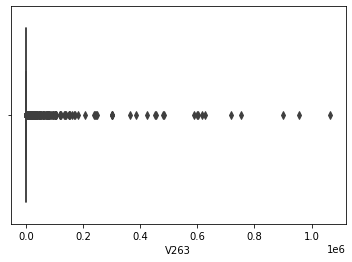

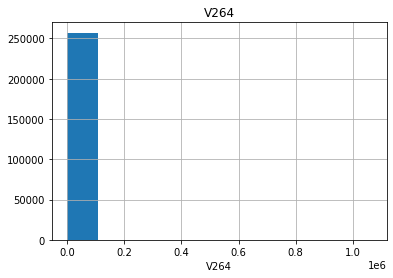

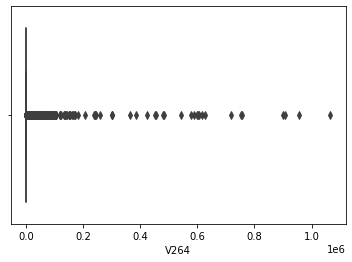

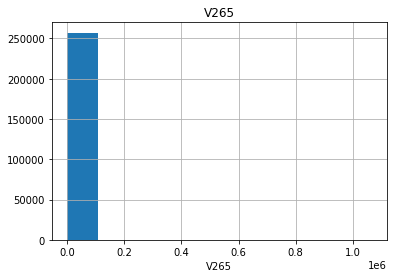

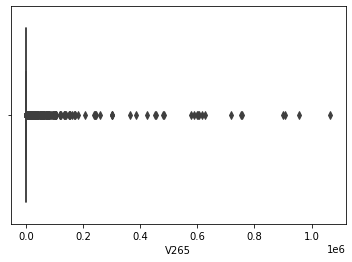

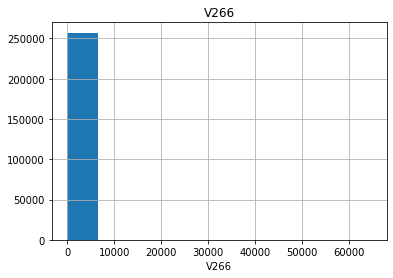

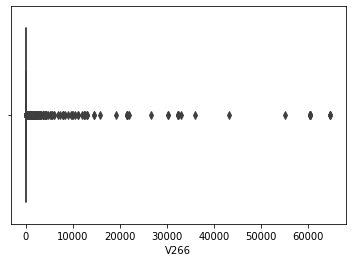

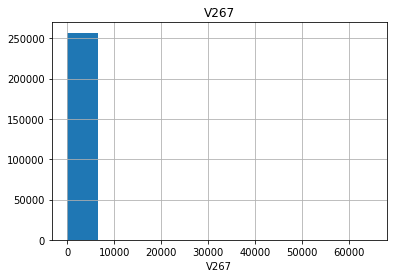

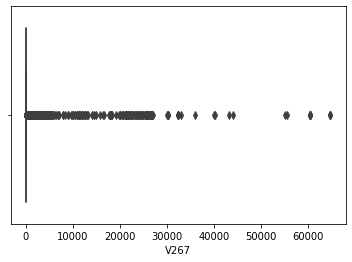

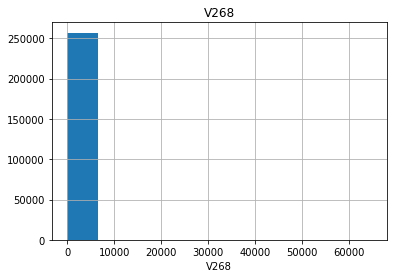

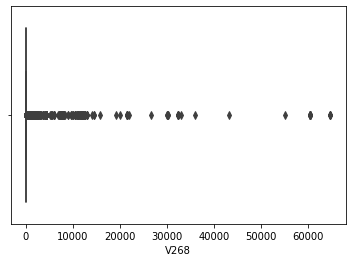

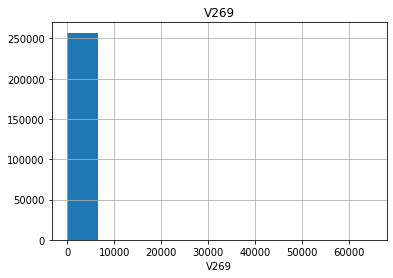

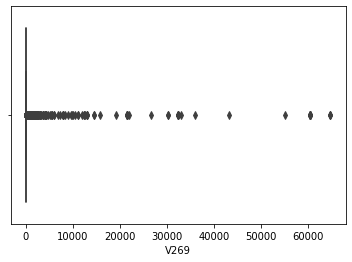

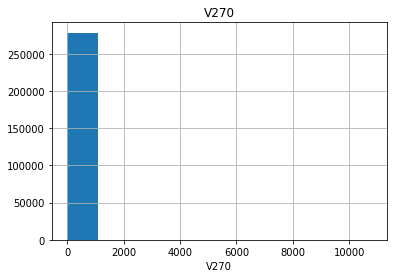

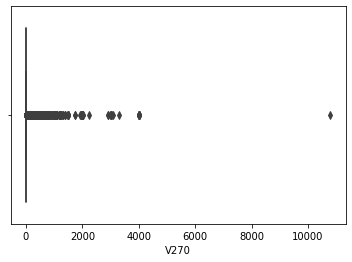

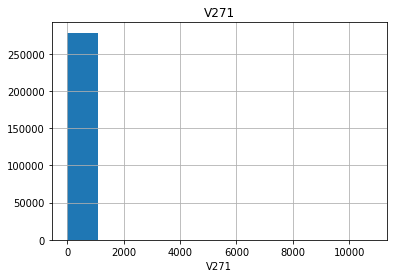

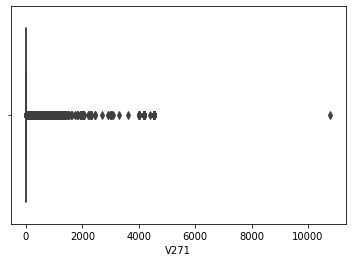

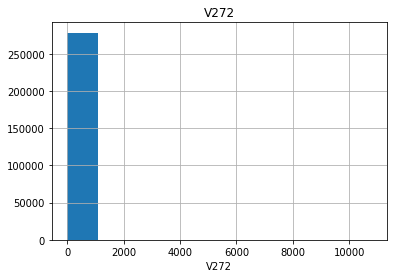

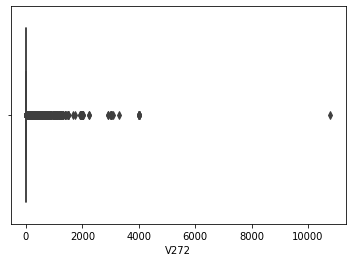

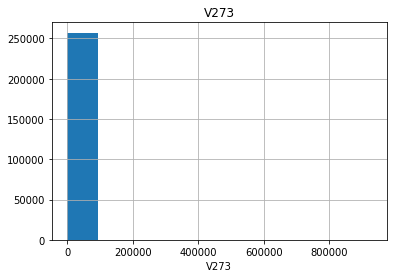

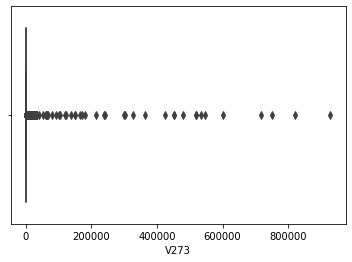

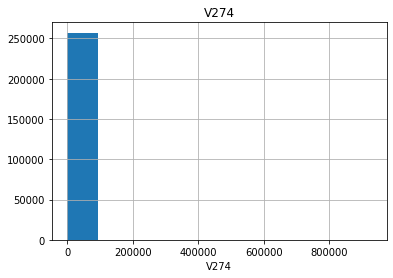

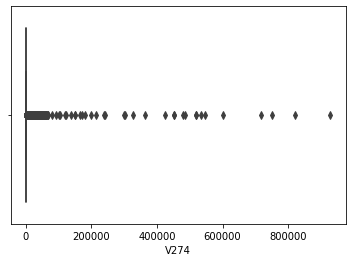

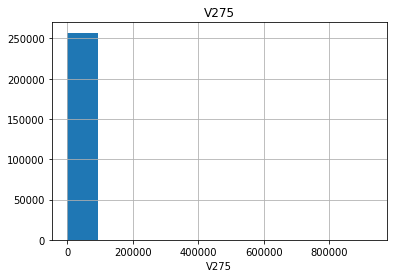

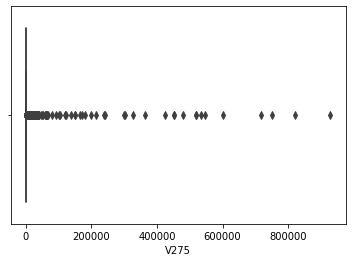

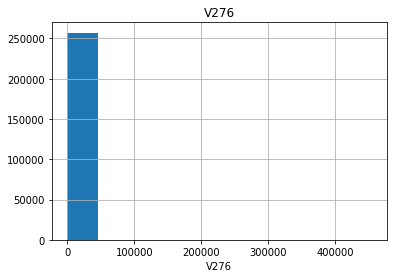

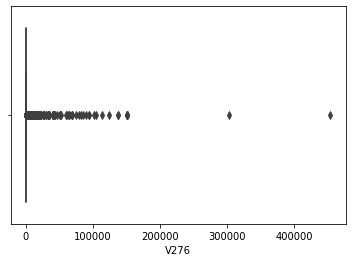

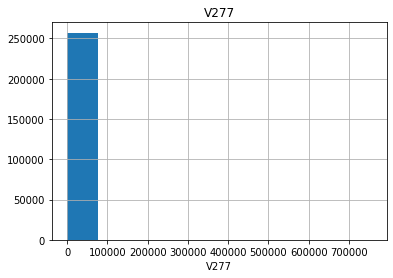

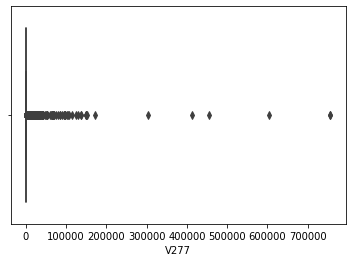

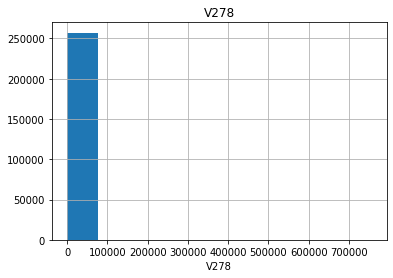

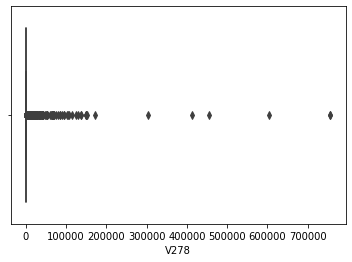

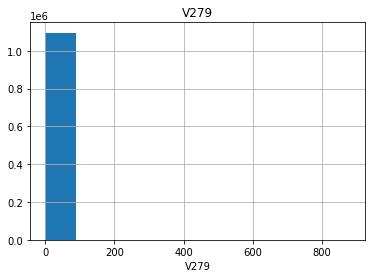

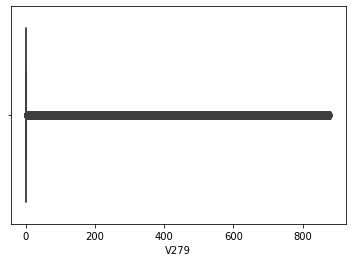

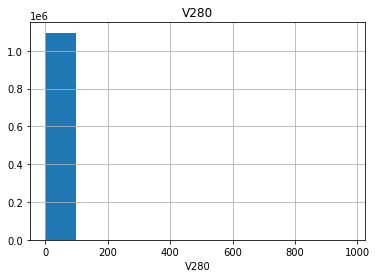

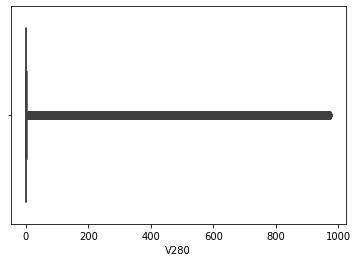

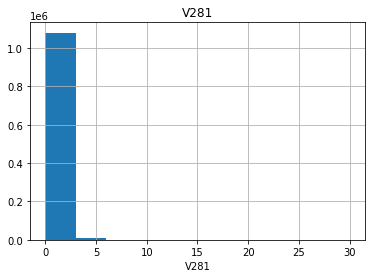

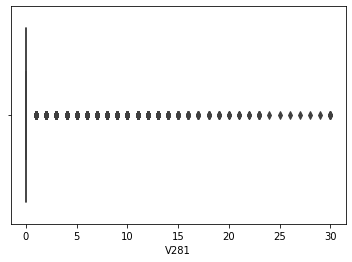

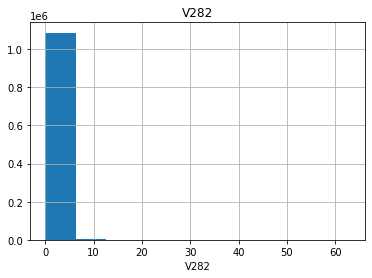

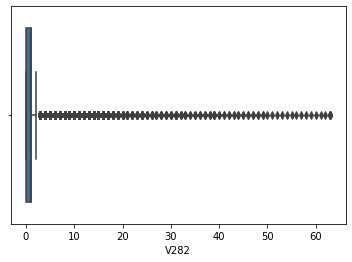

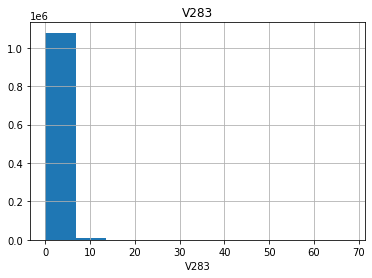

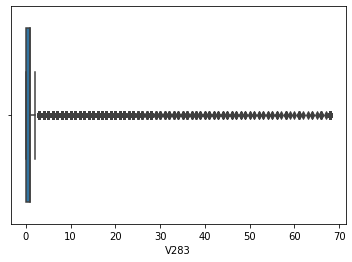

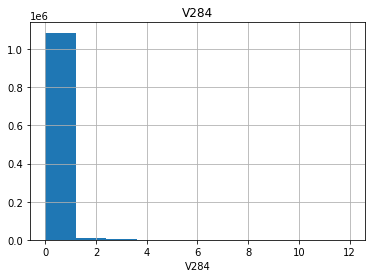

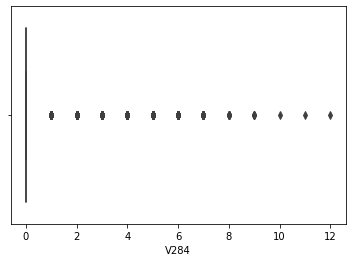

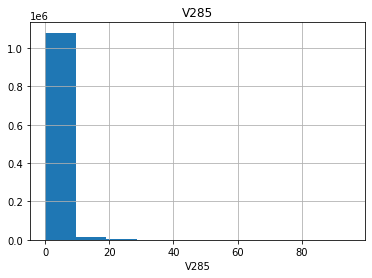

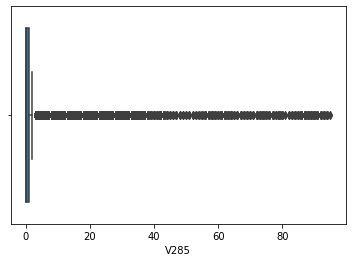

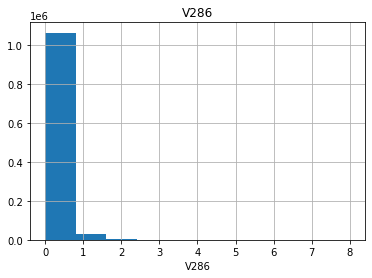

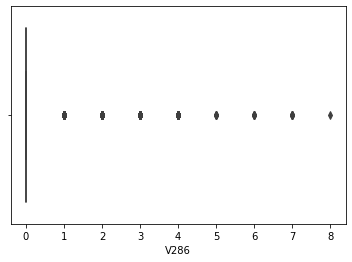

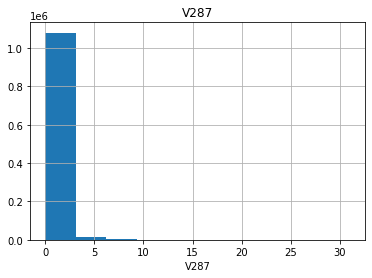

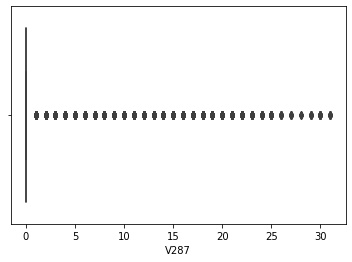

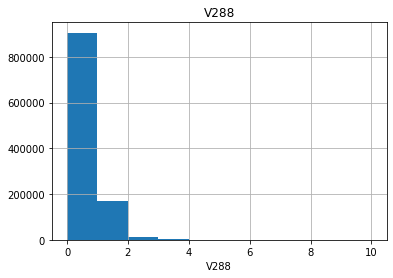

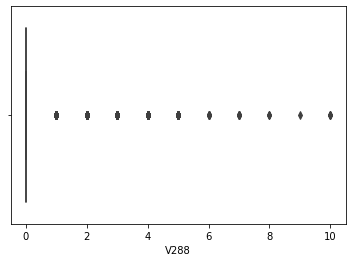

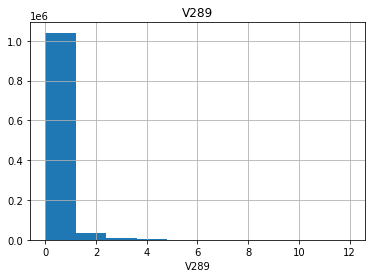

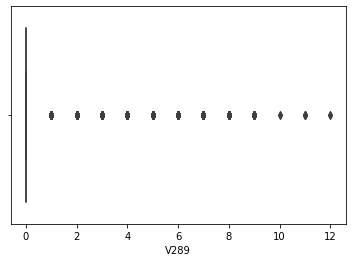

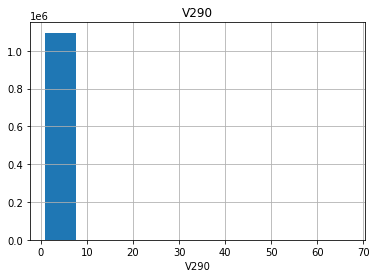

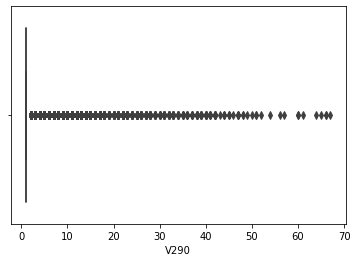

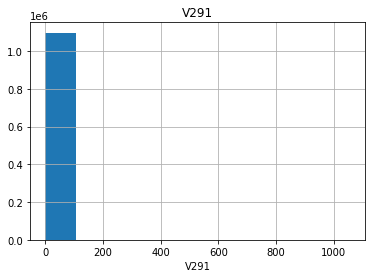

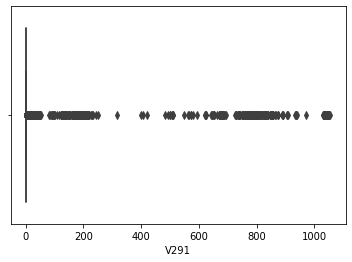

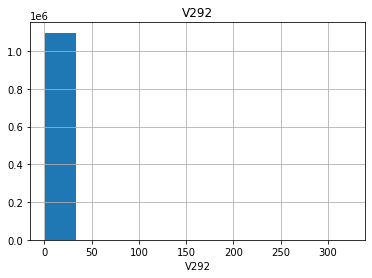

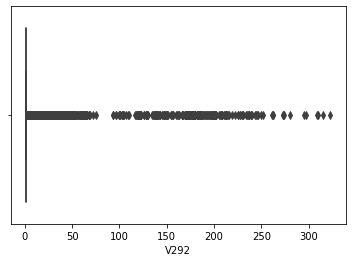

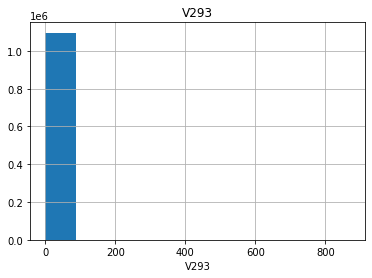

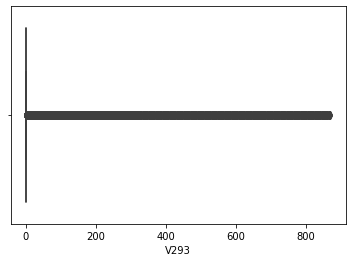

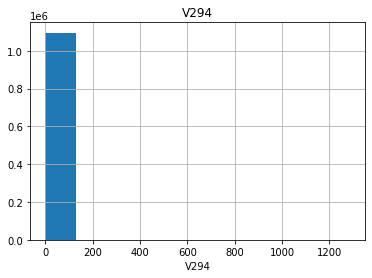

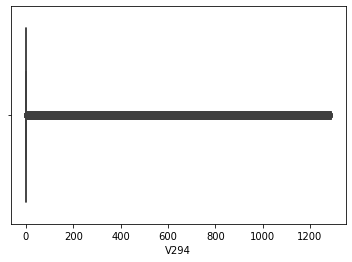

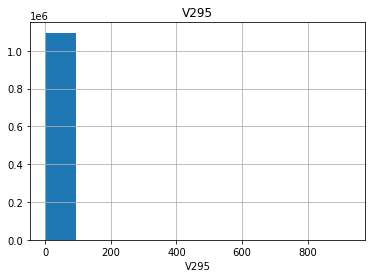

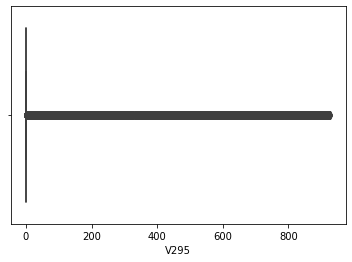

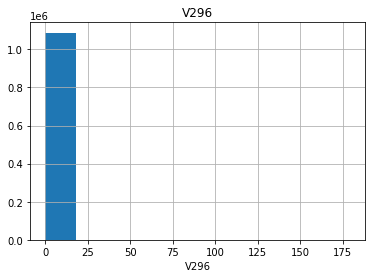

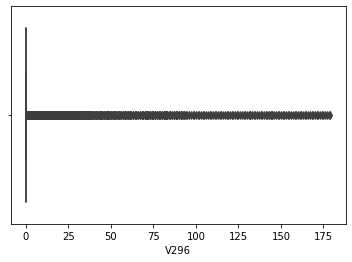

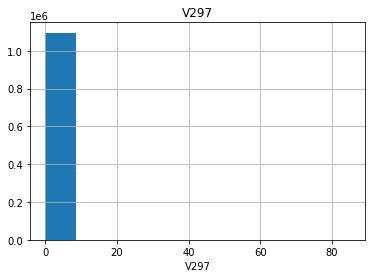

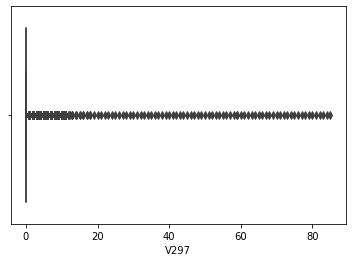

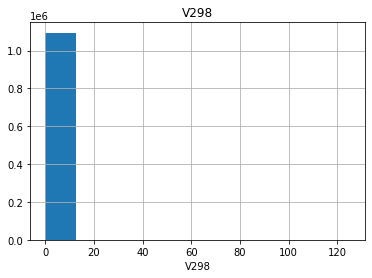

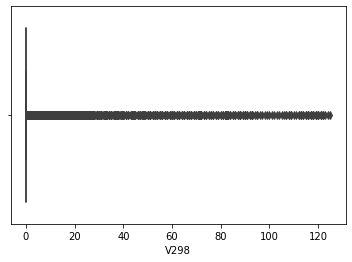

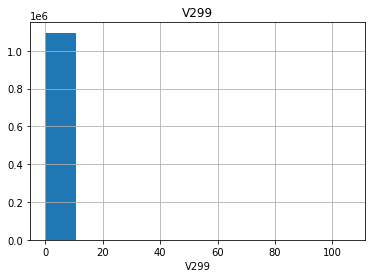

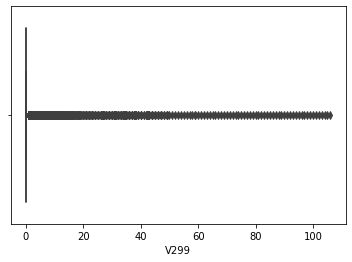

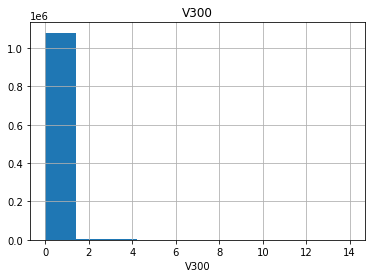

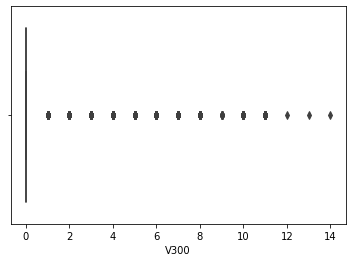

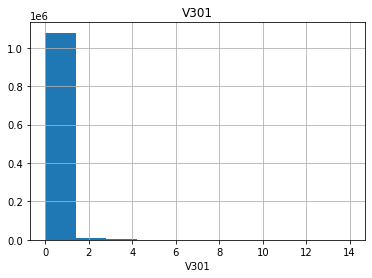

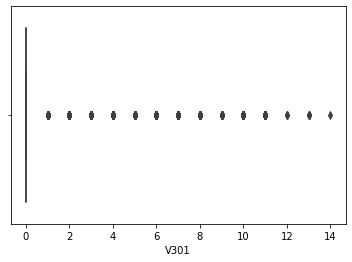

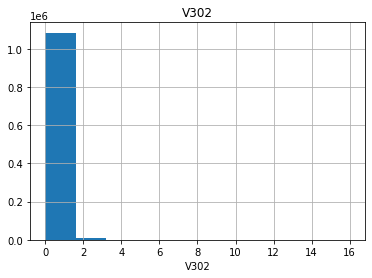

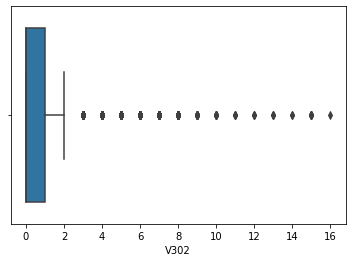

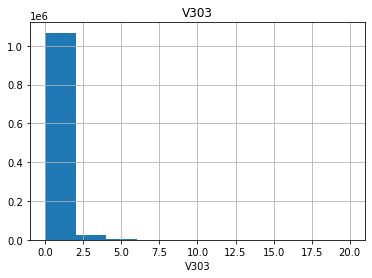

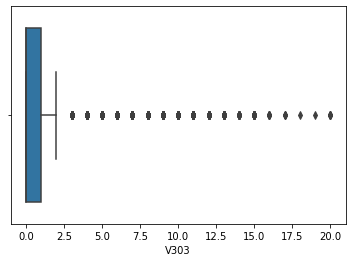

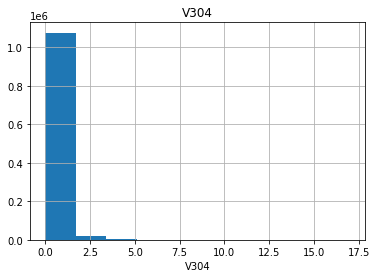

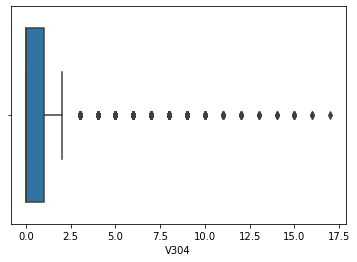

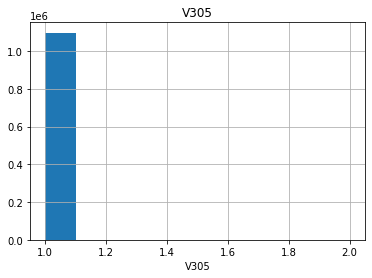

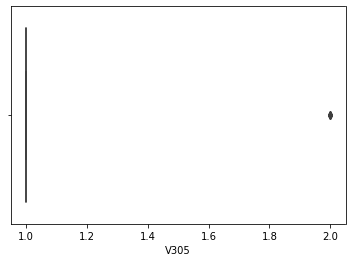

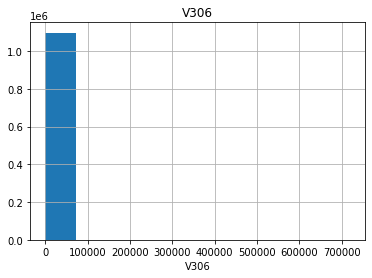

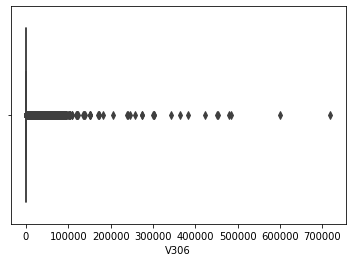

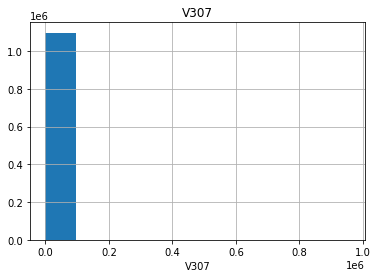

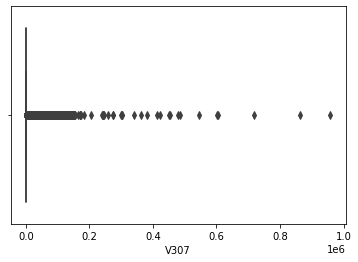

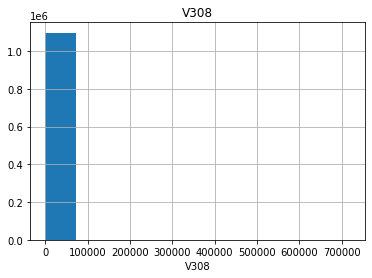

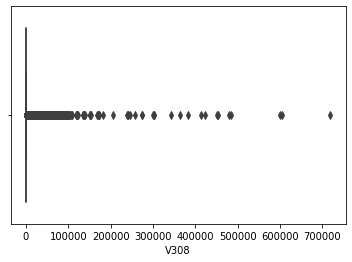

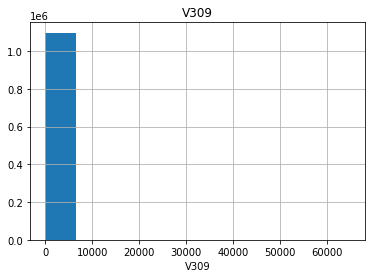

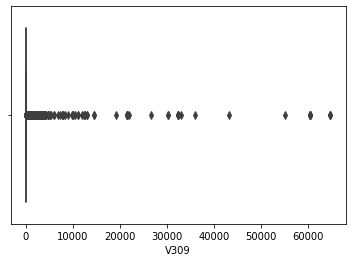

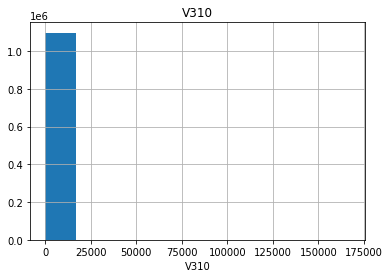

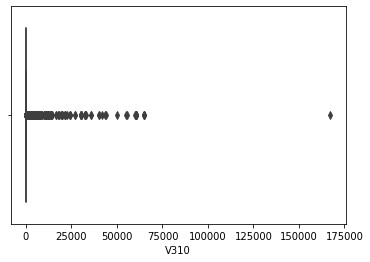

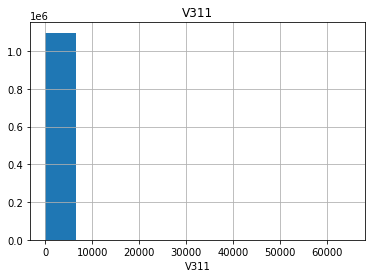

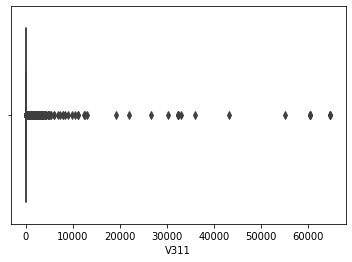

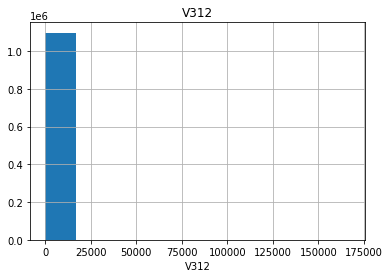

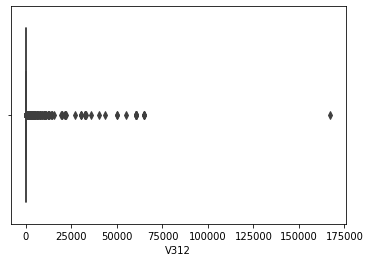

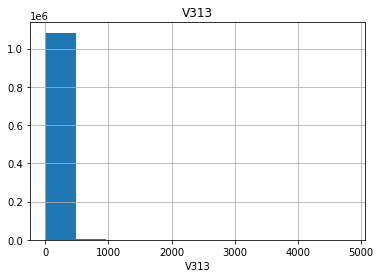

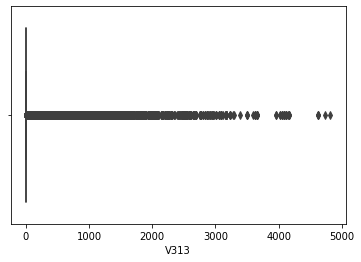

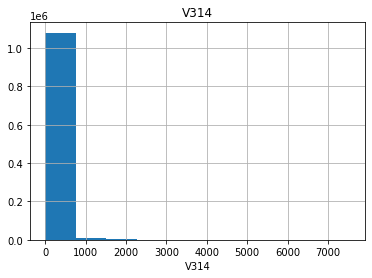

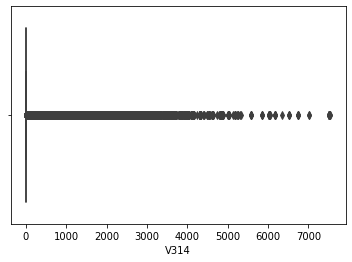

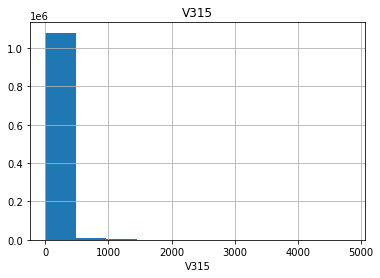

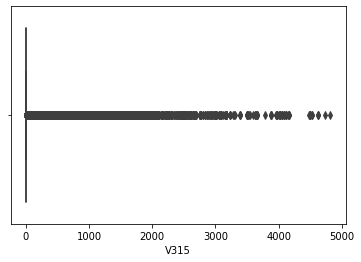

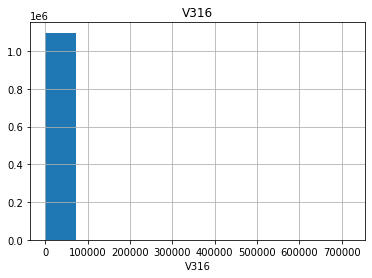

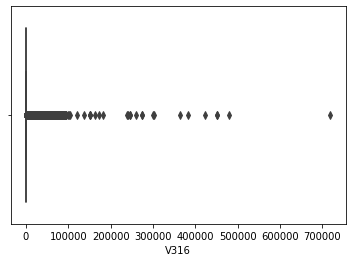

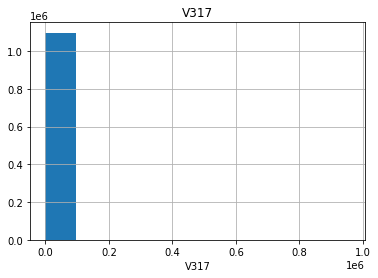

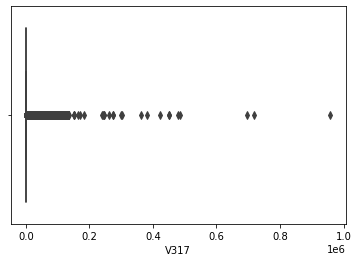

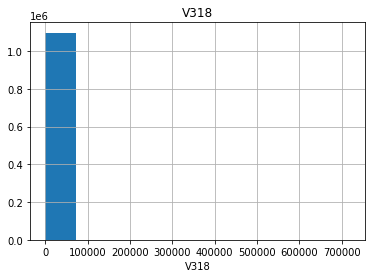

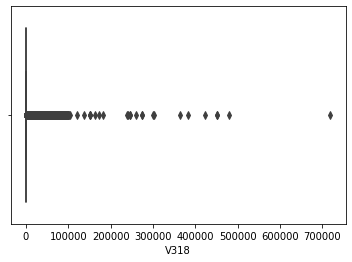

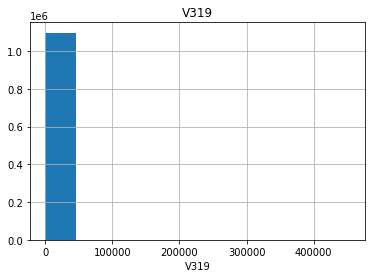

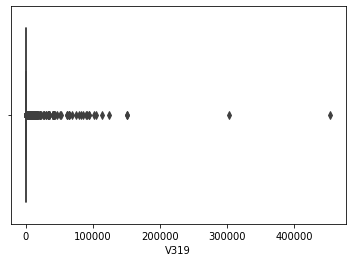

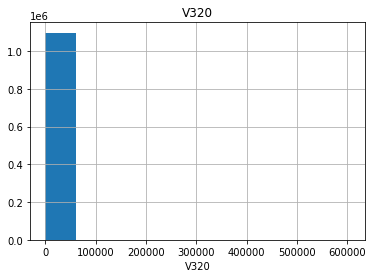

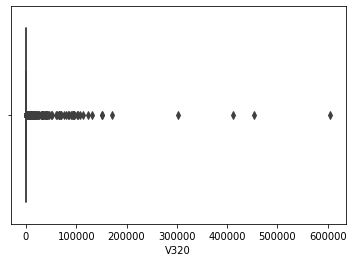

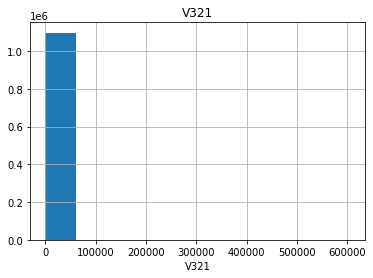

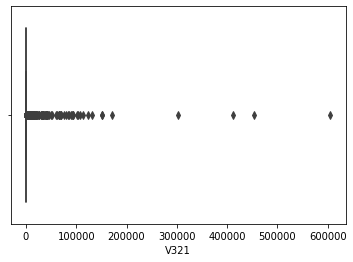

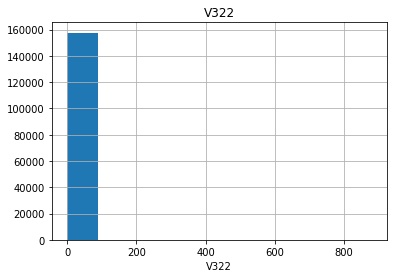

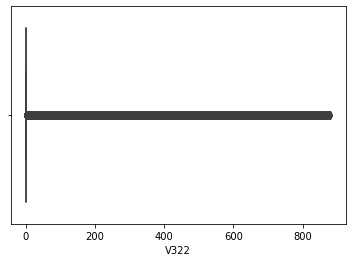

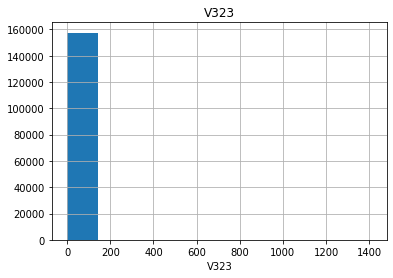

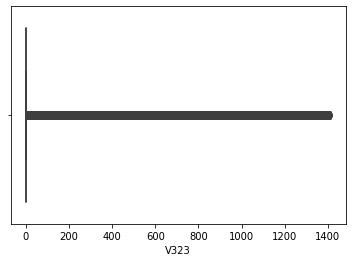

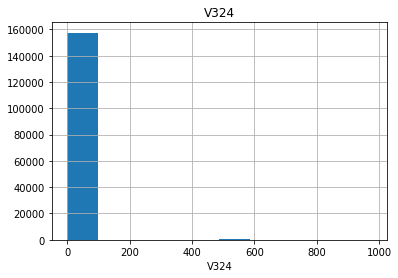

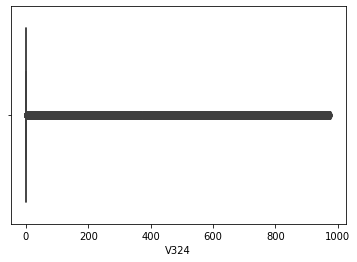

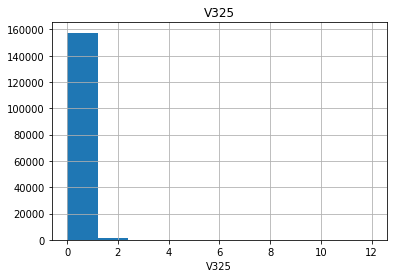

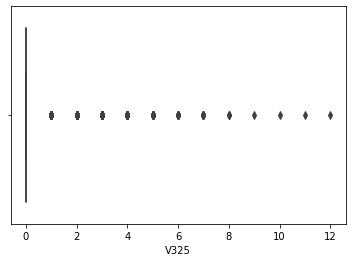

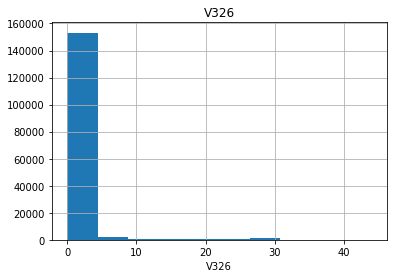

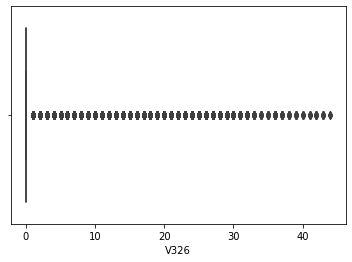

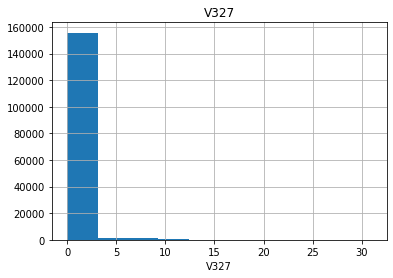

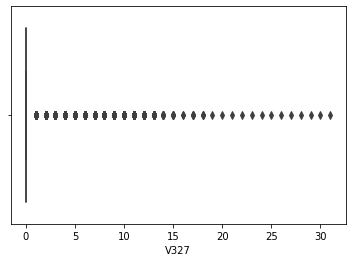

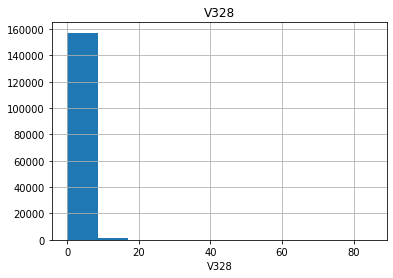

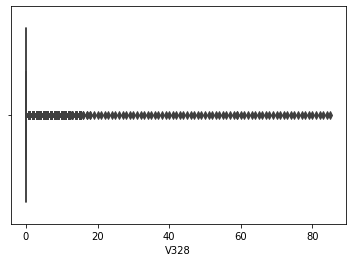

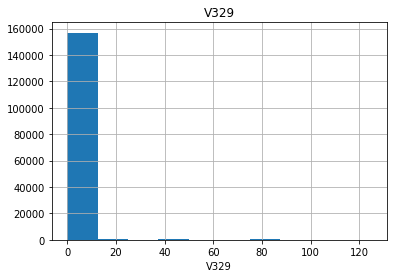

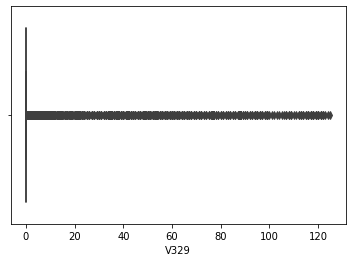

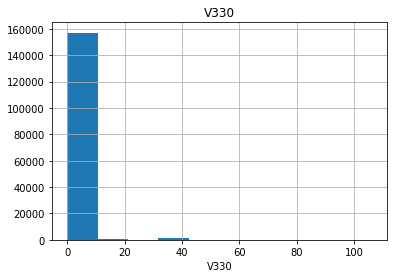

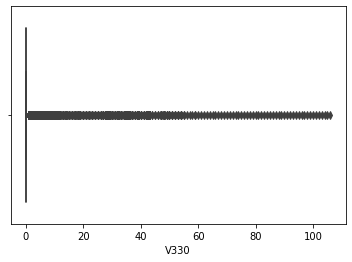

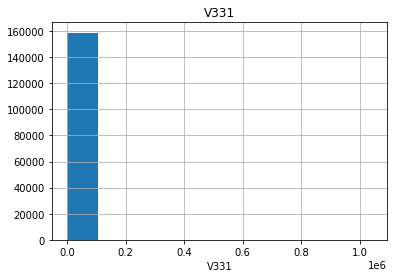

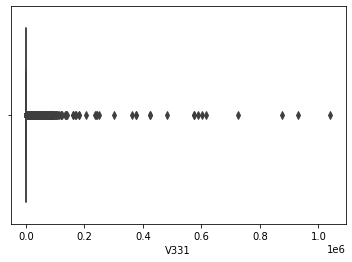

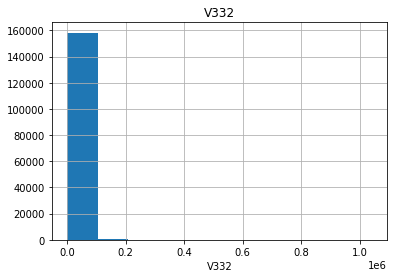

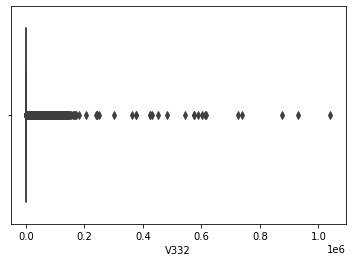

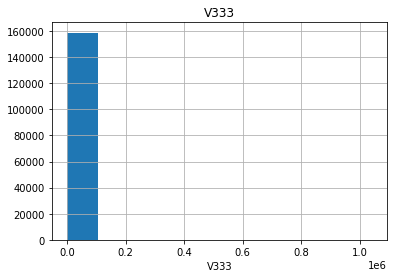

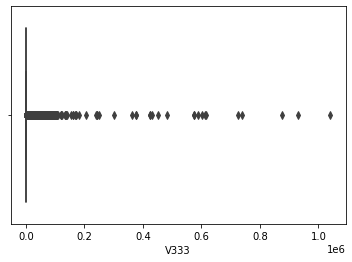

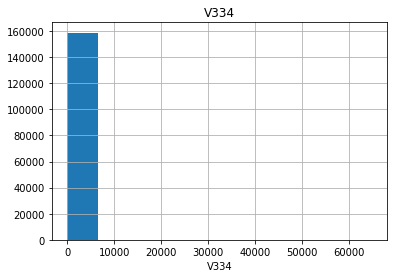

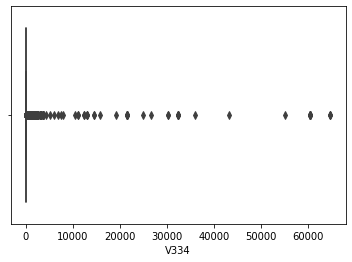

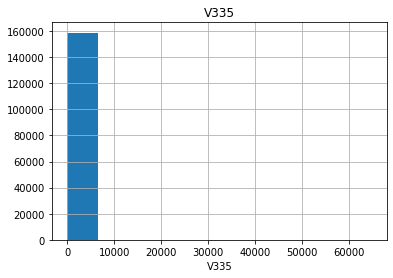

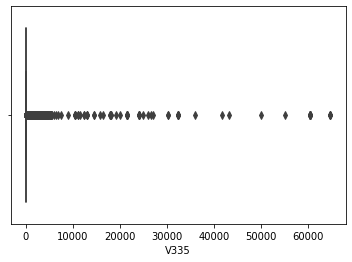

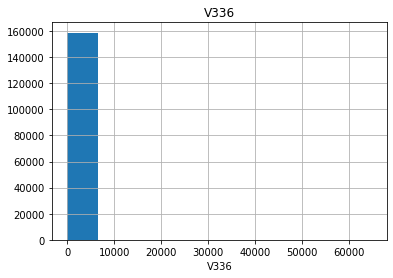

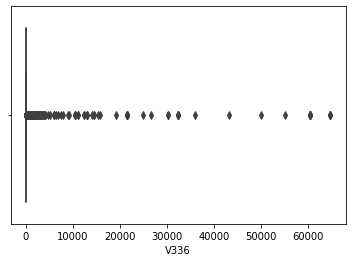

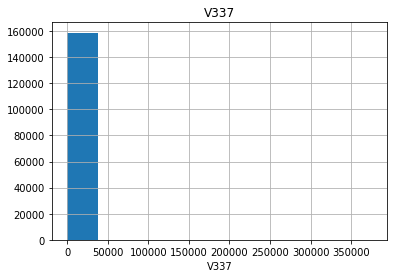

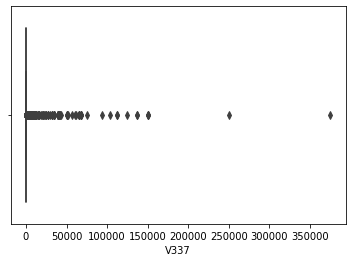

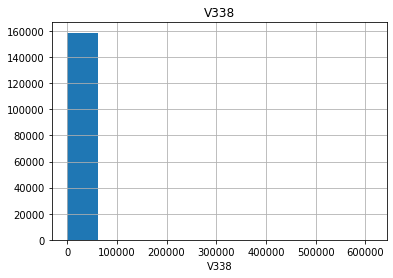

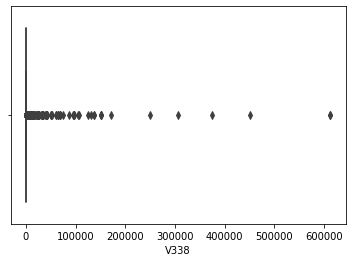

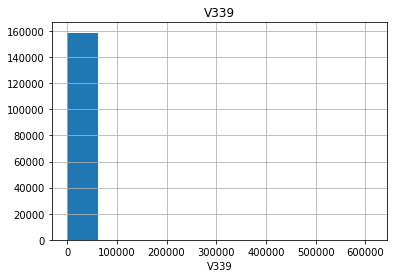

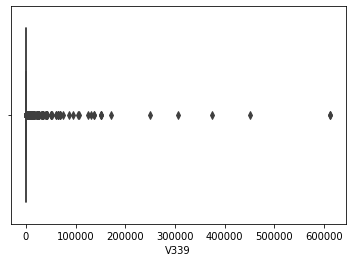

402 variables have been plotted


In [59]:
hist_for_nums(df, num_cols)

# 4- TARGET ANALYSIS

In [60]:
# Target Analysis According to Categorical Variables

In [10]:
df["isFraud"].value_counts() # Unbalanced data

0.0    569877
1.0     20663
Name: isFraud, dtype: int64

In [61]:
cat_cols

['id-12',
 'id-15',
 'id-16',
 'id-23',
 'id-27',
 'id-28',
 'id-29',
 'id-30',
 'id-31',
 'id-33',
 'id-34',
 'id-35',
 'id-36',
 'id-37',
 'id-38',
 'DeviceType',
 'DeviceInfo',
 'ProductCD',
 'card4',
 'card6',
 'P_emaildomain',
 'R_emaildomain',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9']

In [67]:
df.groupby('P_emaildomain')["isFraud"].mean().sort_values(axis=0, ascending=False) 
# Most Fraud status comes from proton mail on average

P_emaildomain
protonmail.com      0.407895
mail.com            0.189624
outlook.es          0.130137
aim.com             0.126984
outlook.com         0.094584
hotmail.es          0.065574
live.com.mx         0.054740
hotmail.com         0.052950
gmail.com           0.043542
yahoo.fr            0.034965
embarqmail.com      0.034615
mac.com             0.032110
icloud.com          0.031434
comcast.net         0.031187
charter.net         0.030637
frontier.com        0.028571
bellsouth.net       0.027763
live.com            0.027622
frontiernet.net     0.025641
anonymous.com       0.023217
suddenlink.net      0.022857
yahoo.com           0.022757
gmail               0.022177
msn.com             0.021994
aol.com             0.021811
earthlink.net       0.021401
ymail.com           0.020868
cox.net             0.020818
cableone.net        0.018868
juno.com            0.018634
me.com              0.017740
optonline.net       0.016815
yahoo.es            0.014925
yahoo.com.mx        0.010369


In [68]:
def target_summary_with_cat(data, target):
    
    cats_names = [col for col in data.columns if len(data[col].unique()) < 10 and col not in target]
    
    for var in cats_names:
        print(pd.DataFrame({"TARGET_MEAN": data.groupby(var)[target].mean()}), end="\n\n\n")

In [69]:
target_summary_with_cat(df,"isFraud")

          TARGET_MEAN
id-12                
Found        0.059836
NotFound     0.081683


         TARGET_MEAN
id-15               
Found       0.105097
New         0.049244
Unknown     0.091885


          TARGET_MEAN
id-16                
Found        0.107231
NotFound     0.048242


                      TARGET_MEAN
id-23                            
IP_PROXY:ANONYMOUS       0.137255
IP_PROXY:HIDDEN          0.055829
IP_PROXY:TRANSPARENT     0.070221


          TARGET_MEAN
id-27                
Found        0.082638
NotFound     0.000000


       TARGET_MEAN
id-28             
Found     0.102752
New       0.052281


          TARGET_MEAN
id-29                
Found        0.104463
NotFound     0.051338


       TARGET_MEAN
id-32             
0.0       0.500000
8.0            NaN
16.0      0.222222
24.0      0.033917
32.0      0.066727
48.0           NaN


                 TARGET_MEAN
id-34                       
match_status:-1     0.000000
match_status:0      0.050602
match_status:

In [70]:
# TARGET ANALYSIS FOR NUMERICAL VARIABLES

In [10]:
num_cols

['TransactionID',
 'id-01',
 'id-02',
 'id-03',
 'id-04',
 'id-05',
 'id-06',
 'id-07',
 'id-08',
 'id-09',
 'id-10',
 'id-11',
 'id-13',
 'id-14',
 'id-17',
 'id-18',
 'id-19',
 'id-20',
 'id-21',
 'id-22',
 'id-24',
 'id-25',
 'id-26',
 'id-32',
 'TransactionDT',
 'TransactionAmt',
 'card1',
 'card2',
 'card3',
 'card5',
 'addr1',
 'addr2',
 'dist1',
 'dist2',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
 'D10',
 'D11',
 'D12',
 'D13',
 'D14',
 'D15',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V40',
 'V41',
 'V42',
 'V43',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 'V53',
 'V54'

In [8]:
df.groupby("isFraud").agg({'V338':np.mean})

V338
isFraud            
0.0      155.748691
1.0       53.242268

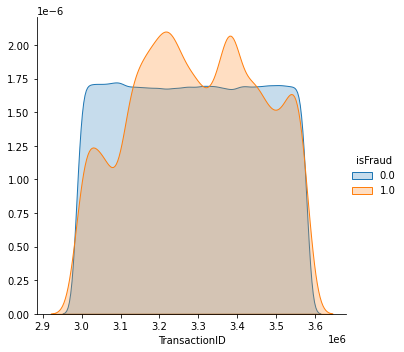

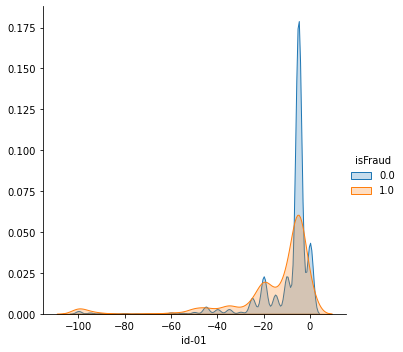

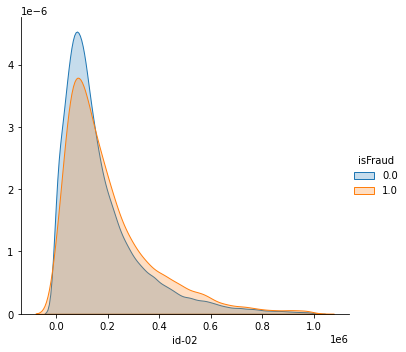

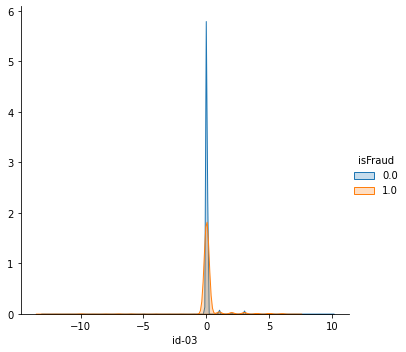

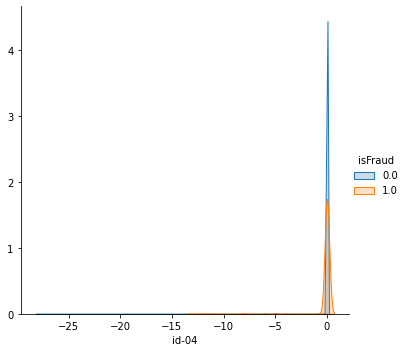

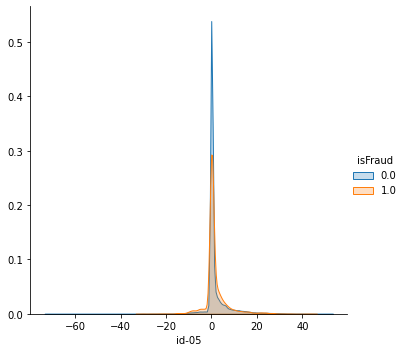

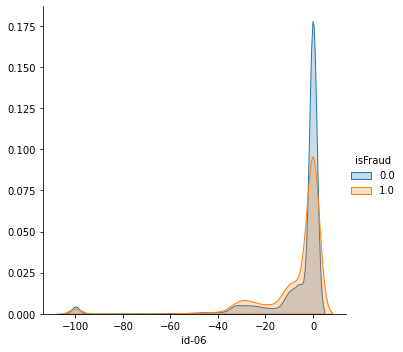

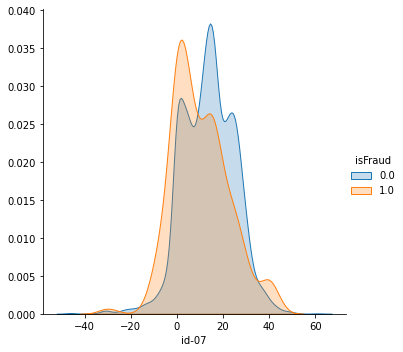

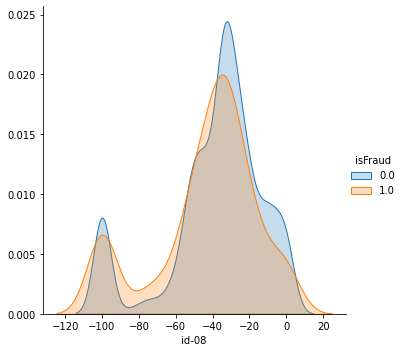

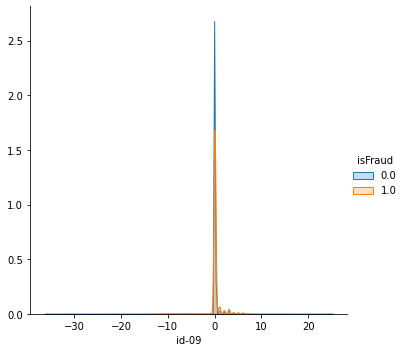

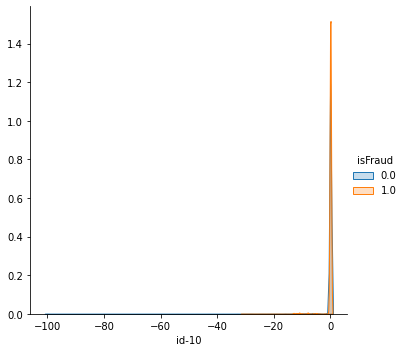

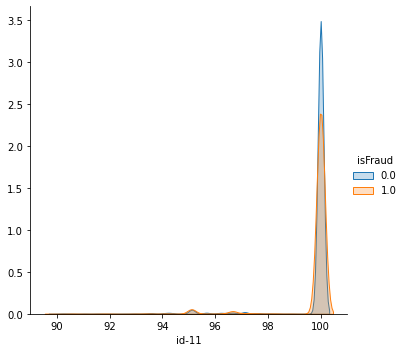

In [ ]:
# Let's cross, according to Target variable
for col in num_cols:
    (sns.
     FacetGrid(df,
               hue="isFraud",
               height=5,
              )
     .map(sns.kdeplot,col, shade=True)
     .add_legend())
    plt.show()

In [5]:
def target_summary_with_nums(data, target, out_id= False): # out_id added
    num_names = [col for col in data.columns if len(data[col].unique()) > 5
                 and df[col].dtypes != 'O'
                 and col not in target
                 and col not in "out_id"]

    for var in num_names:
        print(df.groupby(target).agg({var: np.mean}), end="\n\n\n")


In [6]:
target_summary_with_nums(df, "isFraud","TransactionID")

         TransactionID
isFraud               
0.0       3.281810e+06
1.0       3.294952e+06


             id-01
isFraud           
0.0      -9.667667
1.0     -16.075632


                 id-02
isFraud               
0.0      172396.362892
1.0      201522.569239


            id-03
isFraud          
0.0      0.051594
1.0      0.131749


            id-04
isFraud          
0.0     -0.044434
1.0     -0.179696


            id-05
isFraud          
0.0      1.627956
1.0      1.473775


            id-06
isFraud          
0.0     -6.566518
1.0     -8.213987


             id-07
isFraud           
0.0      13.574963
1.0      10.070423


             id-08
isFraud           
0.0     -38.150349
1.0     -43.596244


            id-09
isFraud          
0.0      0.081134
1.0      0.175802


            id-10
isFraud          
0.0     -0.311644
1.0     -0.210937


             id-11
isFraud           
0.0      99.742701
1.0      99.775677


             id-13
isFraud           
0.0      48.122357

# 5.ANALYSIS OF NUMERICAL VARIABLES ACCORDING TO EACH OTHER

In [23]:

def find_correlation(dataframe, target, corr_limit=0.30):
    high_correlations = []
    low_correlations = []
    for col in num_cols:
        if col == target:
            pass

        else:
            correlation = dataframe[[col, target]].corr().loc[col, target]
            print(col, correlation)
            if abs(correlation) > corr_limit:
                high_correlations.append(col)
            else:
                low_correlations.append(col)
    return low_correlations, high_correlations




In [24]:
low_corrs, high_corrs = find_correlation(df, "isFraud")

print('Variables have low correlation with target:')
print('-' * 44)
print(low_corrs)
print('Variables have high correlation with target:')
print('-' * 44)
print(high_corrs)

id-01 -0.12009888526799024
id-02 0.049397879967210206
id-03 0.04145664350595654
id-04 -0.059701321286109756
id-05 -0.007978411819536414
id-06 -0.027139434813293135
id-07 -0.08476785965792752
id-08 -0.05748877227233082
id-09 0.029430893966286155
id-10 0.01104256236530479
id-11 0.007914420181424296
id-13 -0.019538027957747943
id-14 0.05732373315484078
id-17 0.1501004599247333
id-18 0.05000387360646379
id-19 -0.0417214210578904
id-20 0.06159651342820872
id-21 0.06354388003380718
id-22 0.11840860174814154
id-24 -0.001905047654500282
id-25 0.034044677038513826
id-26 0.09958696595064398
id-32 0.06970167797723056
TransactionDT 0.013103054992973453
TransactionAmt 0.01131982533313783
card1 -0.013639969872975688
card2 0.003387879178237883
card3 0.15415133308186366
card5 -0.03357955581241757
addr1 0.005595762757535947
addr2 -0.03038714731513837
dist1 0.02152216135034864
dist2 -0.019053623292594087
C1 0.030569759650286146
C2 0.037228939530152494
C3 -0.006833173826574732
C4 0.030382136305818028
C5 

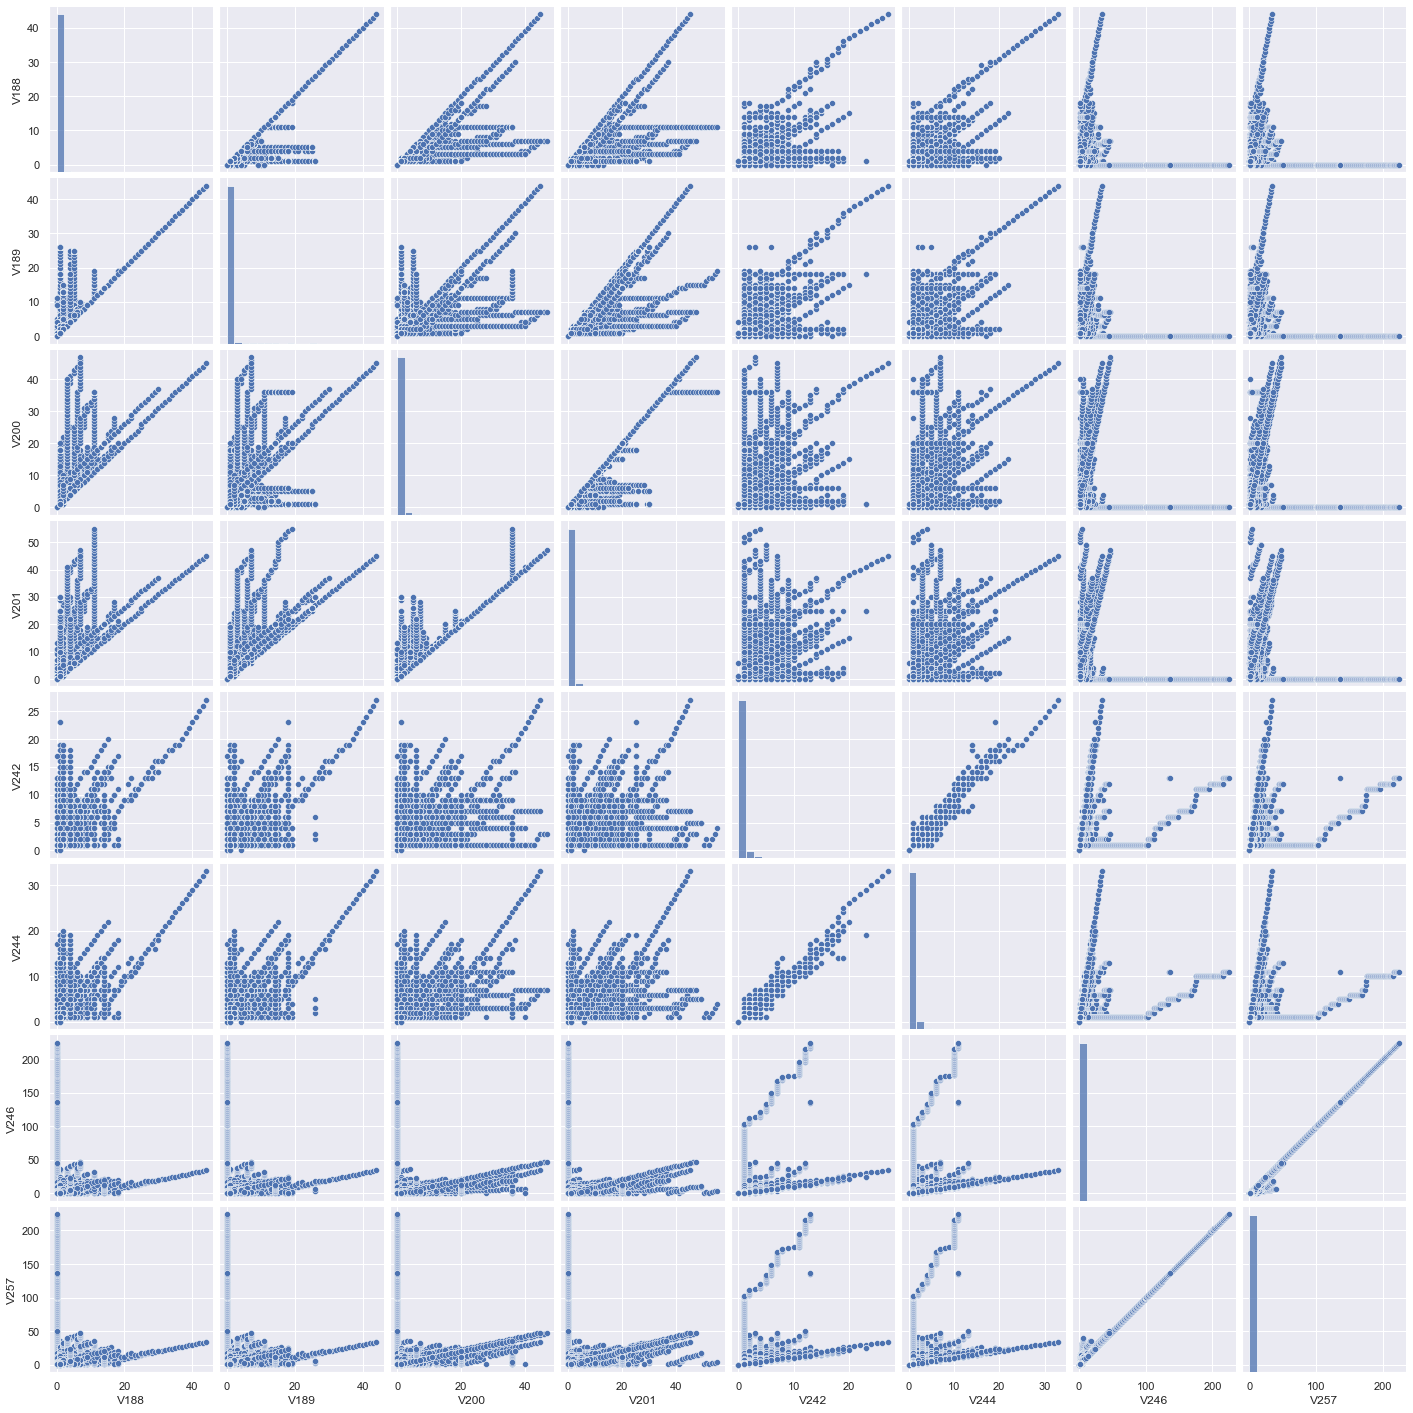

In [33]:

sns.set()
sns.pairplot(df[high_corrs], height=2.5)
plt.show()